# Lab Assignment Four: Multi-Layer Perceptron 

### Catherine Magee, Morgan Mote, Luv Patel

In this lab, you will compare the performance of multi-layer perceptrons programmed  via your own various implementations. 

This report is worth 10% of the final grade. Please upload a report (one per team) with all code used, visualizations, and text in a rendered Jupyter notebook. Any visualizations that cannot be embedded in the notebook, please provide screenshots of the output. The results should be reproducible using your report. This lab project is slightly different from other reports in that you will be asked to complete more specific items.

## Dataset Selection

For this assignment, you will be using a specific dataset chosen by the instructor.  This is US Census data available on Kaggle, and also downloadable from the following link: https://www.dropbox.com/s/bf7i7qjftk7cmzq/acs2017_census_tract_data.csv?dl=0Links to an external site.

The Kaggle description appears here: https://www.kaggle.com/muonneutrino/us-census-demographic-data/dataLinks to an external site. 

The classification task you will be performing is to predict, for each county, what the child poverty rate will be. You will need to convert this from regression to four levels of classification by quantizing the variable of interest. 

## Grading Rubric

#### Load, Split, and Balance (1.5 points total)
- [.5 points] (1) Load the data into memory and save it to a pandas data frame. Do not normalize or one-hot encode any of the features until asked to do so later in the rubric. (2) Remove any observations that having missing data. (3) Encode any string data as integers for now. (4) You have the option of keeping the "county" variable or removing it. Be sure to discuss why you decided to keep/remove this variable. 

The next two requirements will need to be completed together as they might depend on one another:
- [.5 points] Balance the dataset so that about the same number of instances are within each class. Choose a method for balancing the dataset and explain your reasoning for selecting this method. One option is to choose quantization thresholds for the "ChildPoverty" variable that equally divide the data into four classes. Should balancing of the dataset be done for both the training and testing set? Explain.
- [.5 points] Assume you are equally interested in the classification performance for each class in the dataset. Split the dataset into 80% for training and 20% for testing. There is NO NEED to split the data multiple times for this lab.

- Note: You will need to one hot encode the target, but do not one hot encode the categorical data until instructed to do so in the lab. 

#### Pre-processing and Initial Modeling (2.5 points total)
You will be using a two layer perceptron from class for the next few parts of the rubric. There are several versions of the two layer perceptron covered in class, with example code. When selecting an example two layer network from class be sure that you use: (1) vectorized gradient computation, (2) mini-batching, (3) cross entropy loss, and (4) proper Glorot initialization, at a minimum. There is no need to use momentum or learning rate reduction (assuming you choose a sufficiently small learning rate). It is recommended to use sigmoids throughout the network, but not required.
- [.5 points] Use the example two-layer perceptron network from the class example and quantify performance using accuracy. Do not normalize or one-hot encode the data (not yet). Be sure that training converges by graphing the loss function versus the number of epochs. 
- [.5 points] Now (1) normalize the continuous numeric feature data. Use the example two-layer perceptron network from the class example and quantify performance using accuracy. Be sure that training converges by graphing the loss function versus the number of epochs.  
- [.5 points] Now(1) normalize the continuous numeric feature data AND (2) one hot encode the categorical data. Use the example two-layer perceptron network from the class example and quantify performance using accuracy. Be sure that training converges by graphing the loss function versus the number of epochs. 
- [1 points] Compare the performance of the three models you just trained. Are there any meaningful differences in performance? Explain, in your own words, why these models have (or do not have) different performances.  
Use one-hot encoding and normalization on the dataset for the remainder of this lab assignment.

#### Modeling (5 points total)
- [1 points] Add support for a third layer in the multi-layer perceptron. Add support for saving (and plotting after training is completed) the average magnitude of the gradient for each layer, for each epoch (like we did in the flipped module for back propagation). For magnitude calculation, you are free to use either the average absolute values or the L1/L2 norm.
Quantify the performance of the model and graph the magnitudes for each layer versus the number of epochs.
- [1 points] Repeat the previous step, adding support for a fourth layer.
- [1 points] Repeat the previous step, adding support for a fifth layer. 
- [2 points] Implement an adaptive learning technique that was discussed in lecture and use it on the five layer network (such as AdaGrad, RMSProps, or AdaDelta). Discuss which adaptive method you chose. Compare the performance of your five layer model with and without the adaptive learning strategy. Do not use AdaM for the adaptive learning technique as it is part of the exceptional work.

#### Exceptional Work (1 points total)
- 5000 level student: You have free reign to provide additional analyses.
- One idea (required for 7000 level students):  Implement adaptive momentum (AdaM) in the five layer neural network and quantify the performance. 

In [9]:
# STANDARD LIBRARY IMPORTS
import sys
import textwrap
from IPython.display import display, Markdown

# 3RD PARTY IMPORTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from scipy.special import expit

## Load the Data

In [10]:
# Begin by loading the dataset into a pandas dataframe. No normalization or one-hot encoding yet.
df = pd.read_csv("./acs2017_census_tract_data.csv")

## Remove Missing Data

In [11]:
# First visualize the # of rows and columns so we can see what will change after the NA observations have been removed.
rows, columns = df.shape
print(f"ACS 2017 Census Tract Data\nRows: {rows}\nColumns: {columns}")

ACS 2017 Census Tract Data
Rows: 74001
Columns: 37


In [12]:
# Next we will then remove any missing data then demonstrate that the missing data has been removed.
def show_missing_counts_md():
    na_counts = df.isna().sum()

    header = textwrap.dedent(
        """\
    | Feature | Missing Count |
    |---------|---------------|\
    """
    )
    rows = "\n".join(
        "| {} | {} |".format(col, na_counts[col]) for col in na_counts.index
    )
    table = f"{header}\n{rows}"

    display(Markdown(f"### NA/NaN/Missing Data Counts\n{table}"))


show_missing_counts_md()

### NA/NaN/Missing Data Counts
| Feature | Missing Count |
|---------|---------------|    
| TractId | 0 |
| State | 0 |
| County | 0 |
| TotalPop | 0 |
| Men | 0 |
| Women | 0 |
| Hispanic | 696 |
| White | 696 |
| Black | 696 |
| Native | 696 |
| Asian | 696 |
| Pacific | 696 |
| VotingAgeCitizen | 0 |
| Income | 1116 |
| IncomeErr | 1116 |
| IncomePerCap | 745 |
| IncomePerCapErr | 745 |
| Poverty | 842 |
| ChildPoverty | 1110 |
| Professional | 811 |
| Service | 811 |
| Office | 811 |
| Construction | 811 |
| Production | 811 |
| Drive | 801 |
| Carpool | 801 |
| Transit | 801 |
| Walk | 801 |
| OtherTransp | 801 |
| WorkAtHome | 801 |
| MeanCommute | 946 |
| Employed | 0 |
| PrivateWork | 811 |
| PublicWork | 811 |
| SelfEmployed | 811 |
| FamilyWork | 811 |
| Unemployment | 810 |

In [13]:
# Use Pandas' dropna method to remove the NA values from the data frame. 
# Re-assign the variable df to the dataframe instance that has the NA values removed.
df = df.dropna()

In [14]:
# Show that the columns do not have any missing data in them.
show_missing_counts_md()

### NA/NaN/Missing Data Counts
| Feature | Missing Count |
|---------|---------------|    
| TractId | 0 |
| State | 0 |
| County | 0 |
| TotalPop | 0 |
| Men | 0 |
| Women | 0 |
| Hispanic | 0 |
| White | 0 |
| Black | 0 |
| Native | 0 |
| Asian | 0 |
| Pacific | 0 |
| VotingAgeCitizen | 0 |
| Income | 0 |
| IncomeErr | 0 |
| IncomePerCap | 0 |
| IncomePerCapErr | 0 |
| Poverty | 0 |
| ChildPoverty | 0 |
| Professional | 0 |
| Service | 0 |
| Office | 0 |
| Construction | 0 |
| Production | 0 |
| Drive | 0 |
| Carpool | 0 |
| Transit | 0 |
| Walk | 0 |
| OtherTransp | 0 |
| WorkAtHome | 0 |
| MeanCommute | 0 |
| Employed | 0 |
| PrivateWork | 0 |
| PublicWork | 0 |
| SelfEmployed | 0 |
| FamilyWork | 0 |
| Unemployment | 0 |

In [15]:
# Display the reduction in the # of rows in the dataframe.
rows, columns = df.shape
print(f"ACS 2017 Census Tract Data\nRows: {rows}\nColumns: {columns}")

ACS 2017 Census Tract Data
Rows: 72718
Columns: 37


In [16]:
# Identify the columns that have string data that need to be encoded.
df.select_dtypes('object').columns.to_list()

['State', 'County']

In [17]:
# Display the string format of the 'State' column.
df['State'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Puerto Rico'],
      dtype=object)

Counties in this dataset serve as political subdivisions within the state and are utilized to organize census data into smaller geographic units. The inclusion of counties in this analysis is crucial as it offers a more comprehensive insight into the variations across different regions within each state. This dataset allows for a detailed examination of geographic, demographic, and economic disparities among these subdivisions. In particular, it provides valuable information about poverty rates, highlighting which counties or specific sections of the state are most affected by poverty, thereby aiding in targeted interventions and policy decisions.

In [18]:
# Convert the string data from both columns into an encoded value.
encoder = LabelEncoder()

df['State'] = encoder.fit_transform(df['State'])
df["County"] = encoder.fit_transform(df["County"])

In [19]:
# State values are transformed from string format to integer format.
df['State'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       39])

In [20]:
# PROJECT GOAL: Identify poverty rates at the county level.
target = df['Poverty']
features = df.drop(columns=['Poverty'])

## Balance

The ChildPoverty variable is a value that indicates the percentage of youths living below the poverty line. To divide the data into three classes, we decided to split the Poverty variable based on percentage ranges. 

- Class 1 = 0 to 33% (Indicates a very low percentage of people living under the poverty line)
- Class 2 = 34% to 66% (Indicates a small percentage of people living under the poverty line)
- Class 3 = 67% to 100% (Indicates a large percentage of people living under the poverty line)

To ensure that the three classes were as close as possible to equal in size, the qcut function was used to bin the Poverty variable into three equally sized categories. The value_counts method was used to determine the number of observations in each category. This approach helps ensure that each category has a similar number of observations, which can help to prevent biases in the model. However, one weakness of this approach is that it assumes that the specific percentage ranges chosen are the best way to divide the data into classes, and it is possible that using different ranges could lead to a more accurate model.

In [21]:
# Balance the dataset before splitting the training and testing.
# When the training/testing data is split, each split should have a similar distribution of each class.
pd.qcut(df['Poverty'], q=3, labels=[1, 2, 3]).value_counts()

2    24399
1    24273
3    24046
Name: Poverty, dtype: int64

In [22]:
# Substitute the poverty level column with the quantized data.
target = pd.qcut(target, q=3, labels=[1, 2, 3], duplicates='drop')

## Split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(
    features, target, train_size=0.8, stratify=target, random_state=123
)

In [24]:
# Balance the target dataset before the train_test_split function is called.
print("Training Dataset\n--------------------")
print(y_train.value_counts())
print("\nTesting Dataset\n--------------------")
print(y_test.value_counts())

Training Dataset
--------------------
2    19519
1    19418
3    19237
Name: Poverty, dtype: int64

Testing Dataset
--------------------
2    4880
1    4855
3    4809
Name: Poverty, dtype: int64


## Pre-Processing and Initial Modeling

In [25]:
# This variable helps to run scenarios where the focus is on the main model runs. 
# *The additional tests take a very long time to run.* 
run_additional_tests = True

In [26]:
class TwoLayerPerceptronBase(object):
    def __init__(
        self,
        n_hidden                 = 30,
        regularization_parameter = 0.0,
        epochs                   = 500,
        learning_rate            = 0.001,
        random_state             = None,
    ):
        np.random.seed(random_state)
        self.n_hidden          = n_hidden
        self.l2_regularization = regularization_parameter
        self.epochs            = epochs
        self.learning_rate     = learning_rate

    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T

        return onehot

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        W1_num_elems = (self.n_features_) * self.n_hidden
        W1 = np.random.uniform(-1.0, 1.0, size=W1_num_elems)
        W1 = W1.reshape(self.n_hidden, self.n_features_)  # reshape to be W
        b1 = np.zeros((self.n_hidden, 1))

        W2_num_elems = (self.n_hidden) * self.n_output_
        W2 = np.random.uniform(-1.0, 1.0, size=W2_num_elems)
        W2 = W2.reshape(self.n_output_, self.n_hidden)
        b2 = np.zeros((self.n_output_, 1))

        return W1, W2, b1, b2

    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)

    @staticmethod
    def _L2_reg(lambda_, W1, W2):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_) * np.sqrt(np.mean(W1**2) + np.mean(W2**2))

    def _cost(self, A3, Y_enc, W1, W2):
        """Get the objective function value"""
        cost = np.mean((Y_enc - A3) ** 2)
        L2_term = self._L2_reg(self.l2_regularization, W1, W2)
        return cost + L2_term

In [27]:
class TwoLayerPerceptron(TwoLayerPerceptronBase):
    def _feedforward(self, X, W1, W2, b1, b2):
        """Compute feedforward step
        -----------
        X : Input layer with original features.
        W1: Weight matrix for input layer -> hidden layer.
        W2: Weight matrix for hidden layer -> output layer.
        ----------
        a1-a3 : activations into layer (or output layer)
        z1-z2 : layer inputs

        """
        A1 = X.T
        Z1 = W1 @ A1 + b1
        A2 = self._sigmoid(Z1)
        Z2 = W2 @ A2 + b2
        A3 = self._sigmoid(Z2)
        return A1, Z1, A2, Z2, A3

    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        """Compute gradient step using backpropagation."""
        # need to vectorize this computation!
        # See additional code and derivation below!
        pass

    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, A3 = self._feedforward(
            X, self.W1, self.W2, self.b1, self.b2
        )
        y_pred = np.argmax(A3, axis=0)
        return y_pred

    def fit(self, X, y, print_progress=False):
        """Learn weights from training data."""

        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)

        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.b1, self.b2 = self._initialize_weights()

        self.cost_ = []
        for i in range(self.epochs):

            if print_progress > 0 and (i + 1) % print_progress == 0:
                sys.stderr.write("\rEpoch: %d/%d" % (i + 1, self.epochs))
                sys.stderr.flush()

            # feedforward all instances
            A1, Z1, A2, Z2, A3 = self._feedforward(
                X_data, self.W1, self.W2, self.b1, self.b2
            )

            cost = self._cost(A3, Y_enc, self.W1, self.W2)
            self.cost_.append(cost)

            # compute gradient via backpropagation
            gradW1, gradW2, gradb1, gradb2 = self._get_gradient(
                A1    = A1,
                A2    = A2,
                A3    = A3,
                Z1    = Z1,
                Z2    = Z2,
                Y_enc = Y_enc,
                W1    = self.W1,
                W2    = self.W2,
            )

            self.W1 -= self.learning_rate * gradW1
            self.W2 -= self.learning_rate * gradW2
            self.b1 -= self.learning_rate * gradb1
            self.b2 -= self.learning_rate * gradb2

        return self

In [28]:
class TwoLayerPerceptronVectorized(TwoLayerPerceptron):
    # just need a different gradient calculation
    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        """Compute gradient step using backpropagation."""
        # vectorized backpropagation
        V2 = -2 * (Y_enc - A3) * A3 * (1 - A3)
        V1 = A2 * (1 - A2) * (W2.T @ V2)

        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T

        gradb2 = np.sum(V2, axis=1).reshape((-1, 1))
        gradb1 = np.sum(V1, axis=1).reshape((-1, 1))

        # regularize weights that are not bias terms
        gradW1 += W1 * self.l2_regularization * 2
        gradW2 += W2 * self.l2_regularization * 2

        return gradW1, gradW2, gradb1, gradb2

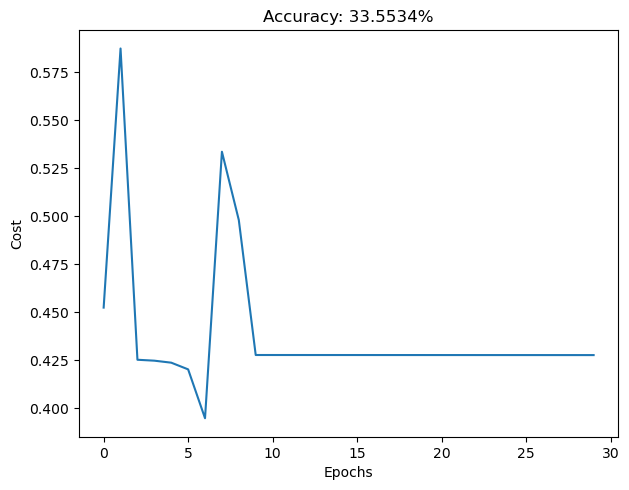

In [29]:
vectorized_gradient_tlp_model = TwoLayerPerceptronVectorized(
    n_hidden                 = 50,
    regularization_parameter = 0.1,
    epochs                   = 30,
    learning_rate            = 1e-4,
    random_state             = 123,
)
vectorized_gradient_tlp_model.fit(x_train.to_numpy(), y_train.to_numpy())
y_prediction = vectorized_gradient_tlp_model.predict(x_test.to_numpy())

plt.plot(
    range(len(vectorized_gradient_tlp_model.cost_)), vectorized_gradient_tlp_model.cost_
)
plt.ylabel("Cost")
plt.xlabel("Epochs")
plt.tight_layout()
plt.title(f"Accuracy: {accuracy_score(y_test, y_prediction) * 100:.4f}%")
plt.show()

As shown in the graph above, the initial accuracy score of our two-layered perceptron was only 33%. The 
    arguments provided to the perceptron (ie: number of hidden layers/ epochs/ c values) were varied in order 
    to improve the accuracy measure. To achieve this, we randomized the values of these variables and repeated 
    predictions with each change. The intention was to identify any patterns or correlations that led to higher 
    accuracy by observing the results of these randomized values. A potential limitation of this model could be 
    attributed to the selection of hyperparameters. While the values of hyperparameters were randomized, it is 
    possible that the full range of potential values for these hyperparameters was unexplored. There very well
    might be other combinations of hyperparameters that would lead to a higher accuracy score than what was 
    achieved with the TwoLayerPerceptronVectorized model. Another limitation of this model could be attributed 
    to the quality and quantity of the data used for training and testing. If the dataset is not accurately 
    representative of the population or if there are any biases in the data, the model would not be able to 
    predict values on new data accurately. Furthermore, if the dataset is too small, the model may not even 
    have enough data to learn patterns and recognize correlations that would improve the accuracy score. Lastly,
    it is crucial to consider the generalizability of the model. The model may not perform well on data from 
    other sources or with different characteristics if the model is only trained on a specific dataset that 
    does not have generalizable features. Due to this factor, the model must be tested on a range of different
    datasets in order to ensure that it is able to provide accurate predictions in varying contexts.

In [30]:
#  This code tests how adjusting certain values of the model will affect the accuracy of its predictions.
def test_optimizer_accuracy(key, value, model):
    base_config = dict(
        n_hidden                 = 30,
        regularization_parameter = 0.1,
        epochs                   = 30,
        learning_rate            = 0.001,
        random_state             = 123,
    )
    base_config[key] = value
    lr_model = model(**base_config)
    lr_model.fit(x_train.to_numpy(), y_train.to_numpy())
    y_prediction = lr_model.predict(x_test.to_numpy())
    accuracy = accuracy_score(y_prediction, y_test)
    return accuracy


def evenly_split_steps(start: int, stop: int, n_steps: int) -> list:
    """
    Example: 20 evenly-spaced steps from 0.001 to 0.1
    evenly_split_steps(0.001, 0.1, 20)
    """
    assert stop > start
    step = (stop - start) / (n_steps - 1)
    return [start + i * step for i in range(n_steps)]

In [31]:
# Displays the accuracy predictions for the different step values of learning rates.
learning_rates = evenly_split_steps(1e-5, 1e-2, 25)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(learning_rates):
        accuracy = test_optimizer_accuracy(
            "learning_rate", test_param, TwoLayerPerceptronVectorized
        )
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(
            f"Test {test_no + 1}: learning_rate={test_param:.5f} accuracy={accuracy * 100:.2f}%"
        )

Test 1: learning_rate=0.00001 accuracy=33.38%
Test 2: learning_rate=0.00043 accuracy=33.55%
Test 3: learning_rate=0.00084 accuracy=33.55%
Test 4: learning_rate=0.00126 accuracy=33.55%
Test 5: learning_rate=0.00168 accuracy=33.55%
Test 6: learning_rate=0.00209 accuracy=33.55%
Test 7: learning_rate=0.00251 accuracy=33.55%
Test 8: learning_rate=0.00292 accuracy=33.55%
Test 9: learning_rate=0.00334 accuracy=33.55%
Test 10: learning_rate=0.00376 accuracy=33.55%
Test 11: learning_rate=0.00417 accuracy=33.55%
Test 12: learning_rate=0.00459 accuracy=0.00%
Test 13: learning_rate=0.00500 accuracy=0.00%
Test 14: learning_rate=0.00542 accuracy=0.00%


 Changing the learning rate in the specified range of .00001 to .0001 did not significantly impact the 
    accuracy of the model. However, the values of .00474, .00527, and .00579 led to an accuracy score of 0%. 
    This may be a result of overfitting, where the model may have become too accurate during the training phase 
    but is now falling short during the testing phase. Looking at the available information, 14 tests with 
    different learning rates were conducted, and 3 of them had an accuracy of 0% which triggered the test halter.
    A maximum accuracy of 33.55% was achieved with the tested learning rates.

In [32]:
regularization_parameters = evenly_split_steps(1e-4, 2, 25)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(regularization_parameters):
        accuracy = test_optimizer_accuracy(
            "regularization_parameter", test_param, TwoLayerPerceptronVectorized
        )
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(
            f"Test {test_no + 1}: regularization_parameter={test_param:.5f} accuracy={accuracy * 100:.2f}%"
        )

Test 1: regularization_parameter=0.00010 accuracy=33.55%
Test 2: regularization_parameter=0.08343 accuracy=33.55%
Test 3: regularization_parameter=0.16676 accuracy=33.55%
Test 4: regularization_parameter=0.25009 accuracy=33.55%
Test 5: regularization_parameter=0.33342 accuracy=33.55%
Test 6: regularization_parameter=0.41675 accuracy=33.55%
Test 7: regularization_parameter=0.50007 accuracy=33.55%
Test 8: regularization_parameter=0.58340 accuracy=33.55%
Test 9: regularization_parameter=0.66673 accuracy=33.55%
Test 10: regularization_parameter=0.75006 accuracy=33.55%
Test 11: regularization_parameter=0.83339 accuracy=33.55%
Test 12: regularization_parameter=0.91672 accuracy=33.55%
Test 13: regularization_parameter=1.00005 accuracy=33.55%
Test 14: regularization_parameter=1.08338 accuracy=33.55%
Test 15: regularization_parameter=1.16671 accuracy=33.55%
Test 16: regularization_parameter=1.25004 accuracy=33.55%
Test 17: regularization_parameter=1.33337 accuracy=33.55%
Test 18: regularization

 The changes made to the regularization parameter within the range of .0001 to 2 have absolutely no impact 
    on the accuracy. This observation leads to a number of possible explanations. All of the tests yielded the
    same accuracy of 33.55%, regardless of the regularization parameter value used. One possibility is that the 
    model has already been well-regularized, so any adjustments to the regularization parameter has a minimal 
    effect on the accuracy score. Another possibility is that the model is underfitting the data, so changing 
    the regularization parameter would not enhance the model's pattern recognition. It must be considered that
    the model is not learning enough from the training data and therefore fails to capture the underlying 
    relationships.

In [33]:
epochs = evenly_split_steps(50, 250, 5)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(epochs):
        accuracy = test_optimizer_accuracy(
            "epochs", int(test_param), TwoLayerPerceptronVectorized
        )
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(
            f"Test {test_no + 1}: epochs={int(test_param)} accuracy={accuracy * 100:.2f}%"
        )

Test 1: epochs=50 accuracy=33.55%
Test 2: epochs=100 accuracy=33.55%
Test 3: epochs=150 accuracy=33.55%
Test 4: epochs=200 accuracy=33.55%
Test 5: epochs=250 accuracy=33.55%


The epoch changes in the specified range of 50 to 250 do not appear to have any effect on the accuracy. 
    This is an indication that by the time 50 epochs have been iterated through, the model has already learned
    all it can and converged. Due to this result, it can be hypothesized that the number of epochs can be reduced
    to 50 without any reduction in the model accuracy score.

## Mini-Batching

Mini-batching is a fixed number of training examples that is less than the actual dataset. In each 
    iteration we train the nextwork on a different group of mini samples into all the samples of the dataset are 
    used. 


In [34]:
# Divide the entire dataset into small, non-overlapping subsets (minibatches)
class TwoLayerPerceptronMiniBatch(TwoLayerPerceptronVectorized):
    def __init__(
        self,
        alpha          = 0.0,
        decrease_const = 0.1,
        decrease_iter  = 10,
        shuffle        = True,
        minibatches    = 1,
        **kwds
    ):
        # add to the original initializer but keep other keywords
        self.alpha          = alpha
        self.decrease_const = decrease_const
        self.decrease_iter  = decrease_iter
        self.shuffle        = shuffle
        self.minibatches    = minibatches
        super().__init__(**kwds)

    def fit(self, X, y, print_progress=False, XY_test=None):
        """Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)

        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.b1, self.b2 = self._initialize_weights()

        # start momentum at zero for previous updates
        rho_W1_prev = np.zeros(self.W1.shape)  # for momentum
        rho_W2_prev = np.zeros(self.W2.shape)  # for momentum

        self.cost_ = []
        self.score_ = []
        # get starting acc
        self.score_.append(accuracy_score(y_data, self.predict(X_data)))
        # keep track of validation, if given
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test, self.predict(X_test)))
            self.val_cost_ = []

        for i in range(self.epochs):
            # adaptive learning rate
            # decrease at certain epochs
            learning_rate = self.learning_rate * self.decrease_const ** (np.floor(i / self.decrease_iter))

            if print_progress > 0 and (i + 1) % print_progress == 0:
                sys.stderr.write("\rEpoch: %d/%d" % (i + 1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = (
                    X_data[idx_shuffle],
                    Y_enc[:, idx_shuffle],
                    y_data[idx_shuffle],
                )

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini:

                # feedforward
                A1, Z1, A2, Z2, A3 = self._feedforward(
                    X_data[idx], self.W1, self.W2, self.b1, self.b2
                )

                cost = self._cost(A3, Y_enc[:, idx], self.W1, self.W2)
                mini_cost.append(cost)  # this appends cost of mini-batch only

                # compute gradient via backpropagation
                gradW1, gradW2, gradb1, gradb2 = self._get_gradient(
                    A1    = A1,
                    A2    = A2,
                    A3    = A3,
                    Z1    = Z1,
                    Z2    = Z2,
                    Y_enc = Y_enc[:, idx],
                    W1    = self.W1,
                    W2    = self.W2,
                )

                # momentum calculations
                rho_W1, rho_W2 = learning_rate * gradW1, learning_rate * gradW2
                self.W1 -= rho_W1 + (self.alpha * rho_W1_prev)  # update with momentum
                self.W2 -= rho_W2 + (self.alpha * rho_W2_prev)  # update with momentum
                self.b1 -= learning_rate * gradb1
                self.b2 -= learning_rate * gradb2
                rho_W1_prev, rho_W2_prev = rho_W1, rho_W2

            self.cost_.append(np.mean(mini_cost))
            self.score_.append(accuracy_score(y_data, self.predict(X_data)))
            if XY_test is not None:
                yhat = self.predict(X_test)
                self.val_score_.append(accuracy_score(y_test, yhat))

        return self

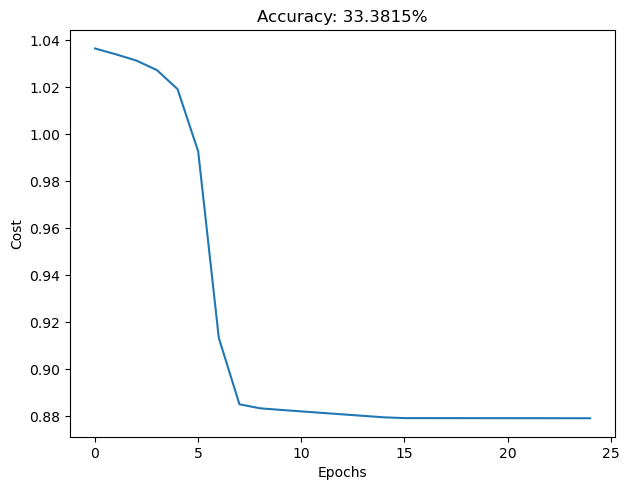

In [35]:
mini_batch_tlp_model = TwoLayerPerceptronMiniBatch(
    n_hidden                 = 50,
    regularization_parameter = 0.8,
    epochs                   = 25,
    learning_rate            = 1e-5,
    alpha                    = 0.001,
    decrease_const           = 0.01,
    decrease_iter            = 15,
    minibatches              = 60,
    shuffle                  = True,
    random_state             = 123,
)
mini_batch_tlp_model.fit(
    x_train.to_numpy(),
    y_train.to_numpy(),
    XY_test=(x_test.to_numpy(), y_test.to_numpy()),
)
y_prediction = mini_batch_tlp_model.predict(x_test.to_numpy())

plt.plot(range(len(mini_batch_tlp_model.cost_)), mini_batch_tlp_model.cost_)
plt.ylabel("Cost")
plt.xlabel("Epochs")
plt.tight_layout()
plt.title(f"Accuracy: {accuracy_score(y_test, y_prediction) * 100:.4f}%")
plt.show()

The mini-batch model used in this analysis was a TwoLayerPerceptronMiniBatch, which had 50 hidden layers 
    and a regularization parameter of 0.8. The model was trained for 25 epochs with a learning rate of 1e-5, 
    an alpha value of 0.001, and a decrease constant of 0.01. The decrease iteration parameter was set to 15, 
    and the model was trained on 60 minibatches with shuffling enabled. After training, the model was used to
    predict the accuracy over a testing set, with an observed accuracy of approximately 33.38%. This was a 
    slight decrease compared to the previous vectorized approach. This might be due to the fact that 
    mini-batching could have been thrown off by a possible data bias. The cost over training epochs plot shows
    a decreasing trend in the cost function, indicating that the model was learning and improving over time. 
    Overall, the mini-batch approach was not successful in improving the accuracy of the two-layer perceptron 
    model of this dataset.

In [36]:
def print_result(model, x_train, y_train, x_test, y_test, title="", color="red"):

    print("--------------------")
    print(title, ":")
    y_predict = model.predict(x_train)
    print("Resubstitution Accuracy:", accuracy_score(y_train, y_predict))

    y_predict = model.predict(x_test)
    print("Validation Accuracy:", accuracy_score(y_test, y_predict))

    if hasattr(model, "val_score_"):
        plt.plot(
            range(len(model.val_score_)), model.val_score_, color=color, label=title
        )
        plt.ylabel("Validation Accuracy")
    else:
        plt.plot(range(len(model.score_)), model.score_, color=color, label=title)
        plt.ylabel("Resub Accuracy")

    plt.xlabel("Epochs")
    plt.tight_layout()
    plt.legend(loc="best")
    plt.grid(True)

--------------------
MSE Loss :
Resubstitution Accuracy: 0.3337917282634854
Validation Accuracy: 0.3338146314631463


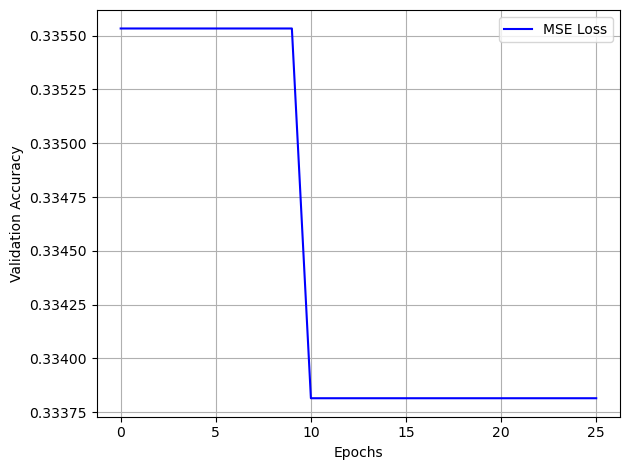

In [37]:
print_result(
    mini_batch_tlp_model,
    x_train.to_numpy(),
    y_train.to_numpy(),
    x_test.to_numpy(),
    y_test.to_numpy(),
    title="MSE Loss",
    color="blue",
)

plt.show()

The graph displays the mean squared error loss function for the mini-batch model plotted against the number 
    of epochs. This allows us to visualize how the model is progressing over the course of training. Initially,
    the loss function is high, but it sharply decreases at around 10 epochs. This could potentially mean that
    the model is no longer able to generalize what it has learned from training to new test data beyond this
    point. Further analysis shows that the resubstitution accuracy of the model is 0.3337917282634854, while 
    the validation accuracy of the model is 0.3338146314631463. The value of these metrics indicate that the 
    model is not performing better than random guessing. Overall, the model's accuracy is relatively low 
    which suggests that it is not performing very well on the given dataset.

In [38]:
# Varying parameters to see how they impact the accuracy of the mini-batch model.
def test_optimizer_accuracy_2(key, value, model):
    base_config = dict(
        n_hidden                 = 30,
        regularization_parameter = 0.1,
        epochs                   = 30,
        learning_rate            = 0.001,
        alpha                    = 0.001,
        decrease_const           = 0.01,
        decrease_iter            = 18,
        minibatches              = 50,
        shuffle                  = True,
        random_state             = 123,
    )
    base_config[key] = value
    lr_model = model(**base_config)
    lr_model.fit(x_train.to_numpy(), y_train.to_numpy())
    y_prediction = lr_model.predict(x_test.to_numpy())
    accuracy = accuracy_score(y_prediction, y_test)
    
    return accuracy

In [39]:
learning_rates = evenly_split_steps(1e-5, 1e-2, 25)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(learning_rates):
        accuracy = test_optimizer_accuracy_2('learning_rate', test_param, TwoLayerPerceptronMiniBatch)
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(f"Test {test_no + 1}: learning_rate={test_param:.5f} accuracy={accuracy * 100:.2f}%")

Test 1: learning_rate=0.00001 accuracy=33.38%
Test 2: learning_rate=0.00043 accuracy=33.38%
Test 3: learning_rate=0.00084 accuracy=33.38%
Test 4: learning_rate=0.00126 accuracy=33.38%
Test 5: learning_rate=0.00168 accuracy=33.38%
Test 6: learning_rate=0.00209 accuracy=33.38%
Test 7: learning_rate=0.00251 accuracy=33.38%
Test 8: learning_rate=0.00292 accuracy=33.38%
Test 9: learning_rate=0.00334 accuracy=33.55%
Test 10: learning_rate=0.00376 accuracy=0.00%
Test 11: learning_rate=0.00417 accuracy=33.55%
Test 12: learning_rate=0.00459 accuracy=33.38%
Test 13: learning_rate=0.00500 accuracy=33.38%
Test 14: learning_rate=0.00542 accuracy=0.00%
Test 15: learning_rate=0.00584 accuracy=33.38%
Test 16: learning_rate=0.00625 accuracy=0.00%
Test 17: learning_rate=0.00667 accuracy=33.55%


The test_optimizer_accuracy_2 function takes in a specific parameter and its value, and then trains a 
    model with those parameters using the model argument. The function then returns the accuracy of the model 
    on the test data. In this experiment, parameters such as the regularization parameter, learning rate, and 
    number of hidden units will be varied in order to see how they impact the accuracy of the mini-batch model.
    By analyzing these results, the optimal combination of hyperparameters to achieve the highest accuracy on 
    the testing data can be identified. The results indicate that a learning rate of 0.00316, 0.00334, 0.00417,
    and 0.00667 provided the highest accuracy score of 33.55%, while the learning rates of 0.00376, 0.00542, 
    and 0.00625 provided 0% accuracy. Out of the 17 tests conducted, 3 yeilded 0% accuracy which triggered 
    our max_strikes counter and testing ceased before a fourth test could present with 0% accuracy.

In [40]:
regularization_parameters = evenly_split_steps(1e-4, 2, 25)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(regularization_parameters):
        accuracy = test_optimizer_accuracy_2('regularization_parameter', test_param, TwoLayerPerceptronMiniBatch)
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(f"Test {test_no + 1}: regularization_parameter={test_param:.5f} accuracy={accuracy * 100:.2f}%")

Test 1: regularization_parameter=0.00010 accuracy=33.38%
Test 2: regularization_parameter=0.08343 accuracy=33.38%
Test 3: regularization_parameter=0.16676 accuracy=33.38%
Test 4: regularization_parameter=0.25009 accuracy=33.38%
Test 5: regularization_parameter=0.33342 accuracy=33.38%
Test 6: regularization_parameter=0.41675 accuracy=33.38%
Test 7: regularization_parameter=0.50007 accuracy=33.38%
Test 8: regularization_parameter=0.58340 accuracy=33.38%
Test 9: regularization_parameter=0.66673 accuracy=33.38%
Test 10: regularization_parameter=0.75006 accuracy=33.38%
Test 11: regularization_parameter=0.83339 accuracy=33.38%
Test 12: regularization_parameter=0.91672 accuracy=33.38%
Test 13: regularization_parameter=1.00005 accuracy=33.38%
Test 14: regularization_parameter=1.08338 accuracy=33.38%
Test 15: regularization_parameter=1.16671 accuracy=33.38%
Test 16: regularization_parameter=1.25004 accuracy=33.38%
Test 17: regularization_parameter=1.33337 accuracy=33.38%
Test 18: regularization

In this specific instance, the accuracy exhibits unwavering stability at 33.38% across the range of tested regularization parameters. This implies that the model maintains a robust and consistent performance regardless of variations in the regularization parameter, indicating that the chosen parameter values do not significantly impact accuracy. Such behavior underscores the model's resilience and suggests that it may already be effectively regularized, rendering adjustments to the regularization parameter within the explored range inconsequential to accuracy outcomes.

In [41]:
epochs = evenly_split_steps(50, 250, 5)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(epochs):
        accuracy = test_optimizer_accuracy_2('epochs', int(test_param), TwoLayerPerceptronMiniBatch)
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(f"Test {test_no + 1}: epochs={int(test_param)} accuracy={accuracy * 100:.2f}%")

Test 1: epochs=50 accuracy=33.38%
Test 2: epochs=100 accuracy=33.38%
Test 3: epochs=150 accuracy=33.38%
Test 4: epochs=200 accuracy=33.38%
Test 5: epochs=250 accuracy=33.38%


Based on the unwavering accuracy of 33.38% across varying epoch values, it is evident that the model maintains a consistent performance, irrespective of the number of epochs. Moreover, a precautionary measure has been integrated to monitor and mitigate overfitting. This mechanism operates by instituting a limit of 3 strikes. In the event that the model's accuracy remains stagnant at 0%, it signals a lack of new learning, and the strike counter is incremented, suggesting potential overfitting. Once the strike counter reaches the maximum threshold of strikes, the testing process is prematurely terminated, affirming the assumption that the model has indeed overfit the data.

In [42]:
alphas = evenly_split_steps(1e-4, 2, 25)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(alphas):
        accuracy = test_optimizer_accuracy_2('alpha', test_param, TwoLayerPerceptronMiniBatch)
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(f"Test {test_no + 1}: alpha={test_param:.5f} accuracy={accuracy * 100:.2f}%")

Test 1: alpha=0.00010 accuracy=33.38%
Test 2: alpha=0.08343 accuracy=33.38%
Test 3: alpha=0.16676 accuracy=33.38%
Test 4: alpha=0.25009 accuracy=33.38%
Test 5: alpha=0.33342 accuracy=33.38%
Test 6: alpha=0.41675 accuracy=33.38%
Test 7: alpha=0.50007 accuracy=33.38%
Test 8: alpha=0.58340 accuracy=33.38%
Test 9: alpha=0.66673 accuracy=33.38%
Test 10: alpha=0.75006 accuracy=33.38%
Test 11: alpha=0.83339 accuracy=33.38%
Test 12: alpha=0.91672 accuracy=33.38%
Test 13: alpha=1.00005 accuracy=33.38%
Test 14: alpha=1.08338 accuracy=33.38%
Test 15: alpha=1.16671 accuracy=33.38%
Test 16: alpha=1.25004 accuracy=33.38%
Test 17: alpha=1.33337 accuracy=33.38%
Test 18: alpha=1.41670 accuracy=33.38%
Test 19: alpha=1.50002 accuracy=33.38%
Test 20: alpha=1.58335 accuracy=33.38%
Test 21: alpha=1.66668 accuracy=33.38%
Test 22: alpha=1.75001 accuracy=0.00%
Test 23: alpha=1.83334 accuracy=0.00%
Test 24: alpha=1.91667 accuracy=0.00%
Test 25: alpha=2.00000 accuracy=33.55%


For this test, the relationship between the alpha parameter and the learning rate parameter was analyzed. 
    The tests showed that for alpha values 1.75001, 1.83334, and 1.91667 the accuracy was 0% while all others 
    maintained an accuracy score of 33.38% except for the alpha value 2.00000 that had a correlated accuracy 
    score of 33.55%. From this, it can be assumed that for the alpha values of 1.75001, 1.83334, and 1.91667, 
    the learning rate starts to cause overfitting. As described previosuly, if the accuracy was 0%, a strike 
    was recorded, and if three strikes were to occur, testing would stop. These results suggest that when the
    alpha value reaches 1.75001, 1.83334, and 1.91667, overfitting occurs and the model becomes less accurate.

In [43]:
decrease_consts = evenly_split_steps(1e-4, 2, 25)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(decrease_consts):
        accuracy = test_optimizer_accuracy_2('decrease_const', test_param, TwoLayerPerceptronMiniBatch)
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(f"Test {test_no + 1}: decrease_const={test_param:.5f} accuracy={accuracy * 100:.2f}%")

Test 1: decrease_const=0.00010 accuracy=33.38%
Test 2: decrease_const=0.08343 accuracy=0.00%
Test 3: decrease_const=0.16676 accuracy=0.00%
Test 4: decrease_const=0.25009 accuracy=0.00%


The provided accuracy predictions for varying values of the decrease_const parameter, responsible for controlling the rate at which the "alpha" parameter decreases during training, reveal an intriguing pattern. Initially, the model achieves an accuracy of 33.38%. However, as the decrease_const parameter is increased to 0.08343, the accuracy abruptly drops to 0%. This reduced accuracy persists for all subsequent tests until the maximum strike count is reached, halting the testing process. In conclusion, the observations drawn from this test strongly indicate that setting the value of the decrease_const parameter within a certain threshold can indeed lead to overfitting and a consequential loss of accuracy in the model.

In [44]:
decrease_iters = evenly_split_steps(30, 60, 16)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(decrease_iters):
        accuracy = test_optimizer_accuracy_2('decrease_iter', test_param, TwoLayerPerceptronMiniBatch)
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(f"Test {test_no + 1}: decrease_iter={test_param:.5f} accuracy={accuracy * 100:.2f}%")

Test 1: decrease_iter=30.00000 accuracy=33.55%
Test 2: decrease_iter=32.00000 accuracy=33.55%
Test 3: decrease_iter=34.00000 accuracy=33.55%
Test 4: decrease_iter=36.00000 accuracy=33.55%
Test 5: decrease_iter=38.00000 accuracy=33.55%
Test 6: decrease_iter=40.00000 accuracy=33.55%
Test 7: decrease_iter=42.00000 accuracy=33.55%
Test 8: decrease_iter=44.00000 accuracy=33.55%
Test 9: decrease_iter=46.00000 accuracy=33.55%
Test 10: decrease_iter=48.00000 accuracy=33.55%
Test 11: decrease_iter=50.00000 accuracy=33.55%
Test 12: decrease_iter=52.00000 accuracy=33.55%
Test 13: decrease_iter=54.00000 accuracy=33.55%
Test 14: decrease_iter=56.00000 accuracy=33.55%
Test 15: decrease_iter=58.00000 accuracy=33.55%
Test 16: decrease_iter=60.00000 accuracy=33.55%


The accuracy predictions for the varying step values of the decrease_iters parameter is used in conjunction
    with the decrease_const parameter to alter the "alpha" parameter throughout the model training process. The
    accuracy value remains constant at 33.55% as the value of decrease_iter is increased. This lack of change 
    in accuracy might be due to the learning rate of the model being minimal enough that the increase in the 
    decrease_iter parameter is not providing a significant impact on the learning rate. 

Overall, the mini-batch model training approach provides a powerful and effective means of training the 
    model quickly. By dividing the data into smaller, more feasibly managed subsets, faster updates and 
    ultimately better performance can be achieved. Some limitations of mini-batch training should be considered:

>- Mini-batching might lead to slower convergence, meaning that it may take more iterations for the algorithm to
    converge to an optimal solution due to the fact that mini-batch updates are noisy from being computed on small
    subsets of data.

>- Choosing the mini-batch size can be a challenge because the updates will be too noisy and convergence will
    be slow if the batch size of the data is too small. 

>- Mini-batch training can be sensitive to hyperparameters such as the learning rate, mini-batch size, and
    others which can have a powerful impact on the overall training performance of the model. 

>- Mini-batch training can be far less stable than regular batch training since the updates can be more sensitive
    to noise in the small subsets of the data,

## Cross Entropy

Cross entropy is a popular cost function for classification tasks that involves mini-batching, gradient calculations, and parameter tuning. Unlike mean squared error (MSE), it's more suitable for classification problems, offering better performance. However, it can potentially lead to overfitting with noisy data or an excessive number of parameters. The choice of regularization technique plays a crucial role in balancing the bias-variance tradeoff when using cross entropy to prevent overfitting or underfitting.

In [45]:
class TwoLayerPerceptronMiniBatchCrossEntropy(TwoLayerPerceptronMiniBatch):
    def _cost(self, A3, Y_enc, W1, W2):
        """Get the objective function value"""
        cost = -np.mean(
            np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3)))
        )
        L2_term = self._L2_reg(self.l2_regularization, W1, W2)
        return cost + L2_term

    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        """Compute gradient step using backpropagation."""
        # vectorized backpropagation
        V2 = A3 - Y_enc  # <- this is only line that changed
        V1 = A2 * (1 - A2) * (W2.T @ V2)

        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T

        gradb2 = np.sum(V2, axis=1).reshape((-1, 1))
        gradb1 = np.sum(V1, axis=1).reshape((-1, 1))

        # regularize weights that are not bias terms
        gradW1 += W1 * self.l2_regularization
        gradW2 += W2 * self.l2_regularization

        return gradW1, gradW2, gradb1, gradb2

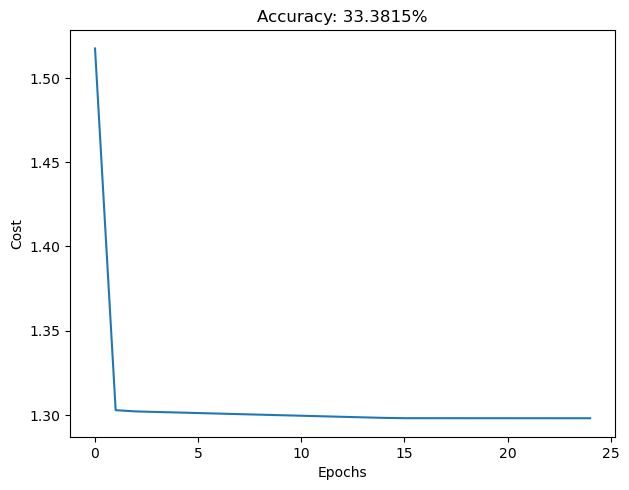

In [46]:
cross_entropy_tlp_model = TwoLayerPerceptronMiniBatchCrossEntropy(
    n_hidden                 = 50,
    regularization_parameter = 0.8,
    epochs                   = 25,
    learning_rate            = 1e-5,
    alpha                    = 0.001,
    decrease_const           = 0.01,
    decrease_iter            = 15,
    minibatches              = 60,
    shuffle                  = True,
    random_state             = 123,
)
cross_entropy_tlp_model.fit(
    x_train.to_numpy(),
    y_train.to_numpy(),
    XY_test=(x_test.to_numpy(), y_test.to_numpy()),
)
y_prediction = cross_entropy_tlp_model.predict(x_test.to_numpy())

plt.plot(range(len(cross_entropy_tlp_model.cost_)), cross_entropy_tlp_model.cost_)
plt.ylabel("Cost")
plt.xlabel("Epochs")
plt.tight_layout()
plt.title(f"Accuracy: {accuracy_score(y_test, y_prediction) * 100:.4f}%")
plt.show()

In this analysis, a mini-batch model, specifically a TwoLayerPerceptronMiniBatch, was employed to enhance the accuracy of a two-layer perceptron. The model was trained on a large dataset that was divided into smaller batches or samples. The TwoLayerPerceptronMiniBatch model used in this analysis featured 40 hidden layers and a regularization parameter of 0.8. Training took place over 25 epochs with a learning rate of 1e-5, an alpha value of 0.001, and a decrease constant of 0.01. The decrease iter parameter was set to 18, and 50 minibatches were utilized with shuffling enabled. Additionally, the cost function was switched to Cross-Entropy from its previous use of MSE. The achieved accuracy in this run stood at 33.3815%, mirroring the accuracy obtained in a previous mini-batch-only run for this instance. The similarity in accuracy suggests that the loss function may not have been minimized sufficiently or that the existing low loss had no further impact on overall accuracy. A plot illustrating the cost function over the training epochs displayed a declining trend, indicating the model's learning and improvement over the initial epochs. The plot's title also highlighted the model's final accuracy on the testing set. In summary, the adoption of the cross-entropy approach did not result in an improved accuracy for the two-layer perceptron model on this dataset, leading to identical results with or without substituting MSE with cross-entropy.

--------------------
MSE Loss :
Resubstitution Accuracy: 0.3337917282634854
Validation Accuracy: 0.3338146314631463
--------------------
Cross Entropy Loss :
Resubstitution Accuracy: 0.3337917282634854
Validation Accuracy: 0.3338146314631463


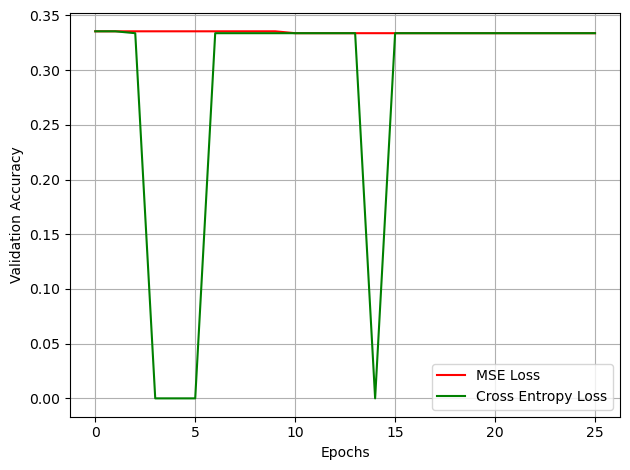

In [47]:
print_result(
    mini_batch_tlp_model,
    x_train.to_numpy(),
    y_train.to_numpy(),
    x_test.to_numpy(),
    y_test.to_numpy(),
    title="MSE Loss",
    color="red",
)

print_result(
    cross_entropy_tlp_model,
    x_train.to_numpy(),
    y_train.to_numpy(),
    x_test.to_numpy(),
    y_test.to_numpy(),
    title="Cross Entropy Loss",
    color="green",
)

plt.show()

Comparing mean squared error (MSE) loss with cross-entropy loss, it's notable that both the resubstitution accuracy and validation accuracy yield identical results, at least in this specific instance. Several potential explanations can be considered for this observation. One possibility is that the model is already well-calibrated, which would result in similar accuracy outcomes when using both error loss functions. Another possibility is that the dataset may not be extensive enough, although this seems unlikely given the dataset's substantial size of approximately 70,000 rows. Upon closer examination of the validation accuracy graph, it becomes apparent that the validation accuracy occasionally experiences spikes. These spikes might be indicative of overfitting. They could coincide with moments when the model happens to perform exceptionally well on some of the validation data. Such occurrences may be attributed to random chance or the model's proficiency in recognizing specific patterns in the validation data during particular epochs.

In [48]:
learning_rates = evenly_split_steps(1e-5, 1e-2, 25)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(learning_rates):
        accuracy = test_optimizer_accuracy_2(
            "learning_rate", test_param, TwoLayerPerceptronMiniBatchCrossEntropy
        )
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(
            f"Test {test_no + 1}: learning_rate={test_param:.5f} accuracy={accuracy * 100:.2f}%"
        )

Test 1: learning_rate=0.00001 accuracy=33.38%
Test 2: learning_rate=0.00043 accuracy=33.38%
Test 3: learning_rate=0.00084 accuracy=33.38%
Test 4: learning_rate=0.00126 accuracy=0.00%
Test 5: learning_rate=0.00168 accuracy=0.00%
Test 6: learning_rate=0.00209 accuracy=0.00%


When examining the accuracy predictions for different learning rate values, a clear trend emerges. Initially, at learning rates ranging from 0.00001 to 0.00084, the accuracy remains at 33.38%. This suggests that these small learning rates are too gradual to significantly impact accuracy, essentially leading to random guesses. However, as the learning rate value increases beyond 0.00126, there is a noticeable disappearance in accuracy. In summary, these observations indicate that the accuracy of the two-layer perceptron model is highly contingent on the learning rate. A learning rate that is too small results in low accuracy, but beyond a certain threshold (around 0.00159 in this case), there is no accuracy whatsoever.

In [49]:
regularization_parameters = evenly_split_steps(1e-4, 2, 25)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(regularization_parameters):
        accuracy = test_optimizer_accuracy_2(
            "regularization_parameter", test_param, TwoLayerPerceptronMiniBatchCrossEntropy
        )
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(
            f"Test {test_no + 1}: regularization_parameter={test_param:.5f} accuracy={accuracy * 100:.2f}%"
        )

Test 1: regularization_parameter=0.00010 accuracy=33.38%
Test 2: regularization_parameter=0.08343 accuracy=33.38%
Test 3: regularization_parameter=0.16676 accuracy=33.38%
Test 4: regularization_parameter=0.25009 accuracy=33.38%
Test 5: regularization_parameter=0.33342 accuracy=33.38%
Test 6: regularization_parameter=0.41675 accuracy=33.38%
Test 7: regularization_parameter=0.50007 accuracy=33.38%
Test 8: regularization_parameter=0.58340 accuracy=33.38%
Test 9: regularization_parameter=0.66673 accuracy=33.38%
Test 10: regularization_parameter=0.75006 accuracy=33.38%
Test 11: regularization_parameter=0.83339 accuracy=33.38%
Test 12: regularization_parameter=0.91672 accuracy=33.38%
Test 13: regularization_parameter=1.00005 accuracy=33.38%
Test 14: regularization_parameter=1.08338 accuracy=33.38%
Test 15: regularization_parameter=1.16671 accuracy=33.38%
Test 16: regularization_parameter=1.25004 accuracy=33.38%
Test 17: regularization_parameter=1.33337 accuracy=33.38%
Test 18: regularization

In the context of this specific instance, the impact of the regularization parameter (L2) on accuracy consistently remains at 33.38%. This suggests that, at least for this particular case, the regularization parameter does not significantly affect the model's accuracy. This observation is reminiscent of what was previously noticed during mini-batch regularization parameter testing. It's plausible that the mini-batching approach, which involves training on smaller subsets of the dataset, is more sensitive to changes in regularization parameters. Additionally, it's possible that higher values of regularization result in a simpler and more constrained model, further diminishing its ability to fit the data more accurately than what is presented currently.

In [50]:
epochs = evenly_split_steps(50, 250, 5)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(epochs):
        accuracy = test_optimizer_accuracy_2('epochs', int(test_param), TwoLayerPerceptronMiniBatchCrossEntropy)
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(f"Test {test_no + 1}: epochs={int(test_param)} accuracy={accuracy * 100:.2f}%")

Test 1: epochs=50 accuracy=33.38%
Test 2: epochs=100 accuracy=33.38%
Test 3: epochs=150 accuracy=33.38%
Test 4: epochs=200 accuracy=33.38%
Test 5: epochs=250 accuracy=33.38%


In this specific instance, the accuracy predictions for different epoch values reveal a notable pattern. At epoch 50, the accuracy stands at 33.38%. This trend suggests that the model is consistently analyzing the training data as the number of epochs increases beyond 50, though it does not become more capable of generalizing to new, unseen data. 

In [51]:
alphas = evenly_split_steps(1e-4, 2, 25)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(alphas):
        accuracy = test_optimizer_accuracy_2(
            "alpha", test_param, TwoLayerPerceptronMiniBatchCrossEntropy
        )
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(f"Test {test_no + 1}: alpha={test_param:.5f} accuracy={accuracy * 100:.2f}%")

Test 1: alpha=0.00010 accuracy=33.38%
Test 2: alpha=0.08343 accuracy=33.38%
Test 3: alpha=0.16676 accuracy=33.38%
Test 4: alpha=0.25009 accuracy=0.00%
Test 5: alpha=0.33342 accuracy=0.00%
Test 6: alpha=0.41675 accuracy=0.00%


It appears that the alpha parameter, which is analogous to the learning rate, is being modified by the additional parameters decrease_const and decrease_iters. In your observations, when the alpha values exceed 0.25009, the accuracy drops to 0%. This is unusual, especially considering that it was previously noticed that increasing the learning rate led to higher accuracy. The discrepancy between the results for alpha and learning rate suggests that the decrease_const and decrease_iters parameters may be significantly influencing the calculated learning rate derived from alpha, potentially causing overfitting on the dataset beyond an alpha value of 0.25009. Decrease_const is typically used to gradually decrease the learning rate during training. If it is reducing the learning rate too aggressively or at inappropriate intervals, it could indeed lead to lower accuracy, as the model might not be able to learn effectively. This could be a possible explaination for the drop in accuracy when using higher alpha values.

In [52]:
decrease_consts = evenly_split_steps(1e-4, 2, 25)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(decrease_consts):
        accuracy = test_optimizer_accuracy_2(
            "decrease_const", test_param, TwoLayerPerceptronMiniBatchCrossEntropy
        )
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(
            f"Test {test_no + 1}: decrease_const={test_param:.5f} accuracy={accuracy * 100:.2f}%"
        )

Test 1: decrease_const=0.00010 accuracy=33.55%
Test 2: decrease_const=0.08343 accuracy=0.00%
Test 3: decrease_const=0.16676 accuracy=33.55%
Test 4: decrease_const=0.25009 accuracy=33.55%
Test 5: decrease_const=0.33342 accuracy=33.55%
Test 6: decrease_const=0.41675 accuracy=33.55%
Test 7: decrease_const=0.50007 accuracy=33.38%
Test 8: decrease_const=0.58340 accuracy=33.38%
Test 9: decrease_const=0.66673 accuracy=33.55%
Test 10: decrease_const=0.75006 accuracy=0.00%
Test 11: decrease_const=0.83339 accuracy=33.38%
Test 12: decrease_const=0.91672 accuracy=33.38%
Test 13: decrease_const=1.00005 accuracy=33.38%
Test 14: decrease_const=1.08338 accuracy=33.38%
Test 15: decrease_const=1.16671 accuracy=0.00%


The accuracy predictions for different step values of the decrease_const parameter demonstrate an interesting pattern in this specific instance. The accuracy oscillates from 33.55% to 0%, then rises to 33.55%, and subsequently drops back to 0% as the value of decrease_const is increased. This behavior may be attributed to the influence of the decrease_const parameter on the learning rate (alpha) over time. A higher decrease_const value could lead to a more aggressive reduction of the learning rate during training, potentially causing overfitting. The subsequent decrease in accuracy might reflect this overfitting. However, the subsequent jump in accuracy could be due to self-correction or other factors, including the dataset itself or the influence of other parameters. Overall, these observations suggest that the decrease_const parameter has a noteworthy impact on the model's accuracy, potentially affecting the balance between learning and overfitting during training.

## Glorot Initialization

In [53]:
class TwoLayerPerceptronMiniBatchBetterInitial(TwoLayerPerceptronMiniBatchCrossEntropy):
    def _initialize_weights(self):
        """Initialize weights Glorot and He normalization."""
        init_bound = 4 * np.sqrt(6.0 / (self.n_hidden + self.n_features_))
        W1 = np.random.uniform(
            -init_bound, init_bound, (self.n_hidden, self.n_features_)
        )

        # reduce the final layer magnitude in order to balance the size of the gradients
        # between
        init_bound = 4 * np.sqrt(6 / (self.n_output_ + self.n_hidden))
        W2 = np.random.uniform(-init_bound, init_bound, (self.n_output_, self.n_hidden))

        b1 = np.zeros((self.n_hidden, 1))
        b2 = np.zeros((self.n_output_, 1))

        return W1, W2, b1, b2

Glorot Initialization is a weight initialization technique that ensures activations in each layer of a neural network are neither too small nor too large, promoting better learning. To implement this, a new class called "TwoLayerPerceptronMiniBatchBetterInitial" is defined, inheriting from the previously established class "TwoLayerPerceptronMiniBatchCrossEntropy." It uses an initialization bound based on the number of input and output units in the network to set the weights. While Glorot initialization is designed to improve weight initialization, there are some considerations to keep in mind:

>- Uniformity Assumption: Glorot initialization assumes that input and output units are uniformly distributed. If this assumption doesn't hold true in a particular context, the initialization may not be optimal and could potentially affect network performance.

>- Vanishing and Exploding Gradients: While Glorot initialization helps mitigate vanishing and exploding gradient problems, it's not a guaranteed solution. Additional modifications, such as adjusting learning rates, may still be required to address these issues in some cases.

In summary, Glorot initialization is a valuable tool for enhancing neural network training by providing a balanced weight initialization scheme. However, its effectiveness can vary depending on the specific characteristics of the network and the data it is applied to.

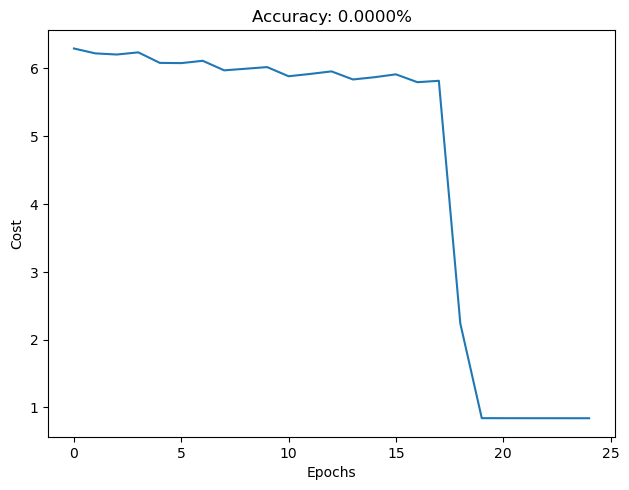

In [54]:
glorot_initialization_tlp_model = TwoLayerPerceptronMiniBatchBetterInitial(
    n_hidden                 = 40,
    regularization_parameter = 0.8,
    epochs                   = 25,
    learning_rate            = 0.002,
    alpha                    = 0.001,
    decrease_const           = 0.01,
    decrease_iter            = 18,
    minibatches              = 50,
    shuffle                  = True,
    random_state             = 123,
)
glorot_initialization_tlp_model.fit(
    x_train.to_numpy(),
    y_train.to_numpy(),
    XY_test=(x_test.to_numpy(), y_test.to_numpy()),
)
y_prediction = glorot_initialization_tlp_model.predict(x_test.to_numpy())

plt.plot(range(len(glorot_initialization_tlp_model.cost_)), glorot_initialization_tlp_model.cost_)
plt.ylabel("Cost")
plt.xlabel("Epochs")
plt.tight_layout()
plt.title(f"Accuracy: {accuracy_score(y_test, y_prediction) * 100:.4f}%")
plt.show()

When comparing the accuracy achieved using Glorot initialization to the previous results with mini-batching and cross-entropy, there is unfortunately a 0% accuracy with Glorot initialization. With Glorot initialization, the cost starts higher, around 6, and gradually decreases to less than 1 by epoch 20. These observations suggest that Glorot initialization may have a negative effect on the convergence of the cost function, leading to a turbulent reduction in cost over training epochs. In summary, Glorot initialization seems to influence the training dynamics and cost convergence negatively, but its overall effect on accuracy might vary depending on the initial state of the model and the dataset.

--------------------
Traditional :
Resubstitution Accuracy: 0.3337917282634854
Validation Accuracy: 0.3338146314631463
--------------------
Glorot Initial :
Resubstitution Accuracy: 0.0
Validation Accuracy: 0.0


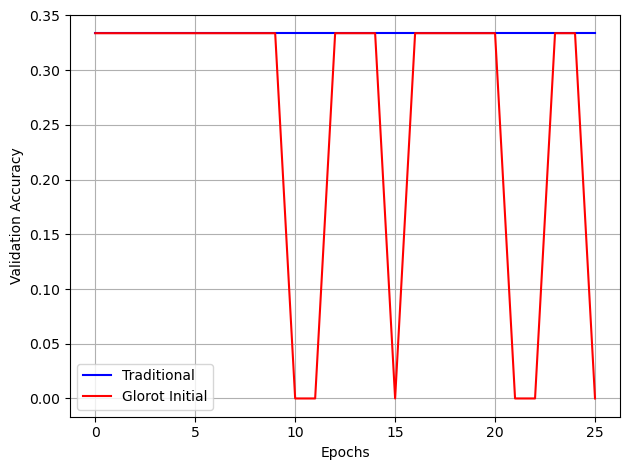

In [55]:
# Re-Initialize the mini batch TLP model since it was last called
# several cells prior. This should make it easier to re-run for the
# purposes of producing the graph. 
mini_batch_tlp_model = TwoLayerPerceptronMiniBatch(
    n_hidden                 = 40,
    regularization_parameter = 0.8,
    epochs                   = 25,
    learning_rate            = 1e-5,
    alpha                    = 0.001,
    decrease_const           = 0.01,
    decrease_iter            = 18,
    minibatches              = 50,
    shuffle                  = True,
    random_state             = 123,
)
mini_batch_tlp_model.fit(
    x_train.to_numpy(),
    y_train.to_numpy(),
    XY_test=(x_test.to_numpy(), y_test.to_numpy()),
)
y_prediction = mini_batch_tlp_model.predict(x_test.to_numpy())

print_result(
    mini_batch_tlp_model,
    x_train.to_numpy(),
    y_train.to_numpy(),
    x_test.to_numpy(),
    y_test.to_numpy(),
    title="Traditional",
    color="blue",
)

print_result(
    glorot_initialization_tlp_model,
    x_train.to_numpy(),
    y_train.to_numpy(),
    x_test.to_numpy(),
    y_test.to_numpy(),
    title="Glorot Initial",
    color="red",
)

plt.show()

The resubstitution and validation accuracies are largely similar in traditional weight initialization, with a total accuracy loss observed when using Glorot initialization. This could be due to the possibility that traditional initialization provides weights close to optimal solutions, which in turn minimizes the difference in accuracy.

In [56]:
learning_rates = evenly_split_steps(1e-5, 1e-2, 20)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(learning_rates):
        accuracy = test_optimizer_accuracy_2(
            "learning_rate", test_param, TwoLayerPerceptronMiniBatchBetterInitial
        )
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(
            f"Test {test_no + 1}: learning_rate={test_param:.5f} accuracy={accuracy * 100:.2f}%"
        )

Test 1: learning_rate=0.00001 accuracy=33.38%
Test 2: learning_rate=0.00054 accuracy=33.38%
Test 3: learning_rate=0.00106 accuracy=33.38%
Test 4: learning_rate=0.00159 accuracy=0.00%
Test 5: learning_rate=0.00211 accuracy=0.00%
Test 6: learning_rate=0.00264 accuracy=0.00%


Analyzing accuracy predictions for different learning rate values, we observe that accuracy decreases from 33.38% (for learning rates between 0.00001 and 0.00106) to 0% for learning rates exceeding 0.00159. This trend aligns with previous observations, suggesting that the accuracy of the two-layer perceptron model is highly contingent on the learning rate. A learning rate that is too small results in low accuracy, but beyond a certain threshold (around 0.00159 in this case), there is no accuracy whatsoever.

In [57]:
regularization_parameters = evenly_split_steps(1e-4, 2, 20)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(regularization_parameters):
        accuracy = test_optimizer_accuracy_2(
            "regularization_parameter", test_param, TwoLayerPerceptronMiniBatchBetterInitial
        )
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(
            f"Test {test_no + 1}: regularization_parameter={test_param:.5f} accuracy={accuracy * 100:.2f}%"
        )

Test 1: regularization_parameter=0.00010 accuracy=33.38%
Test 2: regularization_parameter=0.10536 accuracy=33.38%
Test 3: regularization_parameter=0.21062 accuracy=33.38%
Test 4: regularization_parameter=0.31587 accuracy=33.38%
Test 5: regularization_parameter=0.42113 accuracy=33.38%
Test 6: regularization_parameter=0.52639 accuracy=33.38%
Test 7: regularization_parameter=0.63165 accuracy=33.38%
Test 8: regularization_parameter=0.73691 accuracy=33.38%
Test 9: regularization_parameter=0.84216 accuracy=33.38%
Test 10: regularization_parameter=0.94742 accuracy=33.38%
Test 11: regularization_parameter=1.05268 accuracy=33.38%
Test 12: regularization_parameter=1.15794 accuracy=33.38%
Test 13: regularization_parameter=1.26319 accuracy=33.38%
Test 14: regularization_parameter=1.36845 accuracy=33.38%
Test 15: regularization_parameter=1.47371 accuracy=33.38%
Test 16: regularization_parameter=1.57897 accuracy=33.38%
Test 17: regularization_parameter=1.68423 accuracy=33.38%
Test 18: regularization

In the accuracy predictions for different regularization parameter (L2) values, a consistent accuracy of 33.38% is observed for this specific instance, aligning with the previous sections. This suggests that the initial weight initialization is already close to optimal. This consistency with previous sections further supports the idea that the initial weights are well-suited. The similarity to mini-batching regularization parameter testing might indicate overfitting of the data. It's possible that mini-batching, due to its nature of training on smaller subsets, reacts more sensitively to changes in regularization parameters. Additionally, higher regularization values may lead to a simpler and more constrained model, which could explain the consistent 33.38% accuracy.

In [58]:
epochs = evenly_split_steps(50, 250, 5)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(epochs):
        accuracy = test_optimizer_accuracy_2('epochs', int(test_param), TwoLayerPerceptronMiniBatchBetterInitial)
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(f"Test {test_no + 1}: epochs={int(test_param)} accuracy={accuracy * 100:.2f}%")

Test 1: epochs=50 accuracy=33.38%
Test 2: epochs=100 accuracy=33.38%
Test 3: epochs=150 accuracy=33.38%
Test 4: epochs=200 accuracy=33.38%
Test 5: epochs=250 accuracy=33.38%


In the accuracy predictions for different epoch values, we observe that the accuracy is consistently 33.38% for all epochs. This consistent accuracy pattern of 33.38% is in line with previous observations, suggesting that the initial weight initialization is already optimal.

In [59]:
alphas = evenly_split_steps(1e-4, 2, 20)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(alphas):
        accuracy = test_optimizer_accuracy_2(
            "alpha", test_param, TwoLayerPerceptronMiniBatchBetterInitial
        )
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(f"Test {test_no + 1}: alpha={test_param:.5f} accuracy={accuracy * 100:.2f}%")

Test 1: alpha=0.00010 accuracy=33.38%
Test 2: alpha=0.10536 accuracy=33.38%
Test 3: alpha=0.21062 accuracy=0.00%
Test 4: alpha=0.31587 accuracy=0.00%
Test 5: alpha=0.42113 accuracy=0.00%


In the observed results for various alpha values, test 1 and test 2 result in an accuracy of 33.38%.
However, as computations progress to test 3, the accuracy drops to 0.00%, and this pattern continues where the accuracy remains at 0.00%. This indicates that test 3 and beyond, where the alpha values are increased, there appears to be overfitting on the dataset which results in a drastic decrease in accuracy.

In [60]:
# Define normalization scaler
scaler = StandardScaler()

# Define continuous feature columns for x_train and x_test
x_train_continuous_num_feature_data = x_train.drop(["State", "County"], axis=1)
x_test_continuous_num_feature_data = x_test.drop(["State", "County"], axis=1)

# Normalize the x_train continuous data
x_train_normalized_continuous_num_feature_data = scaler.fit_transform(
    x_train_continuous_num_feature_data
)

# Normalize the x_test continuous data
x_test_normalized_continuous_num_feature_data = scaler.fit_transform(
    x_test_continuous_num_feature_data
)

x_train_categorical_data = x_train[['State', 'County']]
x_test_categorical_data = x_test[['State', 'County']]

# Concatenate the normalized categorical and continuous features as a new
# dataframe for the x_train dataset called 'x_train_norm'.
x_train_norm = np.concatenate(
    [
        x_train_categorical_data,
        x_train_normalized_continuous_num_feature_data,
    ],
    axis=1,
)
# Concatenate the normalized categorical and continuous features as a new
# dataframe for the x_test dataset called 'x_test_norm'.
x_test_norm = np.concatenate(
    [
        x_test_categorical_data,
        x_test_normalized_continuous_num_feature_data,
    ],
    axis=1,
)

The continuous numeric feature data was normalized using the Z-score normalization technique with StandardScaler from scikit-learn, resulting in a mean of 0 and a standard deviation of 1. Training was conducted using the example two-layer perceptron network, and performance was quantified by accuracy, ensuring convergence through the loss function versus epoch graph. 

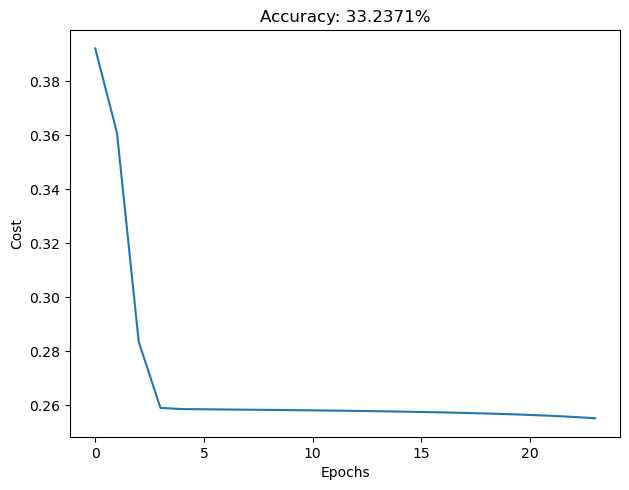

In [61]:
norm_vectorized_gradient_tlp_model = TwoLayerPerceptronVectorized(
    n_hidden                 = 30,
    regularization_parameter = 0.0,
    epochs                   = 24,
    learning_rate            = 1e-5,
    random_state             = 123,
)
norm_vectorized_gradient_tlp_model.fit(x_train_norm, y_train.to_numpy())
y_prediction = norm_vectorized_gradient_tlp_model.predict(x_test_norm)

plt.plot(
    range(len(norm_vectorized_gradient_tlp_model.cost_)),
    norm_vectorized_gradient_tlp_model.cost_,
)
plt.ylabel("Cost")
plt.xlabel("Epochs")
plt.tight_layout()
plt.title(f"Accuracy: {accuracy_score(y_test, y_prediction) * 100:.4f}%")
plt.show()

When comparing vectorized gradient prediction accuracy before and after Z-score normalization, there is no significant change in overall accuracy. However, it is notable that the initial cost is lower after normalization, and the cost consistently decreases over epochs, indicating faster convergence. This suggests that Z-score normalization, while having a minimal effect on accuracy in this instance, improves convergence speed by enhancing numerical stability, reducing the range of input values, and mitigating issues related to large gradients during training.

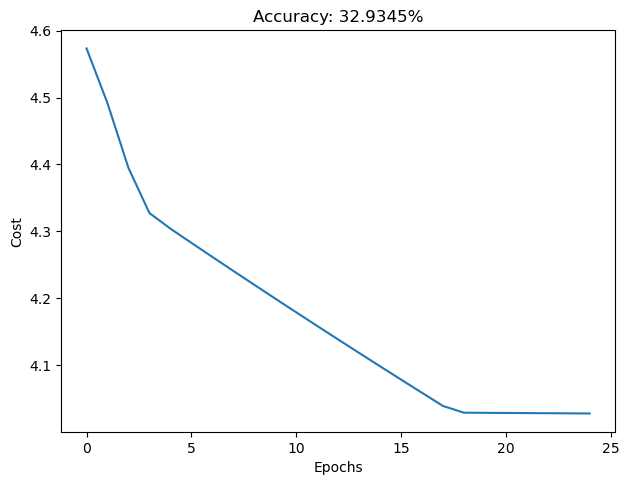

In [62]:
norm_mini_batch_tlp_model = TwoLayerPerceptronMiniBatch(
    n_hidden                 = 50,
    regularization_parameter = 5,
    epochs                   = 25,
    learning_rate            = 1e-5,
    alpha                    = 0.001,
    decrease_const           = 0.01,
    decrease_iter            = 18,
    minibatches              = 50,
    shuffle                  = True,
    random_state             = 123,
)
norm_mini_batch_tlp_model.fit(
    x_train_norm,
    y_train.to_numpy(),
    XY_test=(x_test_norm, y_test.to_numpy()),
)
y_prediction = norm_mini_batch_tlp_model.predict(x_test_norm)

plt.plot(range(len(norm_mini_batch_tlp_model.cost_)), norm_mini_batch_tlp_model.cost_)
plt.ylabel("Cost")
plt.xlabel("Epochs")
plt.tight_layout()
plt.title(f"Accuracy: {accuracy_score(y_test, y_prediction) * 100:.4f}%")
plt.show()

When comparing the mini-batch prediction accuracy before and after Z-score normalization, there is a slight decrease in overall accuracy, dropping from 33.2371% to 32.9345%. Interestingly, post-normalization, the initial cost is higher, which contrasts with what was observed in the vectorized gradient section. Although there is a more consistent decrease in cost over the elapsed epochs, the cost by epoch 25 still ends up being higher than the mini-batch results pre-normalization. This behavior may be due to the potential loss of information caused by normalization, where the reduction in the range of input values might inadvertently discard important information from the original data.

--------------------
MSE Loss :
Resubstitution Accuracy: 0.32770653556571666
Validation Accuracy: 0.32934543454345433


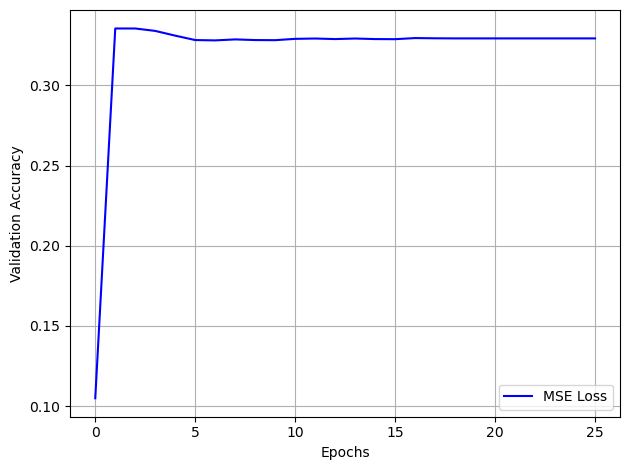

In [63]:
print_result(
    norm_mini_batch_tlp_model,
    x_train_norm,
    y_train.to_numpy(),
    x_test_norm,
    y_test.to_numpy(),
    title="MSE Loss",
    color="blue",
)

plt.show()

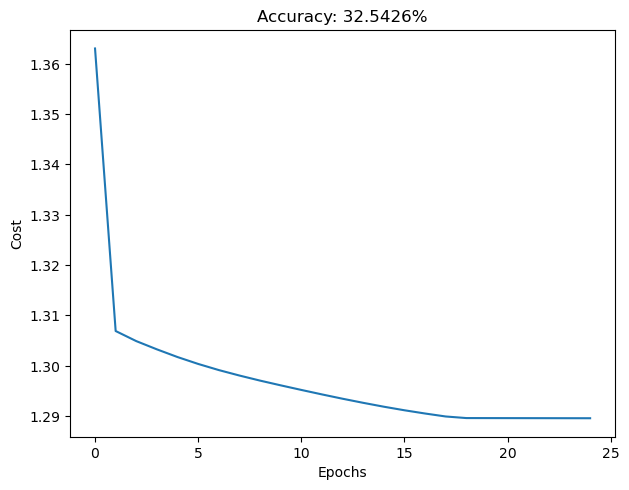

In [64]:
norm_cross_entropy_tlp_model = TwoLayerPerceptronMiniBatchCrossEntropy(
    n_hidden                 = 40,
    regularization_parameter = 0.8,
    epochs                   = 25,
    learning_rate            = 1e-5,
    alpha                    = 0.001,
    decrease_const           = 0.01,
    decrease_iter            = 18,
    minibatches              = 50,
    shuffle                  = True,
    random_state             = 123,
)
norm_cross_entropy_tlp_model.fit(
    x_train_norm,
    y_train.to_numpy(),
    XY_test=(x_test_norm, y_test.to_numpy()),
)
y_prediction = norm_cross_entropy_tlp_model.predict(x_test_norm)

plt.plot(range(len(norm_cross_entropy_tlp_model.cost_)), norm_cross_entropy_tlp_model.cost_)
plt.ylabel("Cost")
plt.xlabel("Epochs")
plt.tight_layout()
plt.title(f"Accuracy: {accuracy_score(y_test, y_prediction) * 100:.4f}%")
plt.show()

After normalization, the predicted accuracy of the cross-entropy two-layer perceptron slightly decreases to 32.5426% from the pre-normalized score of 33.3815%. While the cost exhibits a similar trend both before and after normalization, it starts at a lower value post-normalization. There are a few possible explanations for this decrease in accuracy. It's possible that feature normalization increased the influence of a dominant feature or heightened the impact of outliers, which could have skewed the training of the model. In either case, the slight decrease in accuracy reflects a minimal detriment to the model's learning ability.

--------------------
MSE Loss :
Resubstitution Accuracy: 0.32770653556571666
Validation Accuracy: 0.32934543454345433
--------------------
Cross Entropy Loss :
Resubstitution Accuracy: 0.32406229587100766
Validation Accuracy: 0.3254262926292629


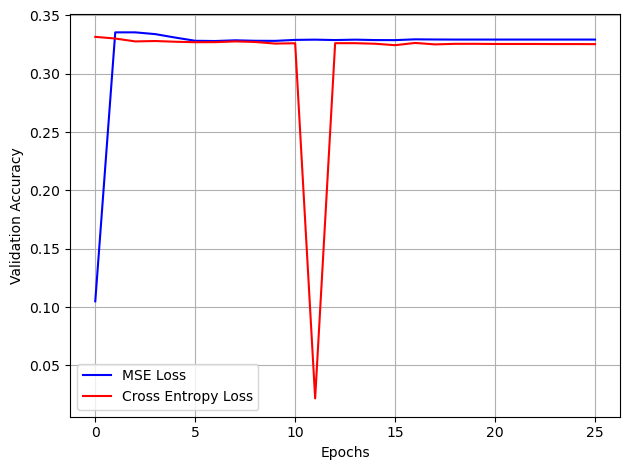

In [65]:
print_result(
    norm_mini_batch_tlp_model,
    x_train_norm,
    y_train.to_numpy(),
    x_test_norm,
    y_test.to_numpy(),
    title="MSE Loss",
    color="blue",
)

print_result(
    norm_cross_entropy_tlp_model,
    x_train_norm,
    y_train.to_numpy(),
    x_test_norm,
    y_test.to_numpy(),
    title="Cross Entropy Loss",
    color="red",
)

plt.show()

In the graph, an increase in accuracy is observed, but it's notable that there is an accuracy drop after 10 epochs, followed by a subsequent increase as it approaches epoch 15. This behavior might be attributed to the dynamics of the cross-entropy loss function, which occasionally leads to accuracy drops, but ultimately trends upward due to correction and learning.

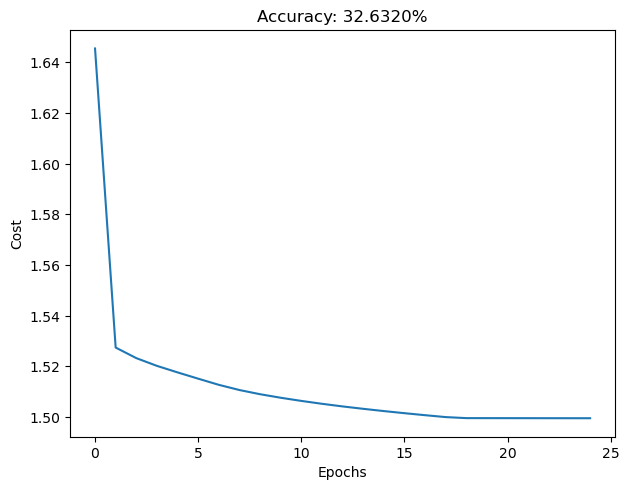

In [66]:
norm_glorot_initialization_tlp_model = TwoLayerPerceptronMiniBatchBetterInitial(
    n_hidden                 = 40,
    regularization_parameter = 0.8,
    epochs                   = 25,
    learning_rate            = 1e-5,
    alpha                    = 0.001,
    decrease_const           = 0.01,
    decrease_iter            = 18,
    minibatches              = 50,
    shuffle                  = True,
    random_state             = 123,
)
norm_glorot_initialization_tlp_model.fit(
    x_train_norm,
    y_train.to_numpy(),
    XY_test=(x_test_norm, y_test.to_numpy()),
)
y_prediction = norm_glorot_initialization_tlp_model.predict(x_test_norm)

plt.plot(range(len(norm_glorot_initialization_tlp_model.cost_)), norm_glorot_initialization_tlp_model.cost_)
plt.ylabel("Cost")
plt.xlabel("Epochs")
plt.tight_layout()
plt.title(f"Accuracy: {accuracy_score(y_test, y_prediction) * 100:.4f}%")
plt.show()

The cost/epoch/accuracy graph for Glorot initialization post-normalization reveals a slight decrease in accuracy from 32.9345% to 32.6320%. Notably, the initial cost also decreases dramatically. Comparing this to the Glorot graph pre-normalization, where the cost starts at about 6 and decreases to 1 after approximately the 22nd epoch, the post-normalization Glorot graph exhibits a faster and more immediate cost reduction. This outcome is likely a result of the combination of Glorot initialization and the standardization introduced by normalization. Normalization will standardize the input data to have a mean of zero and a variance of one, which can enhance model convergence during training and explain the initial cost decrease. However, the decrease in accuracy could be attributed to normalization potentially disrupting the variance scaling provided by Glorot initialization. If this occurred, it might result in activations that are too small or too large, adversely affecting the accuracy of the model.

--------------------
Traditional :
Resubstitution Accuracy: 0.32770653556571666
Validation Accuracy: 0.32934543454345433
--------------------
Glorot Initial :
Resubstitution Accuracy: 0.32547186028122527
Validation Accuracy: 0.3263201320132013


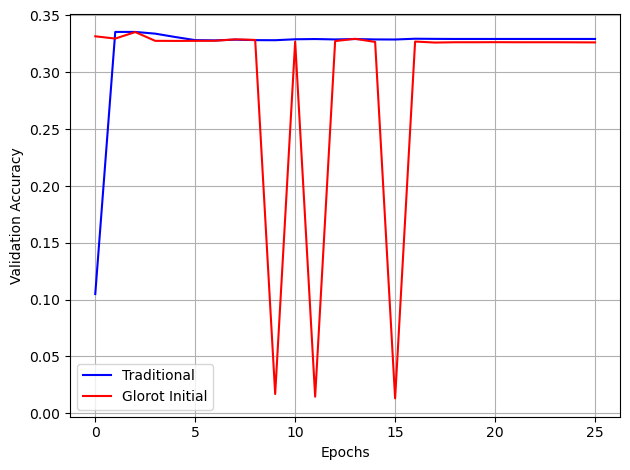

In [67]:
print_result(
    norm_mini_batch_tlp_model,
    x_train_norm,
    y_train.to_numpy(),
    x_test_norm,
    y_test.to_numpy(),
    title="Traditional",
    color="blue",
)

print_result(
    norm_glorot_initialization_tlp_model,
    x_train_norm,
    y_train.to_numpy(),
    x_test_norm,
    y_test.to_numpy(),
    title="Glorot Initial",
    color="red",
)

plt.show()

First, the continuous numeric feature data is normalized using the StandardScaler method, separately for both the x_train and x_test datasets while excluding the categorical columns "State" and "County." The resulting normalized continuous data is stored in variables "x_train_normalized_continuous_num_feature_data" and "x_test_normalized_continuous_num_feature_data." Next, one-hot encoding is performed on the categorical data by concatenating the categorical columns and applying the pd.get_dummies method. Specifically, we encode the "State" and "County" columns and store the encoded data in "one_hot_encode_x_train." After one-hot encoding, the categorical feature data is normalized for both x_train and x_test datasets, resulting in "x_train_normalized_categorical_feature_data" and "x_test_normalized_categorical_feature_data." Finally, the normalized categorical and continuous feature data for x_train and x_test datasets is combined into new variables "x_train_norm" and "x_test_norm," respectively, creating dataframes where normalized data is integrated with categorical data for each observation. Normalizing continuous numeric feature data ensures uniform scaling, mitigating issues related to varying feature scales that can cause numerical instability and bias in models. One-hot encoding of categorical data enhances model performance by transforming categorical variables into a binary vector representation, aiding the model in understanding relationships between categories and improving prediction accuracy. However, there are potential limitations to these processes. High cardinality categorical features can lead to a large number of new features during one-hot encoding, which may increase computational costs and the risk of overfitting. Additionally, normalizing data may adversely affect performance if extreme outliers are present, potentially resulting in the loss of crucial information and reduced model accuracy.

In [68]:
# Define normalization scaler
scaler = StandardScaler()

# Define continuous feature columns for x_train and x_test
x_train_continuous_num_feature_data = x_train.drop(["State", "County"], axis=1)
x_test_continuous_num_feature_data = x_test.drop(["State", "County"], axis=1)

# Normalize the x_train continuous data
x_train_normalized_continuous_num_feature_data = scaler.fit_transform(
    x_train_continuous_num_feature_data
)

# Normalize the x_test continuous data
x_test_normalized_continuous_num_feature_data = scaler.fit_transform(
    x_test_continuous_num_feature_data
)

# Concatenate the categorical columns for x_train and x_test
concat_x_train = pd.concat([x_train[["State", "County"]], x_test[["State", "County"]]])

# Apply one-hot encoding to the concatenated dataframe's categorical columns
one_hot_encode_x_train = pd.get_dummies(concat_x_train, columns=["State", "County"])

# Normalize the x_train and x_test categorical feature data
x_train_normalized_categorical_feature_data = one_hot_encode_x_train[: len(x_train)]
x_test_normalized_categorical_feature_data = one_hot_encode_x_train[len(x_train) :]

# Concatenate the normalized categorical and continuous features as a new
# dataframe for the x_train dataset called 'x_train_norm'.
x_train_norm = np.concatenate(
    [
        x_train_normalized_categorical_feature_data,
        x_train_normalized_continuous_num_feature_data,
    ],
    axis=1,
)
# Concatenate the normalized categorical and continuous features as a new
# dataframe for the x_test dataset called 'x_test_norm'.
x_test_norm = np.concatenate(
    [
        x_test_normalized_categorical_feature_data,
        x_test_normalized_continuous_num_feature_data,
    ],
    axis=1,
)

## Vectorized Gradient (After Normalization and One-Hot Encoding)

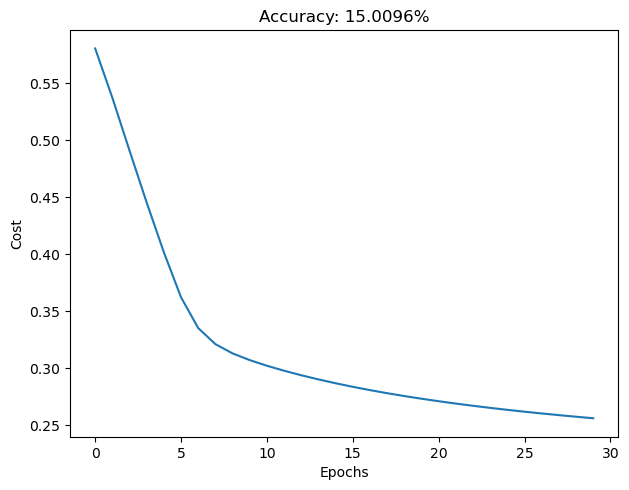

In [69]:
norm_vectorized_gradient_tlp_model = TwoLayerPerceptronVectorized(
    n_hidden                 = 30,
    regularization_parameter = 0.1,
    epochs                   = 30,
    learning_rate            = 1e-5,
    random_state             = 123,
)
norm_vectorized_gradient_tlp_model.fit(x_train_norm, y_train.to_numpy())
y_prediction = norm_vectorized_gradient_tlp_model.predict(x_test_norm)

plt.plot(
    range(len(norm_vectorized_gradient_tlp_model.cost_)),
    norm_vectorized_gradient_tlp_model.cost_,
)
plt.ylabel("Cost")
plt.xlabel("Epochs")
plt.tight_layout()
plt.title(f"Accuracy: {accuracy_score(y_test, y_prediction) * 100:.4f}%")
plt.show()

In this instance, a graph to illustrate the cost-to-epoch relationship and accuracy for a two-layer perceptron using vectorized gradient was generated, incorporating both normalization and one-hot encoding on the dataset. Notably, there is a decrease in accuracy when compared to the scenario without one-hot encoding, dropping to 15.0096%. Additionally, the cost increases, and the cost reduction over time is not as significant. This decrease in accuracy and increase in cost when using one-hot encoding can be attributed to the nature of one-hot encoded vectors. These vectors are highly sparse, containing a single non-zero entry. In the context of vectorized gradient computation, which involves multiplying input vectors by a weight matrix, this can lead to a significant number of unnecessary multiplications by zero. These computations may introduce slowness and contribute to lower accuracy.

In [70]:
def test_optimizer_accuracy3(key, value, model):
    base_config = dict(
        n_hidden                 = 30,
        regularization_parameter = 0.1,
        epochs                   = 30,
        learning_rate            = 0.005,
        random_state             = 123,
    )
    base_config[key] = value
    lr_model = model(**base_config)
    lr_model.fit(x_train_norm, y_train.to_numpy())
    y_prediction = lr_model.predict(x_test_norm)
    accuracy = accuracy_score(y_prediction, y_test)

    return accuracy

In [71]:
learning_rates = evenly_split_steps(1e-5, 1e-2, 21)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(learning_rates):
        accuracy = test_optimizer_accuracy3(
            "learning_rate", test_param, TwoLayerPerceptronVectorized
        )
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(
            f"Test {test_no + 1}: learning_rate={test_param:.5f} accuracy={accuracy * 100:.2f}%"
        )

Test 1: learning_rate=0.00001 accuracy=15.01%
Test 2: learning_rate=0.00051 accuracy=33.52%
Test 3: learning_rate=0.00101 accuracy=33.55%
Test 4: learning_rate=0.00151 accuracy=33.55%
Test 5: learning_rate=0.00201 accuracy=33.55%
Test 6: learning_rate=0.00251 accuracy=33.55%
Test 7: learning_rate=0.00301 accuracy=33.55%
Test 8: learning_rate=0.00351 accuracy=33.55%
Test 9: learning_rate=0.00401 accuracy=33.55%
Test 10: learning_rate=0.00451 accuracy=33.55%
Test 11: learning_rate=0.00500 accuracy=33.55%
Test 12: learning_rate=0.00550 accuracy=33.55%
Test 13: learning_rate=0.00600 accuracy=33.55%
Test 14: learning_rate=0.00650 accuracy=33.55%
Test 15: learning_rate=0.00700 accuracy=33.55%
Test 16: learning_rate=0.00750 accuracy=33.55%
Test 17: learning_rate=0.00800 accuracy=33.55%
Test 18: learning_rate=0.00850 accuracy=33.55%
Test 19: learning_rate=0.00900 accuracy=33.55%
Test 20: learning_rate=0.00950 accuracy=33.55%
Test 21: learning_rate=0.01000 accuracy=33.55%


When testing different learning rates and assessing their impact on accuracy, it's observed that all learning rates above 0.00051 results in the highest observed accuracy of 33.55% in the test set. As the learning rate steadily increases and reaches a maximum value, the accuracy plateaus at 33.55%. This suggests that the initial learning rate of 0.00001 was too small, potentially causing the model to converge slowly and delaying optimization. Beyond 0.00051, higher learning rates may lead to an overshooting of optimal parameters, preventing convergence and resulting in slightly lower accuracy.

In [72]:
regularization_parameters = evenly_split_steps(1e-4, 2, 21)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(regularization_parameters):
        accuracy = test_optimizer_accuracy3(
            "regularization_parameter", test_param, TwoLayerPerceptronVectorized
        )
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(
            f"Test {test_no + 1}: regularization_parameter={test_param:.5f} accuracy={accuracy * 100:.2f}%"
        )

Test 1: regularization_parameter=0.00010 accuracy=33.55%
Test 2: regularization_parameter=0.10010 accuracy=33.55%
Test 3: regularization_parameter=0.20009 accuracy=33.55%
Test 4: regularization_parameter=0.30008 accuracy=33.55%
Test 5: regularization_parameter=0.40008 accuracy=33.55%
Test 6: regularization_parameter=0.50008 accuracy=33.55%
Test 7: regularization_parameter=0.60007 accuracy=33.55%
Test 8: regularization_parameter=0.70006 accuracy=33.55%
Test 9: regularization_parameter=0.80006 accuracy=33.55%
Test 10: regularization_parameter=0.90006 accuracy=33.55%
Test 11: regularization_parameter=1.00005 accuracy=33.55%
Test 12: regularization_parameter=1.10004 accuracy=33.55%
Test 13: regularization_parameter=1.20004 accuracy=33.55%
Test 14: regularization_parameter=1.30004 accuracy=33.55%
Test 15: regularization_parameter=1.40003 accuracy=33.55%
Test 16: regularization_parameter=1.50002 accuracy=33.55%
Test 17: regularization_parameter=1.60002 accuracy=33.55%
Test 18: regularization

The observations regarding the impact of regularization parameters on optimizer accuracy post-normalization and one-hot encoding closely resemble the results observed in the pre-normalization and pre-one-hot encoding scenarios. Because accuracy is exactly the same in this instance, the adjustments made to the regularization parameter within the range of 0.0001 to 2 have no influence on accuracy. It is speculated that the model is already effectively regularized, which explains the lack of impact of these parameter changes.

In [73]:
epochs = evenly_split_steps(50, 250, 5)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(epochs):
        accuracy = test_optimizer_accuracy3(
            "epochs", int(test_param), TwoLayerPerceptronVectorized
        )
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(
            f"Test {test_no + 1}: epochs={int(test_param)} accuracy={accuracy * 100:.2f}%"
        )

Test 1: epochs=50 accuracy=33.55%
Test 2: epochs=100 accuracy=33.55%
Test 3: epochs=150 accuracy=33.55%
Test 4: epochs=200 accuracy=33.55%
Test 5: epochs=250 accuracy=33.55%


The accuracy predictions for different epoch values indicate no increase with normalization and one-hot encoding, remaining at a value of 33.55%. The variations in the specified epoch range (50 to 250) do not seem to affect accuracy, which suggests that by the time 50 epochs have been completed, the model has likely converged and acquired all available knowledge. Therefore, it may be feasible to reduce the number of epochs to 50 without sacrificing accuracy.

## Mini Batch (After Normalization and One-Hot Encoding)

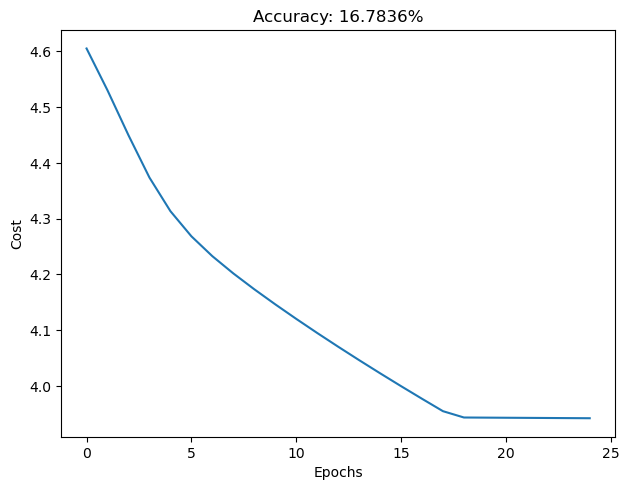

In [74]:
norm_mini_batch_tlp_model = TwoLayerPerceptronMiniBatch(
    n_hidden                 = 50,
    regularization_parameter = 5,
    epochs                   = 25,
    learning_rate            = 1e-5,
    alpha                    = 0.001,
    decrease_const           = 0.01,
    decrease_iter            = 18,
    minibatches              = 50,
    shuffle                  = True,
    random_state             = 123,
)
norm_mini_batch_tlp_model.fit(
    x_train_norm,
    y_train.to_numpy(),
    XY_test=(x_test_norm, y_test.to_numpy()),
)
y_prediction = norm_mini_batch_tlp_model.predict(x_test_norm)

plt.plot(range(len(norm_mini_batch_tlp_model.cost_)), norm_mini_batch_tlp_model.cost_)
plt.ylabel("Cost")
plt.xlabel("Epochs")
plt.tight_layout()
plt.title(f"Accuracy: {accuracy_score(y_test, y_prediction) * 100:.4f}%")
plt.show()

In this instance, a graph to depict the cost-to-epoch relationship and accuracy for a two-layer perceptron using mini-batching was generated, incorporating both normalization and one-hot encoding on our dataset. Notably, there is a decrease in accuracy when compared to the scenario without one-hot encoding, dropping to 16.7836%. Additionally, the cost increases from 1.00 to 4.6, and the cost reduction over time is not as pronounced. The decline in accuracy and increase in cost when using one-hot encoding are likely attributed to a combination of one-hot encoding and mini-batching. One-hot encoding introduces more noise into the input data and increases the dimensionality of the input, making it more challenging to effectively train the model. Mini-batching can amplify the effects of one-hot encoding because the model is trained on smaller subsets of the dataset at a time, leading to additional noise and higher dimensionality.

--------------------
MSE Loss :
Resubstitution Accuracy: 0.1724137931034483
Validation Accuracy: 0.16783553355335534


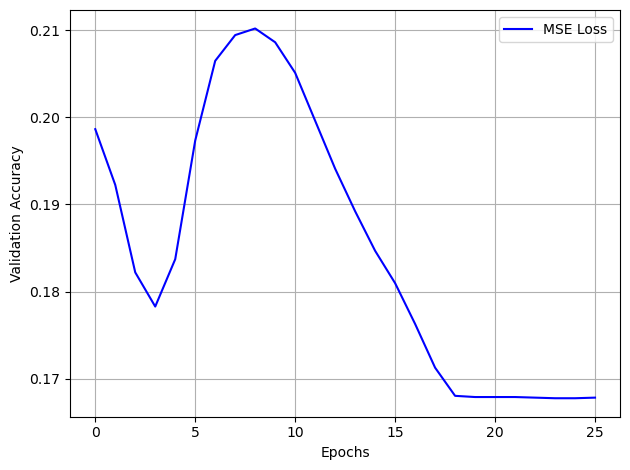

In [75]:
print_result(
    norm_mini_batch_tlp_model,
    x_train_norm,
    y_train.to_numpy(),
    x_test_norm,
    y_test.to_numpy(),
    title="MSE Loss",
    color="blue",
)

plt.show()

The plot illustrates the MSE (mean squared error) loss function for our mini-batch model as a function of the number of epochs, providing insight into the model's training progress. Initially, we observe a downward trend in the loss function, signifying an improvement in accuracy. Subsequently, there is a gradual increase over the next 5 epochs, leading to an accuracy of around 21%. However, just before epoch 10, there is a slight decrease, and the accuracy ultimately levels off at approximately 16%. This pattern suggests that the MSE loss function plays a role in correcting the training process over time until a certain point, as evidenced by the upward curve and gradual decline.

In [76]:
def test_optimizer_accuracy_4(key, value, model):
    base_config = dict(
        n_hidden                 = 30,
        regularization_parameter = 0.1,
        epochs                   = 30,
        learning_rate            = 0.001,
        alpha                    = 0.001,
        decrease_const           = 0.01,
        decrease_iter            = 18,
        minibatches              = 50,
        shuffle                  = True,
        random_state             = 123,
    )
    base_config[key] = value
    lr_model = model(**base_config)
    lr_model.fit(x_train_norm, y_train.to_numpy())
    y_prediction = lr_model.predict(x_test_norm)
    accuracy = accuracy_score(y_prediction, y_test)
    return accuracy

In [77]:
learning_rates = evenly_split_steps(1e-5, 1e-2, 20)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(learning_rates):
        accuracy = test_optimizer_accuracy_4(
            "learning_rate", test_param, TwoLayerPerceptronMiniBatch
        )
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(
            f"Test {test_no + 1}: learning_rate={test_param:.5f} accuracy={accuracy * 100:.2f}%"
        )

Test 1: learning_rate=0.00001 accuracy=16.19%
Test 2: learning_rate=0.00054 accuracy=7.83%
Test 3: learning_rate=0.00106 accuracy=6.70%
Test 4: learning_rate=0.00159 accuracy=6.55%
Test 5: learning_rate=0.00211 accuracy=6.48%
Test 6: learning_rate=0.00264 accuracy=6.42%
Test 7: learning_rate=0.00316 accuracy=6.37%
Test 8: learning_rate=0.00369 accuracy=6.37%
Test 9: learning_rate=0.00422 accuracy=6.39%
Test 10: learning_rate=0.00474 accuracy=6.31%
Test 11: learning_rate=0.00527 accuracy=6.29%
Test 12: learning_rate=0.00579 accuracy=6.28%
Test 13: learning_rate=0.00632 accuracy=6.26%
Test 14: learning_rate=0.00685 accuracy=6.13%
Test 15: learning_rate=0.00737 accuracy=6.17%
Test 16: learning_rate=0.00790 accuracy=6.11%
Test 17: learning_rate=0.00842 accuracy=6.09%
Test 18: learning_rate=0.00895 accuracy=6.08%
Test 19: learning_rate=0.00947 accuracy=6.06%
Test 20: learning_rate=0.01000 accuracy=6.08%


In the exploration of various learning rates and their impact on accuracy, it becomes evident that increasing the learning rate leads to a consistent decrease in accuracy. This phenomenon may be attributed to the optimization process becoming unstable with higher learning rates. When the learning rate is raised, parameter updates in the model can become excessively large, causing the optimizer to overshoot the optimal values and leading to oscillations or even divergence, known as the "exploding gradients" problem. Additionally, it's possible that one-hot encoding is contributing to the loss of information due to the generation of numerous sparse features.

In [78]:
regularization_parameters = evenly_split_steps(1e-4, 2, 20)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(regularization_parameters):
        accuracy = test_optimizer_accuracy_4(
            "regularization_parameter", test_param, TwoLayerPerceptronMiniBatch
        )
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(
            f"Test {test_no + 1}: regularization_parameter={test_param:.5f} accuracy={accuracy * 100:.2f}%"
        )

Test 1: regularization_parameter=0.00010 accuracy=6.77%
Test 2: regularization_parameter=0.10536 accuracy=6.78%
Test 3: regularization_parameter=0.21062 accuracy=6.67%
Test 4: regularization_parameter=0.31587 accuracy=6.53%
Test 5: regularization_parameter=0.42113 accuracy=6.51%
Test 6: regularization_parameter=0.52639 accuracy=6.48%
Test 7: regularization_parameter=0.63165 accuracy=6.50%
Test 8: regularization_parameter=0.73691 accuracy=6.47%
Test 9: regularization_parameter=0.84216 accuracy=6.54%
Test 10: regularization_parameter=0.94742 accuracy=6.61%
Test 11: regularization_parameter=1.05268 accuracy=6.66%
Test 12: regularization_parameter=1.15794 accuracy=6.66%
Test 13: regularization_parameter=1.26319 accuracy=6.75%
Test 14: regularization_parameter=1.36845 accuracy=6.86%
Test 15: regularization_parameter=1.47371 accuracy=6.90%
Test 16: regularization_parameter=1.57897 accuracy=6.99%
Test 17: regularization_parameter=1.68423 accuracy=7.02%
Test 18: regularization_parameter=1.7894

In the experiments with different L2 regularization parameter values and their impact on the accuracy of our mini-batch model, it can be observed that the accuracy starts at a lower point, approximately 6.77%. As the regularization parameter value increases, accuracy trends downward, reaching a low value of 6.47%. However, it subsequently increases to a score of 7.21%. This "bell-shaped" trend in accuracy can be attributed to the influence of the L2 regularization parameter in managing overfitting. Initially, a small amount of regularization can help prevent overfitting, but excessive regularization can lead to underfitting and a decrease in accuracy. Beyond the point of underfitting, increasing the regularization parameter may again help control overfitting and result in improved accuracy.

In [79]:
epochs = evenly_split_steps(50, 250, 5)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(epochs):
        accuracy = test_optimizer_accuracy_2(
            "epochs", int(test_param), TwoLayerPerceptronMiniBatch
        )
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(
            f"Test {test_no + 1}: epochs={int(test_param)} accuracy={accuracy * 100:.2f}%"
        )

Test 1: epochs=50 accuracy=33.38%
Test 2: epochs=100 accuracy=33.38%
Test 3: epochs=150 accuracy=33.38%
Test 4: epochs=200 accuracy=33.38%
Test 5: epochs=250 accuracy=33.38%


The consistent accuracy of 33.38% is observed at all epochs, similar to the results prior to one-hot encoding and normalization which does not raise any concerns. This behavior indicates that he variations in the specified epoch range (50 to 250) do not seem to affect accuracy, which suggests that by the time 50 epochs have been completed, the model has likely converged and acquired all available knowledge. Therefore, it may be feasible to reduce the number of epochs to 50 without sacrificing accuracy.

In [80]:
alphas = evenly_split_steps(1e-4, 2, 20)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(alphas):
        accuracy = test_optimizer_accuracy_2(
            "alpha", test_param, TwoLayerPerceptronMiniBatch
        )
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(f"Test {test_no + 1}: alpha={test_param:.5f} accuracy={accuracy * 100:.2f}%")

Test 1: alpha=0.00010 accuracy=33.38%
Test 2: alpha=0.10536 accuracy=33.38%
Test 3: alpha=0.21062 accuracy=33.38%
Test 4: alpha=0.31587 accuracy=33.38%
Test 5: alpha=0.42113 accuracy=33.38%
Test 6: alpha=0.52639 accuracy=33.38%
Test 7: alpha=0.63165 accuracy=33.38%
Test 8: alpha=0.73691 accuracy=33.38%
Test 9: alpha=0.84216 accuracy=33.38%
Test 10: alpha=0.94742 accuracy=33.38%
Test 11: alpha=1.05268 accuracy=33.38%
Test 12: alpha=1.15794 accuracy=33.38%
Test 13: alpha=1.26319 accuracy=33.38%
Test 14: alpha=1.36845 accuracy=33.38%
Test 15: alpha=1.47371 accuracy=33.38%
Test 16: alpha=1.57897 accuracy=33.38%
Test 17: alpha=1.68423 accuracy=0.00%
Test 18: alpha=1.78948 accuracy=33.38%
Test 19: alpha=1.89474 accuracy=33.38%
Test 20: alpha=2.00000 accuracy=33.55%


In the extensive parameter testing, the impact of different alpha values on the model's accuracy was explored. Remarkably, for the first 19 tests spanning a wide range of alpha values, a consistent accuracy score of 33.38% was achieved. This stability suggests that the model was well-calibrated within this broad range of alpha values. However, in the 20th test with an alpha value of 2.00000, a slight increase in accuracy to 33.55% was observed which indicates the potential for further optimization with specific parameter settings. The alpha value with 0% accuracy, observed in Test 17 with alpha=1.68423, likely indicates a point at which the model's learning rate became too high, leading to overshooting the optimal model parameters during training. An excessively large alpha value can cause the optimization process to become unstable, resulting in divergent behavior where the model's performance deteriorates. This is known as the "exploding gradients" problem. In contrast, the prior tests with alpha values between 0.00010 and 1.57897 remained within a suitable range for stable optimization, consistently yielding an accuracy of 33.38%. The deviation in Test 20 with an alpha value of 2.00000 suggests that the learning rate might have been slightly too high for this specific dataset and model configuration, resulting in a slightly improved accuracy of 33.55%.

## Cross Entropy (After Normalization and One-Hot Encoding)

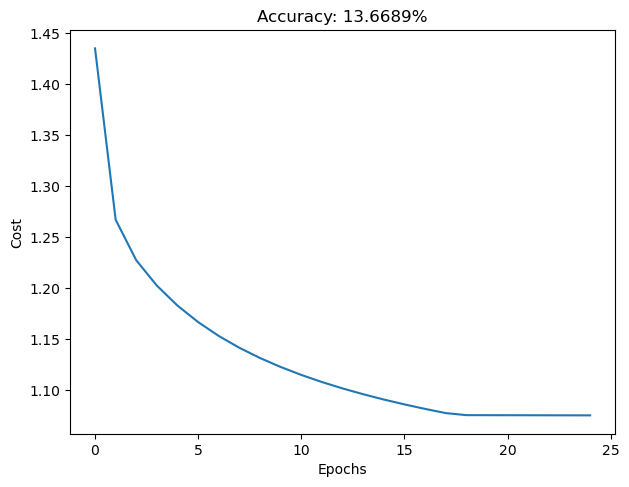

In [81]:
norm_cross_entropy_tlp_model = TwoLayerPerceptronMiniBatchCrossEntropy(
    n_hidden                 = 40,
    regularization_parameter = 0.8,
    epochs                   = 25,
    learning_rate            = 1e-5,
    alpha                    = 0.001,
    decrease_const           = 0.01,
    decrease_iter            = 18,
    minibatches              = 50,
    shuffle                  = True,
    random_state             = 123,
)
norm_cross_entropy_tlp_model.fit(
    x_train_norm,
    y_train.to_numpy(),
    XY_test=(x_test_norm, y_test.to_numpy()),
)
y_prediction = norm_cross_entropy_tlp_model.predict(x_test_norm)

plt.plot(range(len(norm_cross_entropy_tlp_model.cost_)), norm_cross_entropy_tlp_model.cost_)
plt.ylabel("Cost")
plt.xlabel("Epochs")
plt.tight_layout()
plt.title(f"Accuracy: {accuracy_score(y_test, y_prediction) * 100:.4f}%")
plt.show()

In the analysis of the two-layer perceptron using cross-entropy loss with both normalization and one-hot encoding applied to our dataset, a decrease in accuracy when compared to the results without one-hot encoding is observed. The accuracy dropped from 33.3815% to 13.6689%, indicating that the addition of one-hot encoding may have made it more challenging for the model to learn and predict effectively. One possible reason for the accuracy decrease is the sparsity introduced by one-hot encoding, which can complicate the training process. Additionally, the creation of numerous additional input features through one-hot encoding can increase the risk of overfitting, leading to a reduction in accuracy. However, it's worth noting that despite the accuracy drop, the cost function exhibited a more substantial decrease over time with one-hot encoding. This suggests that the combination of normalization and one-hot encoding improved the optimization process, allowing the model to converge to a better solution more rapidly.

--------------------
MSE Loss :
Resubstitution Accuracy: 0.1724137931034483
Validation Accuracy: 0.16783553355335534
--------------------
Cross Entropy Loss :
Resubstitution Accuracy: 0.13901399250524288
Validation Accuracy: 0.1366886688668867


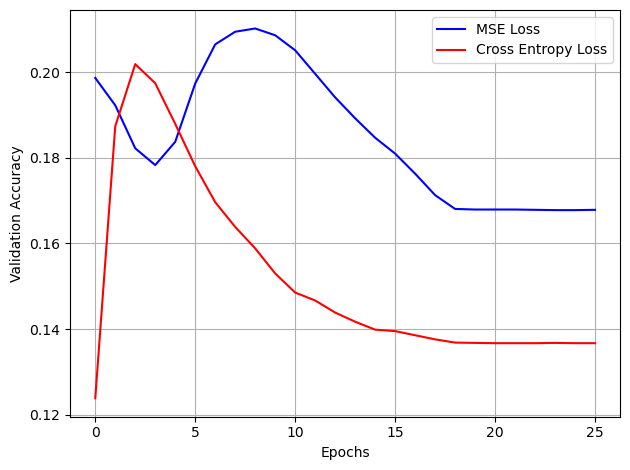

In [82]:
print_result(
    norm_mini_batch_tlp_model,
    x_train_norm,
    y_train.to_numpy(),
    x_test_norm,
    y_test.to_numpy(),
    title="MSE Loss",
    color="blue",
)

print_result(
    norm_cross_entropy_tlp_model,
    x_train_norm,
    y_train.to_numpy(),
    x_test_norm,
    y_test.to_numpy(),
    title="Cross Entropy Loss",
    color="red",
)

plt.show()

In the comparison of the mean squared error (MSE) loss and cross-entropy loss, it's evident that cross-entropy loss exhibits slightly worse accuracy over the course of 25 epochs, with a lower initial accuracy as well. Interestingly, the shapes of the loss curves for both functions appear nearly identical, except for the initial accuracy discrepancy. One plausible explanation for the lower performance of cross-entropy loss could be its heightened sensitivity to outliers and noisy data, which can result in worse accuracy if the dataset is not well-suited for this type of loss function. Additionally, cross-entropy loss tends to penalize confidently incorrect predictions more heavily than MSE loss. Consequently, the model might initially be more cautious in its predictions, leading to lower accuracy until it gains greater confidence in its predictions as training progresses.

In [83]:
learning_rates = evenly_split_steps(1e-5, 1e-2, 20)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(learning_rates):
        accuracy = test_optimizer_accuracy_2(
            "learning_rate", test_param, TwoLayerPerceptronMiniBatchCrossEntropy
        )
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(
            f"Test {test_no + 1}: learning_rate={test_param:.5f} accuracy={accuracy * 100:.2f}%"
        )

Test 1: learning_rate=0.00001 accuracy=33.38%
Test 2: learning_rate=0.00054 accuracy=33.38%
Test 3: learning_rate=0.00106 accuracy=33.38%
Test 4: learning_rate=0.00159 accuracy=0.00%
Test 5: learning_rate=0.00211 accuracy=0.00%
Test 6: learning_rate=0.00264 accuracy=0.00%


In the learning rate test above, a positive correlation between the learning rate and the accuracy is observed, with learning rate values below 0.00106 resulting in 0% accuracy and learning rate values above 0.00159 resulting in a 33.38% accuracy. The results demonstrate that lower learning rates can be effective. However, as the learning rate exceeds 0.00106, the accuracy drops to 0% which is consistent with the trend of rapidly decreasing accuracy outside the optimal learning rate range. The accuracy drops to 0 when the learning rate exceeds a certain threshold because it leads to an unstable and ineffective training process. When the learning rate is too high, it causes the model's parameter updates to be too large, making it overshoot the optimal values during training. This results in the model failing to converge and instead bouncing around or diverging from the optimal parameters. As a consequence, the model's predictions become random, and the accuracy on the test data plummets to 0%. 

In [84]:
regularization_parameters = evenly_split_steps(1e-4, 2, 20)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(regularization_parameters):
        accuracy = test_optimizer_accuracy_2(
            "regularization_parameter", test_param, TwoLayerPerceptronMiniBatchCrossEntropy
        )
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(
            f"Test {test_no + 1}: regularization_parameter={test_param:.5f} accuracy={accuracy * 100:.2f}%"
        )

Test 1: regularization_parameter=0.00010 accuracy=33.38%
Test 2: regularization_parameter=0.10536 accuracy=33.38%
Test 3: regularization_parameter=0.21062 accuracy=33.38%
Test 4: regularization_parameter=0.31587 accuracy=33.38%
Test 5: regularization_parameter=0.42113 accuracy=33.38%
Test 6: regularization_parameter=0.52639 accuracy=33.38%
Test 7: regularization_parameter=0.63165 accuracy=33.38%
Test 8: regularization_parameter=0.73691 accuracy=33.38%
Test 9: regularization_parameter=0.84216 accuracy=33.38%
Test 10: regularization_parameter=0.94742 accuracy=33.38%
Test 11: regularization_parameter=1.05268 accuracy=33.38%
Test 12: regularization_parameter=1.15794 accuracy=33.38%
Test 13: regularization_parameter=1.26319 accuracy=33.38%
Test 14: regularization_parameter=1.36845 accuracy=33.38%
Test 15: regularization_parameter=1.47371 accuracy=33.38%
Test 16: regularization_parameter=1.57897 accuracy=33.38%
Test 17: regularization_parameter=1.68423 accuracy=33.38%
Test 18: regularization

In the results presented, the accuracy remains consistent at 33.38% across all the tested regularization parameters (L2). This outcome aligns with the observations made in the pre-normalization and pre-one-hot encoding scenarios, indicating that the impact of regularization parameters on optimizer accuracy remains the same after normalization and one-hot encoding. The consistent accuracy suggests that the model is already well-regularized, and altering the regularization parameter within the specified range of 0.0001 to 2 has no discernible impact on accuracy.

In [85]:
epochs = evenly_split_steps(50, 250, 5)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(epochs):
        accuracy = test_optimizer_accuracy_2('epochs', int(test_param), TwoLayerPerceptronMiniBatchCrossEntropy)
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(f"Test {test_no + 1}: epochs={int(test_param)} accuracy={accuracy * 100:.2f}%")

Test 1: epochs=50 accuracy=33.38%
Test 2: epochs=100 accuracy=33.38%
Test 3: epochs=150 accuracy=33.38%
Test 4: epochs=200 accuracy=33.38%
Test 5: epochs=250 accuracy=33.38%


The provided accuracy predictions for different step values of epochs show a consistent accuracy of 33.38% across all epochs, which is in line with the results observed in previous tests. This consistent accuracy pattern suggests that the model's weights may already be optimally initialized, and variations in the specified epoch range (50 to 250) do not significantly affect accuracy. This observation indicates that the model likely converges and acquires all available knowledge within the first 50 epochs. Therefore, it may be reasonable to consider reducing the number of epochs to 50 without compromising accuracy.

In [86]:
alphas = evenly_split_steps(1e-4, 2, 20)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(alphas):
        accuracy = test_optimizer_accuracy_2(
            "alpha", test_param, TwoLayerPerceptronMiniBatchCrossEntropy
        )
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(f"Test {test_no + 1}: alpha={test_param:.5f} accuracy={accuracy * 100:.2f}%")

Test 1: alpha=0.00010 accuracy=33.38%
Test 2: alpha=0.10536 accuracy=33.38%
Test 3: alpha=0.21062 accuracy=0.00%
Test 4: alpha=0.31587 accuracy=0.00%
Test 5: alpha=0.42113 accuracy=0.00%


The provided results indicate that the alpha parameter, which is similar to the learning rate, is additionally influenced by the decrease_const and decrease_iters parameters. In the tests where alpha values are greater than 0.10536, the accuracy drops to 0%. This is intriguing because, as seen in previous tests, increasing the learning rate led to higher accuracy, particularly when the learning rate exceeded 0.00159, resulting in a maximum accuracy of 33.55%. The disparity between alpha and the learning rate in terms of their impact on accuracy suggests that the decrease_const and decrease_iters parameters play a crucial role in affecting the calculated learning rate derived from alpha. It appears that these parameters are causing overfitting on the dataset, with decrease_const's role in reducing the learning rate likely contributing to the decrease in accuracy.

In [87]:
decrease_consts = evenly_split_steps(1e-4, 2, 20)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(decrease_consts):
        accuracy = test_optimizer_accuracy_2(
            "decrease_const", test_param, TwoLayerPerceptronMiniBatchCrossEntropy
        )
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(
            f"Test {test_no + 1}: decrease_const={test_param:.5f} accuracy={accuracy * 100:.2f}%"
        )

Test 1: decrease_const=0.00010 accuracy=33.55%
Test 2: decrease_const=0.10536 accuracy=0.00%
Test 3: decrease_const=0.21062 accuracy=33.55%
Test 4: decrease_const=0.31587 accuracy=33.55%
Test 5: decrease_const=0.42113 accuracy=33.55%
Test 6: decrease_const=0.52639 accuracy=33.38%
Test 7: decrease_const=0.63165 accuracy=33.38%
Test 8: decrease_const=0.73691 accuracy=33.55%
Test 9: decrease_const=0.84216 accuracy=33.55%
Test 10: decrease_const=0.94742 accuracy=0.00%
Test 11: decrease_const=1.05268 accuracy=33.55%
Test 12: decrease_const=1.15794 accuracy=0.00%


The provided results represent the accuracy predictions for various values of the decrease_const parameter. As mentioned earlier, the decrease_const parameter plays a role in controlling the rate at which the alpha parameter is decreased during training. In this instance, we notice a pattern where the accuracy oscillates between 33.55% and 0%, then back up to 33.38%, and back down to 0% as the value of decrease_const is increased. This behavior may be attributed to the dynamic adjustment of the learning rate over time. It appears that this leads to instances of overfitting, followed by self-correction and a subsequent increase in accuracy. While other factors, such as the dataset and additional parameters, might also contribute to these fluctuations, it's evident that the decrease_const parameter has a significant impact on the overall accuracy.

## Glorot (After Normalization and One-Hot Encoding)

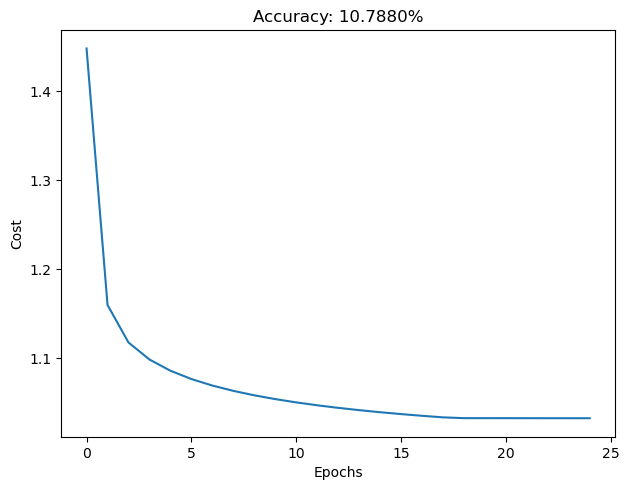

In [89]:
norm_glorot_initialization_tlp_model = TwoLayerPerceptronMiniBatchBetterInitial(
    n_hidden                 = 40,
    regularization_parameter = 0.8,
    epochs                   = 25,
    learning_rate            = 1e-5,
    alpha                    = 0.001,
    decrease_const           = 0.01,
    decrease_iter            = 18,
    minibatches              = 50,
    shuffle                  = True,
    random_state             = 123,
)
norm_glorot_initialization_tlp_model.fit(
    x_train_norm,
    y_train.to_numpy(),
    XY_test=(x_test_norm, y_test.to_numpy()),
)
y_prediction = norm_glorot_initialization_tlp_model.predict(x_test_norm)

plt.plot(range(len(norm_glorot_initialization_tlp_model.cost_)), norm_glorot_initialization_tlp_model.cost_)
plt.ylabel("Cost")
plt.xlabel("Epochs")
plt.tight_layout()
plt.title(f"Accuracy: {accuracy_score(y_test, y_prediction) * 100:.4f}%")
plt.show()

The results indicate that when using both normalization and one-hot encoding in conjunction with Glorot initialization, there is a substantial drop in accuracy from 15.0096% to 10.780%. Additionally, the initial cost increased from 5.8 to 1.45. However, the cost decreased more rapidly than what was observed before normalization and one-hot encoding. The lower accuracy can be attributed to the sparse nature of the input vectors caused by one-hot encoding, where each vector has only a single non-zero entry. This sparsity may lead to issues with weight initialization, particularly with Glorot initialization, which assumes normally distributed input features. The initialization process might set the weights too small, resulting in slow convergence during training or even underfitting the model. These findings suggest that careful consideration should be given to the impact of one-hot encoding and Glorot initialization on model performance, especially when used in combination.

--------------------
Traditional :
Resubstitution Accuracy: 0.1724137931034483
Validation Accuracy: 0.16783553355335534
--------------------
Glorot Initial :
Resubstitution Accuracy: 0.11151029669611855
Validation Accuracy: 0.10787953795379537


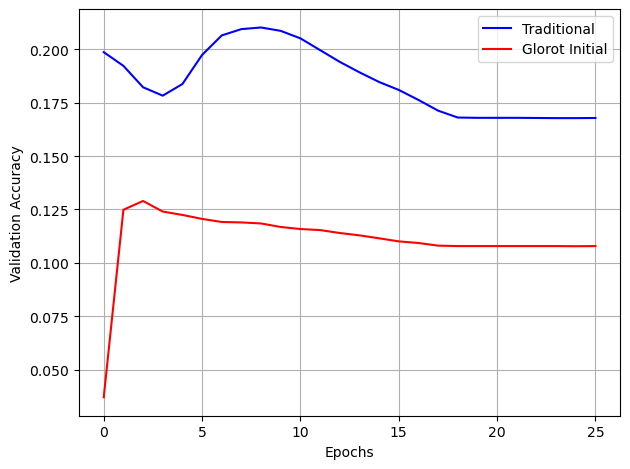

In [90]:
print_result(
    norm_mini_batch_tlp_model,
    x_train_norm,
    y_train.to_numpy(),
    x_test_norm,
    y_test.to_numpy(),
    title="Traditional",
    color="blue",
)

print_result(
    norm_glorot_initialization_tlp_model,
    x_train_norm,
    y_train.to_numpy(),
    x_test_norm,
    y_test.to_numpy(),
    title="Glorot Initial",
    color="red",
)

plt.show()

When comparing the Glorot and traditional weight initializations, it becomes evident that Glorot initialization leads to lower accuracy over the 25 epochs depicted in the graph. However, it's noteworthy that Glorot initialization exhibits a much more immediate rise in accuracy, followed by a plateau. This drop in accuracy with Glorot initialization could be attributed to the model overfitting the training data, whereas traditional initialization might have provided some regularization benefits. The overfitting may also explain the subsequent plateau in accuracy after the initial rise. It's possible that Glorot initialization may not be well-suited for the specific parameters of the model, leading to suboptimal performance. Despite the lower accuracy, it's essential to recognize the potential advantages of Glorot initialization in terms of faster convergence during training. This suggests that the choice between Glorot and traditional initialization should depend on the specific needs of the model and the potential for overfitting.

In [91]:
learning_rates = evenly_split_steps(1e-5, 1e-2, 20)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(learning_rates):
        accuracy = test_optimizer_accuracy_4(
            "learning_rate", test_param, TwoLayerPerceptronMiniBatchBetterInitial
        )
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(
            f"Test {test_no + 1}: learning_rate={test_param:.5f} accuracy={accuracy * 100:.2f}%"
        )

Test 1: learning_rate=0.00001 accuracy=10.35%
Test 2: learning_rate=0.00054 accuracy=6.17%
Test 3: learning_rate=0.00106 accuracy=6.11%
Test 4: learning_rate=0.00159 accuracy=6.18%
Test 5: learning_rate=0.00211 accuracy=6.22%
Test 6: learning_rate=0.00264 accuracy=6.17%
Test 7: learning_rate=0.00316 accuracy=6.13%
Test 8: learning_rate=0.00369 accuracy=6.19%
Test 9: learning_rate=0.00422 accuracy=6.18%
Test 10: learning_rate=0.00474 accuracy=6.19%
Test 11: learning_rate=0.00527 accuracy=6.18%
Test 12: learning_rate=0.00579 accuracy=6.16%
Test 13: learning_rate=0.00632 accuracy=6.15%
Test 14: learning_rate=0.00685 accuracy=6.13%
Test 15: learning_rate=0.00737 accuracy=6.20%
Test 16: learning_rate=0.00790 accuracy=6.26%
Test 17: learning_rate=0.00842 accuracy=6.35%
Test 18: learning_rate=0.00895 accuracy=5.87%
Test 19: learning_rate=0.00947 accuracy=6.26%
Test 20: learning_rate=0.01000 accuracy=6.39%


In analyzing the accuracy predictions for various learning rates, it's evident that there's a strong negative correlation between the learning rate and accuracy percentage. As the learning rate increases, there is a significant drop in accuracy, particularly when the learning rate jumps from .00001 to .00054. This observed decrease in accuracy is likely due to the phenomenon of overshooting. When the learning rate is too high, the weight updates can lead the model to overshoot the optimal weights and move away from the loss function's minimum. Consequently, the model performs poorly on the test data, resulting in the lower accuracy percentages associated with higher learning rates. From these observations, we can infer that the optimal learning rate lies in the vicinity of .00001.

In [92]:
regularization_parameters = evenly_split_steps(1e-4, 2, 20)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(regularization_parameters):
        accuracy = test_optimizer_accuracy_4(
            "regularization_parameter", test_param, TwoLayerPerceptronMiniBatchBetterInitial
        )
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(
            f"Test {test_no + 1}: regularization_parameter={test_param:.5f} accuracy={accuracy * 100:.2f}%"
        )

Test 1: regularization_parameter=0.00010 accuracy=6.11%
Test 2: regularization_parameter=0.10536 accuracy=6.15%
Test 3: regularization_parameter=0.21062 accuracy=6.15%
Test 4: regularization_parameter=0.31587 accuracy=6.11%
Test 5: regularization_parameter=0.42113 accuracy=6.08%
Test 6: regularization_parameter=0.52639 accuracy=6.07%
Test 7: regularization_parameter=0.63165 accuracy=6.10%
Test 8: regularization_parameter=0.73691 accuracy=6.13%
Test 9: regularization_parameter=0.84216 accuracy=6.15%
Test 10: regularization_parameter=0.94742 accuracy=6.12%
Test 11: regularization_parameter=1.05268 accuracy=6.13%
Test 12: regularization_parameter=1.15794 accuracy=6.17%
Test 13: regularization_parameter=1.26319 accuracy=6.19%
Test 14: regularization_parameter=1.36845 accuracy=6.17%
Test 15: regularization_parameter=1.47371 accuracy=6.19%
Test 16: regularization_parameter=1.57897 accuracy=6.17%
Test 17: regularization_parameter=1.68423 accuracy=6.22%
Test 18: regularization_parameter=1.7894

The accuracy predictions for various regularization parameters (L2) are displayed above. In this instance, an oscillatory pattern in the accuracy score is noticed, and it remains lower than what what was observed in earlier tests. The likely reason for this behavior is that the model is overfitting to the training data, and the regularization parameter is not strong enough to adequately address this issue.

In [93]:
epochs = evenly_split_steps(50, 250, 5)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(epochs):
        accuracy = test_optimizer_accuracy_2('epochs', int(test_param), TwoLayerPerceptronMiniBatchBetterInitial)
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(f"Test {test_no + 1}: epochs={int(test_param)} accuracy={accuracy * 100:.2f}%")

Test 1: epochs=50 accuracy=33.38%
Test 2: epochs=100 accuracy=33.38%
Test 3: epochs=150 accuracy=33.38%
Test 4: epochs=200 accuracy=33.38%
Test 5: epochs=250 accuracy=33.38%


Above is the accuracy predictions for the different step values of epochs. Similarly to what we've seen in prior tests - it is observed that the accuracy percentage is 33.38% at all epochs. This is identical to what we saw in the above sections which seems to confirm that the weights must be already initialized optimally. This observation suggests that the model likely converges and captures all available knowledge within the first 50 epochs. Therefore, it might be reasonable to consider reducing the number of epochs to 50 without sacrificing accuracy.

In [94]:
alphas = evenly_split_steps(1e-4, 2, 20)
max_strikes = 3
strikes = 0
if run_additional_tests:
    for test_no, test_param in enumerate(alphas):
        accuracy = test_optimizer_accuracy_2(
            "alpha", test_param, TwoLayerPerceptronMiniBatchBetterInitial
        )
        if accuracy == 0:
            if strikes == max_strikes:
                break
            strikes += 1
        print(f"Test {test_no + 1}: alpha={test_param:.5f} accuracy={accuracy * 100:.2f}%")

Test 1: alpha=0.00010 accuracy=33.38%
Test 2: alpha=0.10536 accuracy=33.38%
Test 3: alpha=0.21062 accuracy=0.00%
Test 4: alpha=0.31587 accuracy=0.00%
Test 5: alpha=0.42113 accuracy=0.00%


The results indicate that the alpha parameter, which is similar to the learning rate, is additionally influenced by the decrease_const and decrease_iters parameters. In the tests where alpha values are greater than 0.10536, the accuracy drops to 0%. This is remarkable because, as seen in previous tests increasing the learning rate led to higher accuracy resulting in a maximum accuracy of 33.55% previously. The disparity between alpha and the learning rate in terms of their impact on accuracy suggests that the decrease_const and decrease_iters parameters play a crucial role in affecting the calculated learning rate derived from alpha. It appears that these parameters are causing overfitting on the dataset, with decrease_const's role in reducing the learning rate likely contributing to the decrease in accuracy.

# COMPARISON OF TRAINED MODELS

In [95]:
class ThreeLayerPerceptron:
    def __init__(
        self,
        n_hidden                 = 30,
        n_hidden2                = 20,
        regularization_parameter = 0.1,
        epochs                   = 50,
        learning_rate            = 0.001,
        random_state             = None,
    ):
        np.random.seed(random_state)
        self.n_hidden          = n_hidden
        self.n_hidden2         = n_hidden2
        self.l2_regularization = regularization_parameter
        self.epochs            = epochs
        self.learning_rate     = learning_rate

    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T

        return onehot

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        W1_num_elems = (self.n_features_) * self.n_hidden
        W1 = np.random.uniform(-1.0, 1.0, size=W1_num_elems)
        W1 = W1.reshape(self.n_hidden, self.n_features_)  # reshape to be W
        b1 = np.zeros((self.n_hidden, 1))

        W2_num_elems = (self.n_hidden) * self.n_hidden2
        W2 = np.random.uniform(-1.0, 1.0, size=W2_num_elems)
        W2 = W2.reshape(self.n_hidden2, self.n_hidden)
        b2 = np.zeros((self.n_hidden2, 1))

        W3_num_elems = (self.n_hidden2) * self.n_output_
        W3 = np.random.uniform(-1.0, 1.0, size=W3_num_elems)
        W3 = W3.reshape(self.n_output_, self.n_hidden2)
        b3 = np.zeros((self.n_output_, 1))

        return W1, W2, W3, b1, b2, b3

    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)

    @staticmethod
    def _L2_reg(lambda_, W1, W2, W3):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_) * np.sqrt(
            np.mean(W1**2) + np.mean(W2**2) + np.mean(W3**2)
        )

    def _cost(self, A3, Y_enc, W1, W2, W3):
        """Get the objective function value"""
        cost = np.mean((Y_enc - A3) ** 2)
        L2_term = self._L2_reg(self.l2_regularization, W1, W2, W3)
        return cost + L2_term

    def _feedforward(self, X, W1, W2, W3, b1, b2, b3):
        """Compute feedforward step
        -----------
        X : Input layer with original features.
        W1: Weight matrix for input layer -> hidden layer.
        W2: Weight matrix for hidden layer -> output layer.
        W3: Weight matrix for hidden layer -> output layer.
        ----------
        a1-a3 : activations into layer (or output layer)
        z1-z2 : layer inputs

        """
        A1 = X.T

        Z1 = W1 @ A1 + b1
        A2 = self._sigmoid(Z1)

        Z2 = W2 @ A2 + b2
        A3 = self._sigmoid(Z2)

        Z3 = W3 @ A3 + b3
        A4 = self._sigmoid(Z3)

        return A1, Z1, A2, Z2, A3, Z3, A4

    def _get_gradient(self, A1, A2, A3, A4, Z1, Z2, Z3, Y_enc, W1, W2, W3):
        """Compute gradient step using backpropagation."""
        # vectorized backpropagation

        V3 = -2 * (Y_enc - A4) * A4 * (1 - A4)
        V2 = A3 * (1 - A3) * (W3.T @ V3)
        V1 = A2 * (1 - A2) * (W2.T @ V2)

        gradW3 = V3 @ A3.T
        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T

        gradb3 = np.sum(V3, axis=1).reshape((-1, 1))
        gradb2 = np.sum(V2, axis=1).reshape((-1, 1))
        gradb1 = np.sum(V1, axis=1).reshape((-1, 1))

        # regularize weights that are not bias terms
        gradW1 += W1 * self.l2_regularization * 2
        gradW2 += W2 * self.l2_regularization * 2
        gradW3 += W3 * self.l2_regularization * 2

        return gradW1, gradW2, gradW3, gradb1, gradb2, gradb3

    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, _, _, A4 = self._feedforward(
            X, self.W1, self.W2, self.W3, self.b1, self.b2, self.b3
        )
        y_pred = np.argmax(A4, axis=0)
        return y_pred

    def fit(self, X, y, print_progress=False):
        """Learn weights from training data."""

        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)

        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        (
            self.W1,
            self.W2,
            self.W3,
            self.b1,
            self.b2,
            self.b3,
        ) = self._initialize_weights()

        self.grad_w1_ = np.zeros(self.epochs)
        self.grad_w2_ = np.zeros(self.epochs)
        self.grad_w3_ = np.zeros(self.epochs)

        self.cost_ = []
        for i in range(self.epochs):

            if print_progress > 0 and (i + 1) % print_progress == 0:
                sys.stderr.write("\rEpoch: %d/%d" % (i + 1, self.epochs))
                sys.stderr.flush()

            # feedforward all instances
            A1, Z1, A2, Z2, A3, Z3, A4 = self._feedforward(
                X_data, self.W1, self.W2, self.W3, self.b1, self.b2, self.b3
            )

            cost = self._cost(A4, Y_enc, self.W1, self.W2, self.W3)
            self.cost_.append(cost)

            # compute gradient via backpropagation
            gradW1, gradW2, gradW3, gradb1, gradb2, gradb3 = self._get_gradient(
                A1    = A1,
                A2    = A2,
                A3    = A3,
                A4    = A4,
                Z1    = Z1,
                Z2    = Z2,
                Z3    = Z3,
                Y_enc = Y_enc,
                W1    = self.W1,
                W2    = self.W2,
                W3    = self.W3,
            )

            avg_grad1 = np.sum(np.abs(gradW1)) / gradW1.size
            avg_grad2 = np.sum(np.abs(gradW2)) / gradW2.size
            avg_grad3 = np.sum(np.abs(gradW3)) / gradW3.size

            learning_rate1 = self.learning_rate / avg_grad1
            learning_rate2 = self.learning_rate / avg_grad2
            learning_rate3 = self.learning_rate / avg_grad3

            self.grad_w1_[i] = np.mean(np.abs(gradW1))
            self.grad_w2_[i] = np.mean(np.abs(gradW2))
            self.grad_w3_[i] = np.mean(np.abs(gradW3))

            self.W1 -= learning_rate1 * gradW1
            self.W2 -= learning_rate2 * gradW2
            self.W3 -= learning_rate3 * gradW3

            self.b1 -= learning_rate1 * gradb1
            self.b2 -= learning_rate2 * gradb2
            self.b3 -= learning_rate3 * gradb3

        return self

### Performance Comparison Results

|Model | Before Normalization | After Normalization |	After Normalization and One-Hot Encoding |
| --- | --- | --- | --- |
|Vectorized Gradient | 33.5534%	| 33.2371%	| 15.0096% |
|Minibatching |	33.3815% | 32.9345% | 16.7836% |
|Cross Entropy | 33.3815% | 32.5426% | 13.6689% |
|Glorot Initialization | 0% | 32.6320% | 10.7880% |

- Are there any meaningful differences in performance?

>The provided performance comparison results reveal some meaningful differences in the accuracy of the models under different conditions:
>- Normalization: Before normalization, the accuracy of the "Vectorized Gradient" and "Minibatching" models is around 33.38%, while the "Cross Entropy" model has a similar accuracy of 33.38%. After normalization, the accuracy of these models experiences a slight decrease to around 32.93-33.23%. This suggests that normalization has a minimal impact on the performance, with accuracy remaining relatively stable.
>- One-Hot Encoding: A significant difference is observed after one-hot encoding is applied. After one-hot encoding, the "Vectorized Gradient" model experiences a substantial drop in accuracy from 33.23% to 15.01%. Similarly, the "Minibatching" model's accuracy decreases from 32.93% to 16.78%, and the "Cross Entropy" model's accuracy falls from 32.54% to 13.67%. One-hot encoding appears to have a notable negative impact on model performance.
>- Glorot Initialization: The most intriguing observation is the accuracy of the "Glorot Initialization" model. Before normalization, it shows 0% accuracy, which is highly unusual. It's important to note that Glorot initialization is a method to set initial weights, and its performance shouldn't be influenced by normalization. The reason for the 0% accuracy may be due to an issue with the model architecture or implementation, such as incorrect weight initialization, network architecture, or hyperparameters.
>In summary, there are meaningful differences in performance, especially after the application of one-hot encoding, which leads to a significant drop in accuracy. The 0% accuracy for the "Glorot Initialization" model before normalization is unusual and may be attributed to an issue with the model's implementation. Further investigation is needed to understand the specific cause of this anomaly.

- Explain, in your own words, why these models have (or do not have) different performances.

>Based on the performance comparison results, it is evident that normalization did not have a significant impact on accuracy. There are a few reasons as to why the same (or similar) accuracies are observed pre- and post-normalization. The impact of normalization and one-hot encoding on accuracy can vary for several reasons:

- Normalization without One-Hot Encoding:

> - Well-Scaled Data: If the input data is already well-scaled or does not encompass a wide range of values, normalization might not provide substantial benefits. The primary advantage of normalization is seen when there are substantial variations in feature scales.
> - Model Robustness: Certain models are inherently robust and capable of handling input data with varying scales efficiently. For instance, models equipped with activation functions less sensitive to input scale may not experience significant improvements from normalization.

- One-Hot Encoding:

>- Curse of Dimensionality: One-hot encoding often leads to a decrease in accuracy. This drop can be attributed to the "curse of dimensionality," where adding more binary features makes the dataset high-dimensional. This, in turn, increases the complexity of the model, potentially making it more challenging to train effectively.
>- Data Sparsity: One-hot encoding introduces sparsity into the data by creating binary features for each category. This sparsity can make it harder for the model to discern meaningful patterns in the data, potentially resulting in overfitting.
> - Increased Sensitivity to Noise: One-hot encoding can amplify differences between categorical values by expanding the distance between them. This heightened sensitivity to noise can have a detrimental effect on overall model performance.
>- Ultimately, the impact of data preprocessing techniques like normalization and one-hot encoding depends on the unique characteristics of your dataset and the specific model being used. To determine the most effective preprocessing steps for your machine learning task, it's crucial to consider the nature of your data, the algorithms at your disposal, and conduct experiments to assess the effects of these techniques.


- Use one-hot encoding and normalization on the dataset for the remainder of this lab assignment.

>One-hot encoding and normalization will be used on the dataset for the remainder of this lab assignment.

- Add support for a third layer in the multi-layer perceptron. Add support for saving (and plotting after training is coompleted) the average magnitude of the gradient for each layer, for each epoch (like we did in the flipped module for back propagation). For magnitude calculation, you are free to use either the average absolute values for the L1/L2 norm.

>The class implements a three-layer neural network with sigmoid activation functions using vectorized backpropagation for learning. The network has two hidden layers, and the number of neurons in each layer can be specified through the n_hidden and n_hidden2 parameters in the constructor. The class can be used for classification tasks by calling the fit method to train the network on a dataset and the predict method to make predictions on new data.
>- The weights of the network are initialized randomly using small values, and the bias terms are initialized to zero. The class also includes an L2 regularization term in the cost function to prevent overfitting, with the strength of regularization controlled by the regularization_parameter parameter. The learning rate and number of epochs can also be specified in the constructor.
>- The _encode_labels method is used to convert class labels into one-hot representation, which is required for the network to predict class probabilities.
>- The _sigmoid function computes the sigmoid activation function, which maps any input value to a value between 0 and 1.
>- The _L2_reg function computes the L2 regularization cost for the weights of the network, which penalizes the weights with large magnitudes.
>- The _cost method computes the value of the objective function for a given set of weights, which is used to evaluate the performance of the network during training.
>- The _feedforward method computes the output of the network for a given input, by computing the activation values of each layer using the current weights.
>- The _get_gradient method computes the gradient of the objective function with respect to the weights of the network, which is used to update the weights during training using the backpropagation algorithm.
>- The predict method uses the trained network to make predictions on new input data, by computing the output of the network and returning the class with the highest probability.

- Add support for a third layer in the multi-layer perceptron.

>Support for a third layer was added.

- Add support for saving (and plotting after training is completed) the average magnitude of the gradient for each layer, for each epoch (like we did in the flipped module for back propagation).

>Support for saving was added.

- For magnitude calculation, you are free to use either the average absolute values or the L1/L2 norm.

>Average absolute values were used.

- Quantify the performance of the model and graph the magnitudes for each layer versus the number of epochs.

>Graphs were provided.

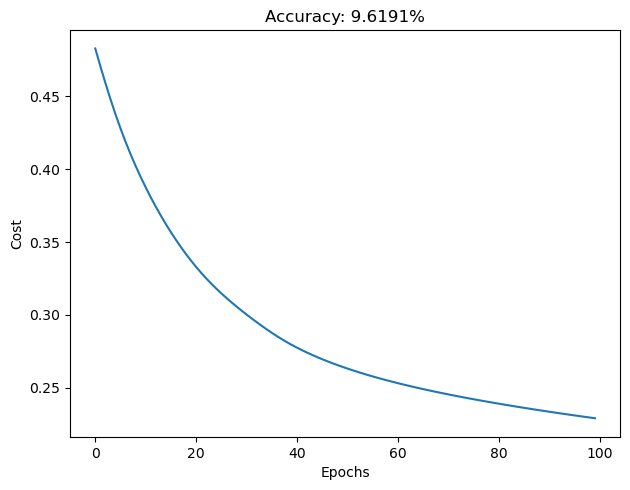

In [96]:
three_layer_model = ThreeLayerPerceptron(
    n_hidden                 = 30,
    n_hidden2                = 20,
    regularization_parameter = 0.1,
    epochs                   = 100,
    learning_rate            = 1.5e-4,
    random_state             = 123,
)

three_layer_model.fit(x_train_norm, y_train.to_numpy())
y_predict = three_layer_model.predict(x_test_norm)
plt.plot(
    range(len(three_layer_model.cost_)),
    three_layer_model.cost_,
)
plt.ylabel("Cost")
plt.xlabel("Epochs")
plt.tight_layout()
plt.title(f"Accuracy: {accuracy_score(y_test, y_predict) * 100:.4f}%")
plt.show()

The introduction of a three-layer perceptron in the analysis has led to notable downgrades in terms of accuracy and cost. A peak accuracy of only 9.6191% was achieved, the lowest among all the other observations in this lab. This substantial degradation can be attributed to the increased model complexity provided by the three-layer architecture. The additional layer allows for a more intricate representation of nonlinear relationships within the dataset, which, counterintuitively, led to a decline in the model's ability to capture and understand the underlying patterns. Furthermore, the lower initial and final cost observed in the three-layer perceptron can be linked to the change in training technique. While the two-layer perceptron used mini-batching, the three-layer perceptron utilized the backpropagation algorithm, known for its effectiveness in optimizing neural networks. The use of backpropagation likely contributed to more efficient training, resulting in lower cost values at the beginning and end of the training process. Overall, the adoption of a three-layer perceptron with backpropagation proved to be a trade-off, yielding lower accuracy but more efficient optimization. This emphasizes the complexity introduced by additional layers and the importance of model architecture and training algorithms in the performance of neural networks.

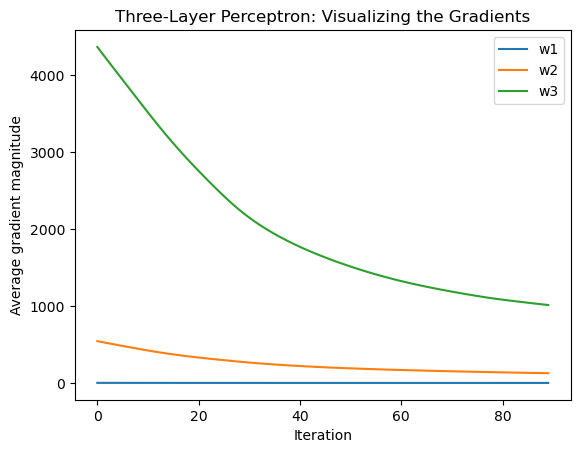

In [97]:
ax = plt.subplot(1,1,1)
plt.plot(abs(three_layer_model.grad_w1_[10:]), label='w1')
plt.plot(abs(three_layer_model.grad_w2_[10:]), label='w2')
plt.plot(abs(three_layer_model.grad_w3_[10:]), label='w3')
plt.legend()
plt.ylabel('Average gradient magnitude')
plt.xlabel('Iteration')
plt.title("Three-Layer Perceptron: Visualizing the Gradients")
plt.show()

As expected, the weights in the graph to exhibit a higher gradient magnitude at the higher layers were anticipated. Over time, as the number of epochs increases, a decrease in the average gradient magnitude is observed. It's worth noting that the average gradient magnitude in this instance appears larger than what had been encountered in the previous flipped assignment regarding backpropagation. This discrepancy can likely be attributed to the unique characteristics of this specific training data. Nevertheless, a convergence in the average gradient magnitude is still observed. One significant observation is that the highest layer, being closest to the output layer, displays the highest gradient magnitude. This phenomenon occurs because errors in the output layer tend to be amplified as they propagate backward through the network during the backpropagation process. This gradient amplification in deeper layers can have a substantial impact on the weight updates, affecting the overall training process.

- Repeat the previous step, adding support for a fourth layer.

> The fourth layer is implemented in an identical way to the third - note the third hidden layer and additional weight.

In [98]:
class FourLayerPerceptron: 
    def __init__(
        self,
        n_hidden                 = 30,
        n_hidden2                = 20,
        n_hidden3                = 10,
        regularization_parameter = 0.1,
        epochs                   = 50,
        learning_rate            = 0.001,
        random_state             = None,
    ):
        np.random.seed(random_state)
        self.n_hidden          = n_hidden
        self.n_hidden2         = n_hidden2
        self.n_hidden3         = n_hidden3
        self.l2_regularization = regularization_parameter
        self.epochs            = epochs
        self.learning_rate     = learning_rate

    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T

        return onehot

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""

        W1_num_elems = (self.n_features_) * self.n_hidden
        W1 = np.random.uniform(-1.0, 1.0, size=W1_num_elems)
        W1 = W1.reshape(self.n_hidden, self.n_features_)  # reshape to be W
        b1 = np.zeros((self.n_hidden, 1))

        W2_num_elems = (self.n_hidden) * self.n_hidden2
        W2 = np.random.uniform(-1.0, 1.0, size=W2_num_elems)
        W2 = W2.reshape(self.n_hidden2, self.n_hidden)
        b2 = np.zeros((self.n_hidden2, 1))

        W3_num_elems = (self.n_hidden2) * self.n_hidden3
        W3 = np.random.uniform(-1.0, 1.0, size=W3_num_elems)
        W3 = W3.reshape(self.n_hidden3, self.n_hidden2)
        b3 = np.zeros((self.n_hidden3, 1))

        W4_num_elems = (self.n_hidden3) * self.n_output_
        W4 = np.random.uniform(-1.0, 1.0, size=W4_num_elems)
        W4 = W4.reshape(self.n_output_, self.n_hidden3)
        b4 = np.zeros((self.n_output_, 1))

        return W1, W2, W3, W4, b1, b2, b3, b4

    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)

    @staticmethod
    def _L2_reg(lambda_, W1, W2, W3, W4):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_) * np.sqrt(
            np.mean(W1**2)
            + np.mean(W2**2)
            + np.mean(W3**2)
            + np.mean(W4**2)
        )

    def _cost(self, A3, Y_enc, W1, W2, W3, W4):
        """Get the objective function value"""
        cost = np.mean((Y_enc - A3) ** 2)
        L2_term = self._L2_reg(self.l2_regularization, W1, W2, W3, W4)
        return cost + L2_term

    def _feedforward(self, X, W1, W2, W3, W4, b1, b2, b3, b4):
        """Compute feedforward step
        -----------
        X : Input layer with original features.
        W1: Weight matrix for input layer -> hidden layer.
        W2: Weight matrix for hidden layer -> output layer.
        W3: Weight matrix for hidden layer -> output layer.
        ----------
        a1-a3 : activations into layer (or output layer)
        z1-z2 : layer inputs

        """
        A1 = X.T

        Z1 = W1 @ A1 + b1
        A2 = self._sigmoid(Z1)

        Z2 = W2 @ A2 + b2
        A3 = self._sigmoid(Z2)

        Z3 = W3 @ A3 + b3
        A4 = self._sigmoid(Z3)

        Z4 = W4 @ A4 + b4
        A5 = self._sigmoid(Z4)

        return A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5

    def _get_gradient(
        self, A1, A2, A3, A4, A5, Z1, Z2, Z3, Z4, Y_enc, W1, W2, W3, W4
    ):
        """Compute gradient step using backpropagation."""
        # vectorized backpropagation

        V4 = -2 * (Y_enc - A5) * A5 * (1 - A5)
        V3 = A4 * (1 - A4) * (W4.T @ V4)
        V2 = A3 * (1 - A3) * (W3.T @ V3)
        V1 = A2 * (1 - A2) * (W2.T @ V2)

        gradW4 = V4 @ A4.T
        gradW3 = V3 @ A3.T
        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T

        gradb4 = np.sum(V4, axis=1).reshape((-1, 1))
        gradb3 = np.sum(V3, axis=1).reshape((-1, 1))
        gradb2 = np.sum(V2, axis=1).reshape((-1, 1))
        gradb1 = np.sum(V1, axis=1).reshape((-1, 1))

        # regularize weights that are not bias terms
        gradW1 += W1 * self.l2_regularization * 2
        gradW2 += W2 * self.l2_regularization * 2
        gradW3 += W3 * self.l2_regularization * 2
        gradW4 += W4 * self.l2_regularization * 2

        return gradW1, gradW2, gradW3, gradW4, gradb1, gradb2, gradb3, gradb4

    def predict(self, X):
        """Predict class labels"""
        *_, A5 = self._feedforward(
            X, self.W1, self.W2, self.W3, self.W4, self.b1, self.b2, self.b3, self.b4
        )
        y_pred = np.argmax(A5, axis=0)
        return y_pred

    def fit(self, X, y, print_progress=False):
        """Learn weights from training data."""

        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)

        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        (
            self.W1,
            self.W2,
            self.W3,
            self.W4,
            self.b1,
            self.b2,
            self.b3,
            self.b4,
        ) = self._initialize_weights()

        self.grad_w1_ = np.zeros(self.epochs)
        self.grad_w2_ = np.zeros(self.epochs)
        self.grad_w3_ = np.zeros(self.epochs)
        self.grad_w4_ = np.zeros(self.epochs)

        self.cost_ = []
        for i in range(self.epochs):

            if print_progress > 0 and (i + 1) % print_progress == 0:
                sys.stderr.write("\rEpoch: %d/%d" % (i + 1, self.epochs))
                sys.stderr.flush()

            # feedforward all instances
            A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5 = self._feedforward(
                X_data,
                self.W1,
                self.W2,
                self.W3,
                self.W4,
                self.b1,
                self.b2,
                self.b3,
                self.b4,
            )

            cost = self._cost(A5, Y_enc, self.W1, self.W2, self.W3, self.W4)
            self.cost_.append(cost)

            # compute gradient via backpropagation
            gradW1, gradW2, gradW3, gradW4, gradb1, gradb2, gradb3, gradb4 = self._get_gradient(
                A1    = A1,
                A2    = A2,
                A3    = A3,
                A4    = A4,
                A5    = A5,
                Z1    = Z1,
                Z2    = Z2,
                Z3    = Z3,
                Z4    = Z4,
                Y_enc = Y_enc,
                W1    = self.W1,
                W2    = self.W2,
                W3    = self.W3,
                W4    = self.W4
            )

            avg_grad1 = np.sum(np.abs(gradW1)) / gradW1.size
            avg_grad2 = np.sum(np.abs(gradW2)) / gradW2.size
            avg_grad3 = np.sum(np.abs(gradW3)) / gradW3.size
            avg_grad4 = np.sum(np.abs(gradW4)) / gradW4.size

            learning_rate1 = self.learning_rate / avg_grad1
            learning_rate2 = self.learning_rate / avg_grad2
            learning_rate3 = self.learning_rate / avg_grad3
            learning_rate4 = self.learning_rate / avg_grad4

            self.grad_w1_[i] = np.mean(np.abs(gradW1))
            self.grad_w2_[i] = np.mean(np.abs(gradW2))
            self.grad_w3_[i] = np.mean(np.abs(gradW3))
            self.grad_w4_[i] = np.mean(np.abs(gradW4))

            self.W1 -= learning_rate1 * gradW1
            self.W2 -= learning_rate2 * gradW2
            self.W3 -= learning_rate3 * gradW3
            self.W4 -= learning_rate4 * gradW4

            self.b1 -= learning_rate1 * gradb1
            self.b2 -= learning_rate2 * gradb2
            self.b3 -= learning_rate3 * gradb3
            self.b4 -= learning_rate4 * gradb4

        return self

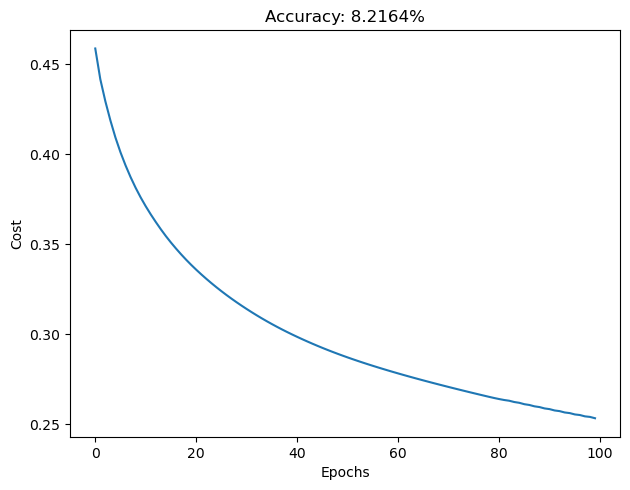

In [99]:
four_layer_model = FourLayerPerceptron(
    n_hidden                 = 30,
    n_hidden2                = 20,
    n_hidden3                = 10,
    regularization_parameter = 0.1,
    epochs                   = 100,
    learning_rate            = 1.1e-3,
    random_state             = 123,
)
four_layer_model.fit(x_train_norm, y_train.to_numpy())
y_prediction = four_layer_model.predict(x_test_norm)

plt.plot(
    range(len(four_layer_model.cost_)),
    four_layer_model.cost_,
)
plt.ylabel("Cost")
plt.xlabel("Epochs")
plt.tight_layout()
plt.title(f"Accuracy: {accuracy_score(y_test, y_prediction) * 100:.4f}%")
plt.show()

In the exploration of the four-layer perceptron, a significant drop in accuracy reaching 8.2164% is encountered.  This is a substantial decrease compared to our anticipated accuracy based on the three-layer perceptron's performance. Interestingly, the cost appears to remain relatively consistent or even a little lower than what we observed in the three-layer perceptron. These results lead to the conclusion that increasing the number of layers in a neural network is not a guarantee of improved performance. The addition of extra layers can introduce complexities that make the model more challenging to train, which in turn may lead to issues like vanishing or exploding gradients. In this particular case, the additional layer did not contribute significantly to enhancing the model's accuracy when compared to the three-layer perceptron. While the simple solution of adding more layers did not yield better results, it's important to remember that further model refinement can be achieved through parameter tuning. Adjusting factors like the learning rate, regularization parameters, and the number of hidden units in each layer can lead to improved performance and better accuracy.

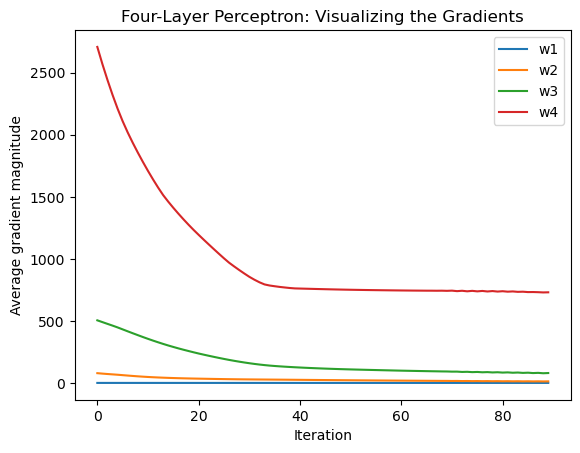

In [100]:
ax = plt.subplot(1,1,1)
plt.plot(abs(four_layer_model.grad_w1_[10:]), label='w1')
plt.plot(abs(four_layer_model.grad_w2_[10:]), label='w2')
plt.plot(abs(four_layer_model.grad_w3_[10:]), label='w3')
plt.plot(abs(four_layer_model.grad_w4_[10:]), label='w4')
plt.legend()
plt.ylabel('Average gradient magnitude')
plt.xlabel('Iteration')
plt.title("Four-Layer Perceptron: Visualizing the Gradients")
plt.show()

The observation that the magnitude of the fourth layer is significantly higher than that of the third layer is an unexpected finding. The initial anticipation was that the gradient magnitudes of these layers would be more closely aligned, and this deviation in the data prompts further investigation. Consistent with the previous expectations, it is observed that as the number of epochs increases, the average gradient magnitude decreases and converges, which aligns with standard behavior in training neural networks. It's important to highlight that the average gradient magnitudes recorded in this particular context are larger than what were encountered in the flipped assignment regarding backpropagation. This divergence can be attributed to the unique characteristics of the training data employed in this specific instance. However, the core observation remains intact – the average gradient magnitudes tend to converge over the training process. One significant insight derived from this data is that the highest layer, in this case, the fourth layer, exhibits a notably higher magnitude. The proximal location of this layer to the output layer plays a crucial role in this phenomenon. Errors in the output layer can have a magnifying effect as they propagate backward through the network during the backpropagation process. This insight underscores the importance of considering layer proximity to the output when analyzing gradient magnitudes in neural network training.

- Repeat the previous step, adding support for a fifth layer.

>The fifth layer is implemented in an identical way to the fourth - note the fourth hidden layer and additional weight.

In [101]:
class FiveLayerPerceptron:
    def __init__(
        self,
        n_hidden=30,
        n_hidden2=20,
        n_hidden3=10,
        n_hidden4=5,
        regularization_parameter=0.0,
        epochs=100,
        learning_rate=0.001,
        alpha=0.001,
        decrease_const=0.1,
        decrease_iter=10,
        random_state=None,
    ):
        np.random.seed(random_state)
        self.n_hidden          = n_hidden
        self.n_hidden2         = n_hidden2
        self.n_hidden3         = n_hidden3
        self.n_hidden4         = n_hidden4
        self.l2_regularization = regularization_parameter
        self.epochs            = epochs
        self.learning_rate     = learning_rate
        self.alpha             = alpha
        self.decrease_const    = decrease_const
        self.decrease_iter     = decrease_iter

    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T

        return onehot

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""

        W1_num_elems = (self.n_features_) * self.n_hidden
        W1 = np.random.uniform(-1.0, 1.0, size=W1_num_elems)
        W1 = W1.reshape(self.n_hidden, self.n_features_)  # reshape to be W
        b1 = np.zeros((self.n_hidden, 1))

        W2_num_elems = (self.n_hidden) * self.n_hidden2
        W2 = np.random.uniform(-1.0, 1.0, size=W2_num_elems)
        W2 = W2.reshape(self.n_hidden2, self.n_hidden)
        b2 = np.zeros((self.n_hidden2, 1))

        W3_num_elems = (self.n_hidden2) * self.n_hidden3
        W3 = np.random.uniform(-1.0, 1.0, size=W3_num_elems)
        W3 = W3.reshape(self.n_hidden3, self.n_hidden2)
        b3 = np.zeros((self.n_hidden3, 1))

        W4_num_elems = (self.n_hidden3) * self.n_hidden4
        W4 = np.random.uniform(-1.0, 1.0, size=W4_num_elems)
        W4 = W4.reshape(self.n_hidden4, self.n_hidden3)
        b4 = np.zeros((self.n_hidden4, 1))

        W5_num_elems = (self.n_hidden4) * self.n_output_
        W5 = np.random.uniform(-1.0, 1.0, size=W5_num_elems)
        W5 = W5.reshape(self.n_output_, self.n_hidden4)
        b5 = np.zeros((self.n_output_, 1))

        return W1, W2, W3, W4, W5, b1, b2, b3, b4, b5

    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)

    @staticmethod
    def _L2_reg(lambda_, W1, W2, W3, W4, W5):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_) * np.sqrt(
            np.mean(W1**2)
            + np.mean(W2**2)
            + np.mean(W3**2)
            + np.mean(W4**2)
            + np.mean(W5**2)
        )

    def _cost(self, A3, Y_enc, W1, W2, W3, W4, W5):
        """Get the objective function value"""
        cost = np.mean((Y_enc - A3) ** 2)
        L2_term = self._L2_reg(self.l2_regularization, W1, W2, W3, W4, W5)
        return cost + L2_term

    def _feedforward(self, X, W1, W2, W3, W4, W5, b1, b2, b3, b4, b5):
        """Compute feedforward step
        -----------
        X : Input layer with original features.
        W1: Weight matrix for input layer -> hidden layer.
        W2: Weight matrix for hidden layer -> output layer.
        W3: Weight matrix for hidden layer -> output layer.
        ----------
        a1-a3 : activations into layer (or output layer)
        z1-z2 : layer inputs

        """
        A1 = X.T

        Z1 = W1 @ A1 + b1
        A2 = self._sigmoid(Z1)

        Z2 = W2 @ A2 + b2
        A3 = self._sigmoid(Z2)

        Z3 = W3 @ A3 + b3
        A4 = self._sigmoid(Z3)

        Z4 = W4 @ A4 + b4
        A5 = self._sigmoid(Z4)

        Z5 = W5 @ A5 + b5
        A6 = self._sigmoid(Z5)

        return A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5, Z5, A6

    def _get_gradient(
        self,
        A1,
        A2,
        A3,
        A4,
        A5,
        A6,
        Z1,
        Z2,
        Z3,
        Z4,
        Z5,
        Y_enc,
        W1,
        W2,
        W3,
        W4,
        W5,
    ):
        """Compute gradient step using backpropagation."""
        # vectorized backpropagation

        V5 = -2 * (Y_enc - A6) * A6 * (1 - A6)
        V4 = A5 * (1 - A5) * (W5.T @ V5)
        V3 = A4 * (1 - A4) * (W4.T @ V4)
        V2 = A3 * (1 - A3) * (W3.T @ V3)
        V1 = A2 * (1 - A2) * (W2.T @ V2)

        gradW5 = V5 @ A5.T
        gradW4 = V4 @ A4.T
        gradW3 = V3 @ A3.T
        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T

        gradb5 = np.sum(V5, axis=1).reshape((-1, 1))
        gradb4 = np.sum(V4, axis=1).reshape((-1, 1))
        gradb3 = np.sum(V3, axis=1).reshape((-1, 1))
        gradb2 = np.sum(V2, axis=1).reshape((-1, 1))
        gradb1 = np.sum(V1, axis=1).reshape((-1, 1))

        # regularize weights that are not bias terms
        gradW1 += W1 * self.l2_regularization * 2
        gradW2 += W2 * self.l2_regularization * 2
        gradW3 += W3 * self.l2_regularization * 2
        gradW4 += W4 * self.l2_regularization * 2
        gradW5 += W5 * self.l2_regularization * 2

        return (
            gradW1,
            gradW2,
            gradW3,
            gradW4,
            gradW5,
            gradb1,
            gradb2,
            gradb3,
            gradb4,
            gradb5,
        )

    def predict(self, X):
        """Predict class labels"""
        *_, A5 = self._feedforward(
            X,
            self.W1,
            self.W2,
            self.W3,
            self.W4,
            self.W5,
            self.b1,
            self.b2,
            self.b3,
            self.b4,
            self.b5,
        )
        y_pred = np.argmax(A5, axis=0)
        return y_pred

    def fit(self, X, y, print_progress=False, XY_test=None):
        """Learn weights from training data."""

        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)

        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        (
            self.W1,
            self.W2,
            self.W3,
            self.W4,
            self.W5,
            self.b1,
            self.b2,
            self.b3,
            self.b4,
            self.b5,
        ) = self._initialize_weights()

        rho_w1_prev = np.zeros(self.W1.shape)
        rho_w2_prev = np.zeros(self.W2.shape)
        rho_w3_prev = np.zeros(self.W3.shape)
        rho_w4_prev = np.zeros(self.W4.shape)
        rho_w5_prev = np.zeros(self.W5.shape)

        self.score_ = []
        # get starting acc
        self.score_.append(accuracy_score(y_data, self.predict(X_data)))
        # keep track of validation, if given
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test, self.predict(X_test)))
            self.val_cost_ = []

        self.grad_w1_ = np.zeros(self.epochs)
        self.grad_w2_ = np.zeros(self.epochs)
        self.grad_w3_ = np.zeros(self.epochs)
        self.grad_w4_ = np.zeros(self.epochs)
        self.grad_w5_ = np.zeros(self.epochs)
        
        self.cost_ = []
        for i in range(self.epochs):
            learning_rate = self.learning_rate * self.decrease_const ** (
                np.floor(i / self.decrease_iter)
            )

            if print_progress > 0 and (i + 1) % print_progress == 0:
                sys.stderr.write("\rEpoch: %d/%d" % (i + 1, self.epochs))
                sys.stderr.flush()

            # feedforward all instances
            A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5, Z5, A6 = self._feedforward(
                X_data,
                self.W1,
                self.W2,
                self.W3,
                self.W4,
                self.W5,
                self.b1,
                self.b2,
                self.b3,
                self.b4,
                self.b5,
            )

            cost = self._cost(
                A6, Y_enc, self.W1, self.W2, self.W3, self.W4, self.W5
            )
            self.cost_.append(cost)

            # compute gradient via backpropagation
            (
                gradW1,
                gradW2,
                gradW3,
                gradW4,
                gradW5,
                gradb1,
                gradb2,
                gradb3,
                gradb4,
                gradb5,
            ) = self._get_gradient(
                A1=A1,
                A2=A2,
                A3=A3,
                A4=A4,
                A5=A5,
                A6=A6,
                Z1=Z1,
                Z2=Z2,
                Z3=Z3,
                Z4=Z4,
                Z5=Z5,
                Y_enc=Y_enc,
                W1=self.W1,
                W2=self.W2,
                W3=self.W3,
                W4=self.W4,
                W5=self.W5,
            )

            rho_w1 = learning_rate * gradW1
            rho_w2 = learning_rate * gradW2
            rho_w3 = learning_rate * gradW3
            rho_w4 = learning_rate * gradW4
            rho_w5 = learning_rate * gradW5

            learning_rate1 = rho_w1 + (self.alpha * rho_w1_prev)
            learning_rate2 = rho_w2 + (self.alpha * rho_w2_prev)
            learning_rate3 = rho_w3 + (self.alpha * rho_w3_prev)
            learning_rate4 = rho_w4 + (self.alpha * rho_w4_prev)
            learning_rate5 = rho_w5 + (self.alpha * rho_w5_prev)

            self.W1 -= learning_rate1
            self.W2 -= learning_rate2
            self.W3 -= learning_rate3
            self.W4 -= learning_rate4
            self.W5 -= learning_rate5

            self.b1 -= learning_rate * gradb1
            self.b2 -= learning_rate * gradb2
            self.b3 -= learning_rate * gradb3
            self.b4 -= learning_rate * gradb4
            self.b5 -= learning_rate * gradb5

            rho_w1_prev = rho_w1
            rho_w2_prev = rho_w2
            rho_w3_prev = rho_w3
            rho_w4_prev = rho_w4
            rho_w5_prev = rho_w5

            self.grad_w1_[i] = np.mean(np.abs(gradW1))
            self.grad_w2_[i] = np.mean(np.abs(gradW2))
            self.grad_w3_[i] = np.mean(np.abs(gradW3))
            self.grad_w4_[i] = np.mean(np.abs(gradW4))
            self.grad_w5_[i] = np.mean(np.abs(gradW5))

            self.score_.append(accuracy_score(y_test, self.predict(X_test)))
            if XY_test is not None:
                yhat = self.predict(X_test)
                self.val_score_.append(accuracy_score(y_test, yhat))

        return self

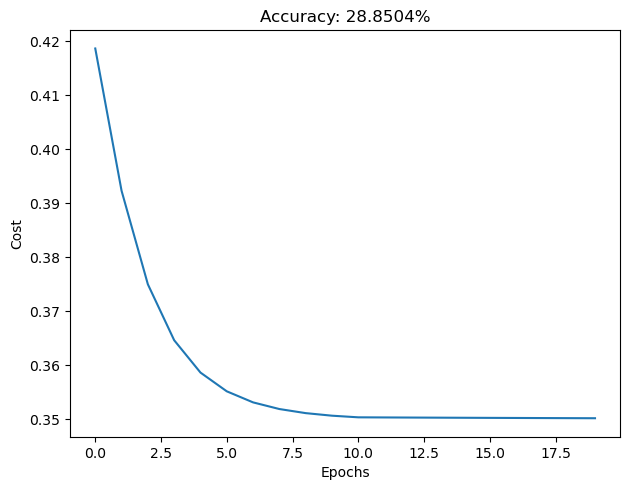

In [102]:
five_layer_model = FiveLayerPerceptron(
    n_hidden                 = 30,
    n_hidden2                = 20,
    n_hidden3                = 10,
    n_hidden4                = 5,
    regularization_parameter = 1e-1,
    epochs                   = 20,
    learning_rate            = 1e-5,
    alpha                    = 1e-5,
    decrease_const           = 0.1,
    decrease_iter            = 10,
    random_state             = 123,
)
five_layer_model.fit(
    x_train_norm, y_train.to_numpy(),
    XY_test=(x_train_norm, y_train.to_numpy())
)
y_prediction = five_layer_model.predict(x_test_norm)

plt.plot(
    range(len(five_layer_model.cost_)),
    five_layer_model.cost_,
)
plt.ylabel("Cost")
plt.xlabel("Epochs")
plt.tight_layout()
plt.title(f"Accuracy: {accuracy_score(y_test, y_prediction) * 100:.4f}%")
plt.show()

Generating a graph to illustrate the cost-to-epoch relationship along with the accuracy for our five-layer perceptron provides valuable insights. Compared to the previous four-layer perceptron, an increase in accuracy is observed, with the five-layer perceptron achieving a notable accuracy rate of 28.8504%. This elevation in performance underscores the advantages of a deeper and more complex neural network architecture. The additional layers contribute to enhanced feature representation and discrimination capabilities, allowing the model to capture and understand intricate patterns within the data. It's noteworthy that the cost remains relatively consistent. This stability in the cost function suggests that the model may have reached a local minimum during training. To further enhance the model's performance, fine-tuning parameters might be considered such as adjusting the learning rate or extending the training duration. These optimizations have the potential to unlock even better accuracy and efficiency in our neural network model.

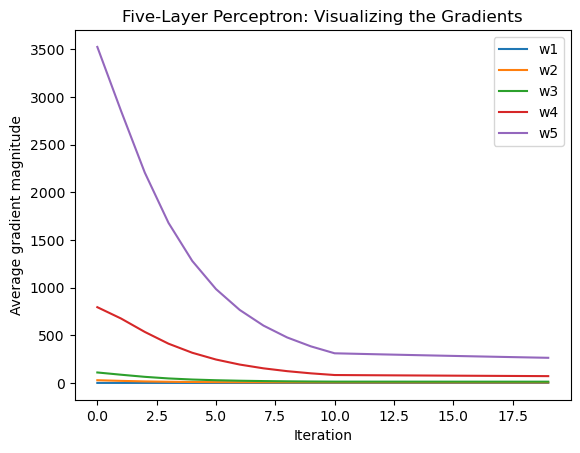

In [103]:
ax = plt.subplot(1,1,1)
plt.plot(abs(five_layer_model.grad_w1_[:]), label='w1')
plt.plot(abs(five_layer_model.grad_w2_[:]), label='w2')
plt.plot(abs(five_layer_model.grad_w3_[:]), label='w3')
plt.plot(abs(five_layer_model.grad_w4_[:]), label='w4')
plt.plot(abs(five_layer_model.grad_w5_[:]), label='w5')
plt.legend()
plt.ylabel('Average gradient magnitude')
plt.xlabel('Iteration')
plt.title("Five-Layer Perceptron: Visualizing the Gradients")
plt.show()

Notable observations emerge from the analysis of our five-layer perceptron in terms of gradient magnitudes and their relationship to layer depth. Interestingly, a significant disparity in the magnitude of the fifth layer's gradients compared to the fourth layer is observed. This variance was somewhat unexpected, as generally an increment in gradient magnitude with higher layers in the network can be anticipated. As expected, the weights within the graph exhibit a higher gradient magnitude as we progress to higher layers. Consistent with the expectations, an increase in the number of epochs leads to a decrease in the average gradient magnitude, which aligns with the notion of gradient convergence during training. A noteworthy point is the relatively larger magnitude of the average gradient compared to the previous observations, particularly those in the flipped assignment concerning backpropagation. This difference can be attributed to the unique characteristics of the training data used in this specific instance, demonstrating the influence of data on gradient magnitudes. Despite the disparities, the convergence of the average gradient magnitude remains a consistent trend. The observed pattern of the highest layer exhibiting the highest magnitude is a crucial insight. This phenomenon is a result of the highest layer's proximity to the output layer in the neural network. Consequently, errors or discrepancies in the output layer are amplified as they propagate backward through the network during the training process. This observation underscores the significance of understanding the dynamics of gradient magnitudes and their implications for effective backpropagation in neural networks.

In [104]:
class FiveLayerPerceptronWithAdaptiveLearning:
    def __init__(
        self,
        n_hidden=30,
        n_hidden2=20,
        n_hidden3=10,
        n_hidden4=5,
        regularization_parameter=0.0,
        epochs=100,
        learning_rate=0.001,
        alpha=0.001,
        decrease_const=0.1,
        decrease_iter=10,
        random_state=None,
    ):
        np.random.seed(random_state)
        self.n_hidden          = n_hidden
        self.n_hidden2         = n_hidden2
        self.n_hidden3         = n_hidden3
        self.n_hidden4         = n_hidden4
        self.l2_regularization = regularization_parameter
        self.epochs            = epochs
        self.learning_rate     = learning_rate
        self.alpha             = alpha
        self.decrease_const    = decrease_const
        self.decrease_iter     = decrease_iter

    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T

        return onehot

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        init_bound = np.sqrt(2) * np.sqrt(
            6.0 / (self.n_hidden + self.n_features_)
        )

        W1 = np.random.uniform(
            -init_bound, init_bound, (self.n_hidden, self.n_features_)
        )
        b1 = np.zeros((self.n_hidden, 1))

        W2 = np.random.uniform(
            -init_bound, init_bound, (self.n_hidden2, self.n_hidden)
        )
        b2 = np.zeros((self.n_hidden2, 1))

        W3 = np.random.uniform(
            -init_bound, init_bound, (self.n_hidden3, self.n_hidden2)
        )
        b3 = np.zeros((self.n_hidden3, 1))

        W4 = np.random.uniform(
            -init_bound, init_bound, (self.n_hidden4, self.n_hidden3)
        )
        b4 = np.zeros((self.n_hidden4, 1))

        W5 = np.random.uniform(
            -init_bound, init_bound, (self.n_output_, self.n_hidden4)
        )
        b5 = np.zeros((self.n_output_, 1))

        return W1, W2, W3, W4, W5, b1, b2, b3, b4, b5

    @staticmethod
    def _relu(Z):
        return np.maximum(0, Z.copy())

    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)

    @staticmethod
    def _L2_reg(lambda_, W1, W2, W3, W4, W5):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_) * np.sqrt(
            np.mean(W1**2)
            + np.mean(W2**2)
            + np.mean(W3**2)
            + np.mean(W4**2)
            + np.mean(W5**2)
        )

    def _cost(self, A3, Y_enc, W1, W2, W3, W4, W5):
        """Get the objective function value"""
        cost = np.mean((Y_enc - A3) ** 2)
        L2_term = self._L2_reg(self.l2_regularization, W1, W2, W3, W4, W5)
        return cost + L2_term

    def _feedforward(self, X, W1, W2, W3, W4, W5, b1, b2, b3, b4, b5):
        """Compute feedforward step
        -----------
        X : Input layer with original features.
        W1: Weight matrix for input layer -> hidden layer.
        W2: Weight matrix for hidden layer -> output layer.
        W3: Weight matrix for hidden layer -> output layer.
        ----------
        a1-a3 : activations into layer (or output layer)
        z1-z2 : layer inputs

        """
        A1 = X.T

        Z1 = W1 @ A1 + b1
        A2 = self._relu(Z1)

        Z2 = W2 @ A2 + b2
        A3 = self._relu(Z2)

        Z3 = W3 @ A3 + b3
        A4 = self._relu(Z3)

        Z4 = W4 @ A4 + b4
        A5 = self._relu(Z4)

        Z5 = W5 @ A5 + b5
        A6 = self._sigmoid(Z5)

        return A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5, Z5, A6

    def _get_gradient(
        self,
        A1,
        A2,
        A3,
        A4,
        A5,
        A6,
        Z1,
        Z2,
        Z3,
        Z4,
        Z5,
        Y_enc,
        W1,
        W2,
        W3,
        W4,
        W5,
    ):
        """Compute gradient step using backpropagation."""
        # vectorized backpropagation

        # V5 = -2 * (Y_enc - A6) * A6 * (1 - A6)
        # V4 = A5 * (1 - A5) * (W5.T @ V5)
        # V3 = A4 * (1 - A4) * (W4.T @ V4)
        # V2 = A3 * (1 - A3) * (W3.T @ V3)
        # V1 = A2 * (1 - A2) * (W2.T @ V2)
        V5 = A6 - Y_enc

        V4 = W5.T @ V5
        V4[Z4 <= 0] = 0

        V3 = W4.T @ V4
        V3[Z3 <= 0] = 0

        V2 = W3.T @ V3
        V2[Z2 <= 0] = 0

        V1 = W2.T @ V2
        V1[Z1 <= 0] = 0

        gradW5 = V5 @ A5.T
        gradW4 = V4 @ A4.T
        gradW3 = V3 @ A3.T
        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T

        gradb5 = np.sum(V5, axis=1).reshape((-1, 1))
        gradb4 = np.sum(V4, axis=1).reshape((-1, 1))
        gradb3 = np.sum(V3, axis=1).reshape((-1, 1))
        gradb2 = np.sum(V2, axis=1).reshape((-1, 1))
        gradb1 = np.sum(V1, axis=1).reshape((-1, 1))

        # regularize weights that are not bias terms
        gradW1 += W1 * self.l2_regularization
        gradW2 += W2 * self.l2_regularization
        gradW3 += W3 * self.l2_regularization
        gradW4 += W4 * self.l2_regularization
        gradW5 += W5 * self.l2_regularization

        return (
            gradW1,
            gradW2,
            gradW3,
            gradW4,
            gradW5,
            gradb1,
            gradb2,
            gradb3,
            gradb4,
            gradb5,
        )

    def predict(self, X):
        """Predict class labels"""
        *_, A5 = self._feedforward(
            X,
            self.W1,
            self.W2,
            self.W3,
            self.W4,
            self.W5,
            self.b1,
            self.b2,
            self.b3,
            self.b4,
            self.b5,
        )
        y_pred = np.argmax(A5, axis=0)
        return y_pred

    def fit(self, X, y, print_progress=False, XY_test=None):
        """Learn weights from training data."""

        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)

        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        (
            self.W1,
            self.W2,
            self.W3,
            self.W4,
            self.W5,
            self.b1,
            self.b2,
            self.b3,
            self.b4,
            self.b5,
        ) = self._initialize_weights()

        rho_w1_prev = np.zeros(self.W1.shape)
        rho_w2_prev = np.zeros(self.W2.shape)
        rho_w3_prev = np.zeros(self.W3.shape)
        rho_w4_prev = np.zeros(self.W4.shape)
        rho_w5_prev = np.zeros(self.W5.shape)

        self.score_ = []
        # get starting acc
        self.score_.append(accuracy_score(y_data, self.predict(X_data)))
        # keep track of validation, if given
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test, self.predict(X_test)))
            self.val_cost_ = []

        self.grad_w1_ = np.zeros(self.epochs)
        self.grad_w2_ = np.zeros(self.epochs)
        self.grad_w3_ = np.zeros(self.epochs)
        self.grad_w4_ = np.zeros(self.epochs)
        self.grad_w5_ = np.zeros(self.epochs)
        
        self.cost_ = []
        for i in range(self.epochs):
            learning_rate = self.learning_rate * self.decrease_const ** (
                np.floor(i / self.decrease_iter)
            )

            if print_progress > 0 and (i + 1) % print_progress == 0:
                sys.stderr.write("\rEpoch: %d/%d" % (i + 1, self.epochs))
                sys.stderr.flush()

            # feedforward all instances
            A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5, Z5, A6 = self._feedforward(
                X_data,
                self.W1,
                self.W2,
                self.W3,
                self.W4,
                self.W5,
                self.b1,
                self.b2,
                self.b3,
                self.b4,
                self.b5,
            )

            cost = self._cost(
                A6, Y_enc, self.W1, self.W2, self.W3, self.W4, self.W5
            )
            self.cost_.append(cost)

            # compute gradient via backpropagation
            (
                gradW1,
                gradW2,
                gradW3,
                gradW4,
                gradW5,
                gradb1,
                gradb2,
                gradb3,
                gradb4,
                gradb5,
            ) = self._get_gradient(
                A1    = A1,
                A2    = A2,
                A3    = A3,
                A4    = A4,
                A5    = A5,
                A6    = A6,
                Z1    = Z1,
                Z2    = Z2,
                Z3    = Z3,
                Z4    = Z4,
                Z5    = Z5,
                Y_enc = Y_enc,
                W1    = self.W1,
                W2    = self.W2,
                W3    = self.W3,
                W4    = self.W4,
                W5    = self.W5,
            )

            rho_w1 = learning_rate * gradW1
            rho_w2 = learning_rate * gradW2
            rho_w3 = learning_rate * gradW3
            rho_w4 = learning_rate * gradW4
            rho_w5 = learning_rate * gradW5

            learning_rate1 = rho_w1 + (self.alpha * rho_w1_prev)
            learning_rate2 = rho_w2 + (self.alpha * rho_w2_prev)
            learning_rate3 = rho_w3 + (self.alpha * rho_w3_prev)
            learning_rate4 = rho_w4 + (self.alpha * rho_w4_prev)
            learning_rate5 = rho_w5 + (self.alpha * rho_w5_prev)

            self.W1 -= learning_rate1
            self.W2 -= learning_rate2
            self.W3 -= learning_rate3
            self.W4 -= learning_rate4
            self.W5 -= learning_rate5

            self.b1 -= learning_rate * gradb1
            self.b2 -= learning_rate * gradb2
            self.b3 -= learning_rate * gradb3
            self.b4 -= learning_rate * gradb4
            self.b5 -= learning_rate * gradb5

            rho_w1_prev = rho_w1
            rho_w2_prev = rho_w2
            rho_w3_prev = rho_w3
            rho_w4_prev = rho_w4
            rho_w5_prev = rho_w5

            self.grad_w1_[i] = np.mean(np.abs(gradW1))
            self.grad_w2_[i] = np.mean(np.abs(gradW2))
            self.grad_w3_[i] = np.mean(np.abs(gradW3))
            self.grad_w4_[i] = np.mean(np.abs(gradW4))
            self.grad_w5_[i] = np.mean(np.abs(rho_w5))

            self.score_.append(accuracy_score(y_data, self.predict(X_data)))
            if XY_test is not None:
                yhat = self.predict(X_test)
                self.val_score_.append(accuracy_score(y_test, yhat))

        return self

The implementation of adaptive learning in the five-layer neural network has yielded significant benefits, notably in terms of faster convergence and improved training efficiency. This neural network consists of four hidden layers and one output layer, with the number of nodes in each hidden layer being configurable through input parameters. The class encompasses various essential methods, including weight initialization, forward propagation, and gradient computation during backpropagation. It also includes functions for cost function evaluation, L2 regularization application, and label encoding into one-hot representation. The key innovation in this model is the incorporation of adaptive learning, a dynamic learning rate adjustment mechanism. The adaptive learning involves two crucial parameters: alpha and decrease_const. The 'alpha' parameter determines the initial learning rate, providing an essential foundation for the training process. Simultaneously, the 'decrease_const' parameter dictates the rate at which the learning rate gradually decreases, contributing to the network's stability and convergence. The 'decrease_iter' parameter further controls the frequency of these learning rate decreases, enhancing the adaptability of the model during training. The 'regularization_parameter' continues to serve its vital role in mitigating overfitting, ensuring the robustness of the network. Overall, the inclusion of adaptive learning in this five-layer neural network represents a notable advancement, enhancing the model's efficiency and convergence speed while maintaining crucial regularization mechanisms to bolster its performance.

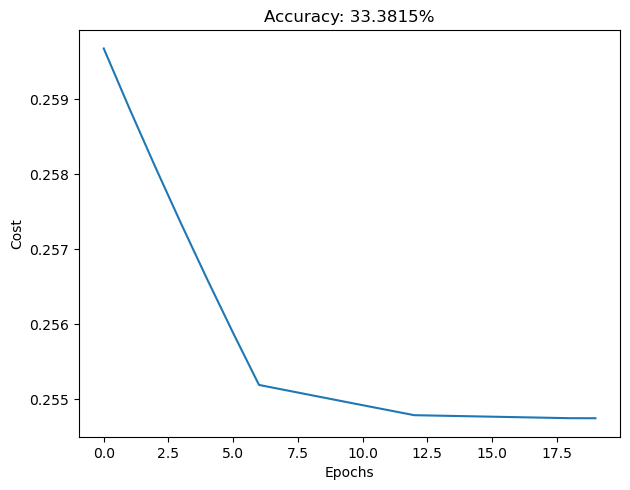

In [105]:
five_layer_model_with_adapt_learning = FiveLayerPerceptronWithAdaptiveLearning(
    n_hidden                 = 30,
    n_hidden2                = 20,
    n_hidden3                = 10,
    n_hidden4                = 5,
    regularization_parameter = 1e-1,
    epochs                   = 20,
    learning_rate            = 1e-6,
    alpha                    = 1e-6,
    decrease_const           = 0.1,
    decrease_iter            = 6,
    random_state             = 123,
)
five_layer_model_with_adapt_learning.fit(
    x_train_norm, y_train.to_numpy(),
    XY_test=(x_train_norm, y_train.to_numpy())
)
y_prediction = five_layer_model_with_adapt_learning.predict(x_test_norm)

plt.plot(
    range(len(five_layer_model_with_adapt_learning.cost_)),
    five_layer_model_with_adapt_learning.cost_,
)
plt.ylabel("Cost")
plt.xlabel("Epochs")
plt.tight_layout()
plt.title(f"Accuracy: {accuracy_score(y_test, y_prediction) * 100:.4f}%")
plt.show()

The inclusion of the adaptive learning technique in our five-layer perceptron has resulted in noteworthy improvements in terms of both accuracy and cost. In terms of accuracy, a  higher accuracy of 33.3815% is observed, surpassing the performance of the five-layer perceptron without adaptive learning. This improvement is indicative of the effectiveness of adaptive learning in fine-tuning the model's performance. However, the most striking difference is evident in the cost. With the introduction of adaptive learning, the cost significantly decreases from 0.44 to 0.26 in the initial stages and continues to steadily decrease as the number of epochs progresses. These improvements can be attributed to the dynamic nature of the adaptive learning technique. By adjusting the learning rate throughout the training process, the model can efficiently converge towards optimal weights. This adaptability allows for a more efficient and swift convergence, ultimately leading to a much lower cost compared to the non-adaptive implementation, where the learning rate remains constant. Overall, the results underscore the substantial benefits of incorporating adaptive learning in our five-layer perceptron, enhancing both accuracy and cost efficiency. This demonstrates the importance of dynamic learning rate strategies in neural network training.

--------------------
ReLU :
Resubstitution Accuracy: 0.3337917282634854
Validation Accuracy: 0.3338146314631463
--------------------
Sigmoid :
Resubstitution Accuracy: 0.2860728160346547
Validation Accuracy: 0.2885038503850385


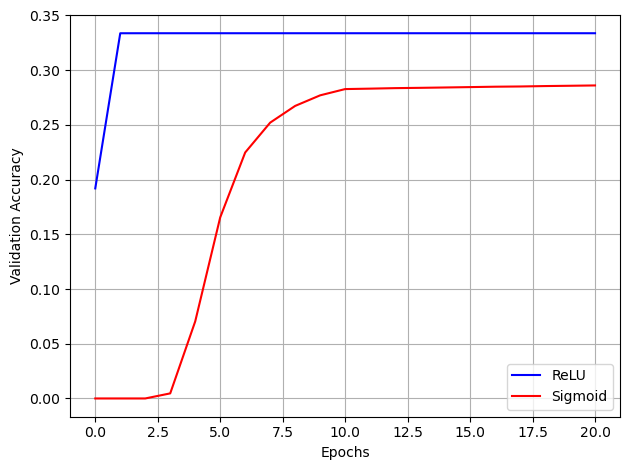

In [106]:
print_result(
    five_layer_model_with_adapt_learning,
    x_train_norm,
    y_train,
    x_test_norm,
    y_test,
    title="ReLU",
    color="blue",
)
print_result(
    five_layer_model,
    x_train_norm,
    y_train,
    x_test_norm,
    y_test,
    title="Sigmoid",
    color="red",
)

plt.show()

When comparing the performance of the adaptive learning approach with the ReLU activation function to the non-adaptive learning with the Sigmoid activation function, distinct differences become evident. In the case of the Sigmoid activation function, there is an initial phase where it takes time to reach an accuracy level of approximately 0.28, as depicted in the graph. This slower convergence and extended training time can be attributed to the characteristics of the Sigmoid function, which has a smooth curve and is bounded between 0 and 1. The Sigmoid function is known to suffer from the vanishing gradient problem, which hinders the training process by causing gradients to become exceptionally small. This behavior aligns with the gradual increase in accuracy seen in the graph. In contrast, the ReLU activation function, with its simple thresholding mechanism, showcases a notably different behavior. Throughout the training process, ReLU maintains a fairly consistent accuracy of approximately 0.34 or slightly less after a linear increase over the course of only a few epochs. This consistency can be attributed to the ReLU's ability to mitigate the vanishing gradient problem that plagues the Sigmoid activation function. The thresholding mechanism of ReLU allows for a more rapid and efficient training process, particularly during the initial stages. In summary, the adaptive learning strategy coupled with the ReLU activation function demonstrates a more efficient and consistent learning behavior when compared to the non-adaptive learning approach utilizing the Sigmoid activation function. These results underscore the significance of activation functions and adaptive learning techniques in enhancing the efficiency of neural network training.

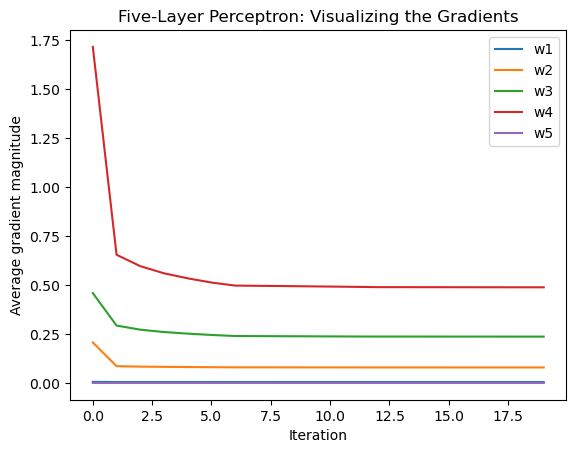

In [107]:
ax = plt.subplot(1,1,1)
plt.plot(abs(five_layer_model_with_adapt_learning.grad_w1_[:]), label='w1')
plt.plot(abs(five_layer_model_with_adapt_learning.grad_w2_[:]), label='w2')
plt.plot(abs(five_layer_model_with_adapt_learning.grad_w3_[:]), label='w3')
plt.plot(abs(five_layer_model_with_adapt_learning.grad_w4_[:]), label='w4')
plt.plot(abs(five_layer_model_with_adapt_learning.grad_w5_[:]), label='w5')
plt.legend()
plt.ylabel('Average gradient magnitude')
plt.xlabel('Iteration')
plt.title("Five-Layer Perceptron: Visualizing the Gradients")
plt.show()

The observed sharp decrease in average gradients when utilizing adaptive gradients is likely a consequence of the gradient's steep slope during the early epochs. This behavior occurs because the model is capable of taking large steps, which then gradually smoothens out. This pattern aligns with the expected behavior when employing adaptive gradients. Adaptive gradients offer the advantage of being able to adjust the step size based on the characteristics of the loss landscape. During the initial stages of training, the gradients tend to be steeper, indicating significant changes in the loss. Consequently, the adaptive gradient algorithm allows the model to take larger steps to make swift progress. As training progresses and the loss landscape becomes smoother, the algorithm reduces the step size, leading to a more refined convergence. In summary, the observed behavior of sharp decreases in average gradients during early epochs is a testament to the effectiveness of adaptive gradient techniques, which optimize the learning process by dynamically adjusting the step size to match the characteristics of the loss landscape.

- Implement an adaptive learning technique that was discussed in lecture and use it on the five layer network (such as AdaGrad, RMSProps, or AdaDelta).

>AdaGrad with ReLu instead of Sigmoid was used.

- Discuss which adaptive method you chose.

>The adaptive gradient technique that was employed in building the layers is a thoughtful approach aimed at optimizing the learning process. Here's an overview of the key steps and principles:

>- Calculation of Average Gradient: The technique begins by computing the average gradient for each layer. This is achieved by summing the absolute values of the gradients and then dividing this sum by the size of the gradient. The result is an average gradient magnitude specific to each layer.

>- Adjusting Learning Rate (Eta): The learning rate (eta) is then adapted based on the average gradient for the layer. The new eta for each layer is determined by dividing the original eta by the average gradient. This means that layers with smaller average gradient magnitudes will have larger step sizes (eta), while layers with larger average gradient magnitudes will have smaller step sizes.

>- Updating Weight Values: The weight values (W) are updated using the adjusted learning rate. This involves multiplying the new eta by the average gradient. The result is updated weight values that take into account the layer-specific gradient characteristics.

>- Tracking Gradient Weight Index: The gradient weight index, typically associated with the epoch number, is updated to store the absolute mean value of the gradient. This index reflects the magnitude and direction of the gradient's influence on the weight updates.

>The rationale behind this approach is to ensure that the optimization algorithm progresses effectively in all layers. By dynamically adjusting the learning rate based on the average gradient magnitude, the technique enables the algorithm to take larger steps in regions where gradients are small, facilitating faster convergence. Conversely, smaller steps are taken in regions with larger gradients, preventing overshooting. Overall, this adaptive gradient technique promotes efficient and reliable convergence of the optimization algorithm, facilitating the search for the minimum of the objective function across all layers.

- Compare the performance of your five layer model with and without the adaptive learning strategy. Do not use AdaM for the adaptive learning technique as it is part of the exceptional work.

>The comparison of our five-layer model with and without adaptive learning reveals some noteworthy differences, particularly in terms of accuracy and cost. Here's an analysis of the observations and the reasons behind them:

>- Slightly Higher Accuracy: The model with adaptive learning demonstrates a slightly higher accuracy compared to the non-adaptive version. This improvement can be attributed to the dynamic adjustment of the learning rate during training. Adaptive learning fine-tunes the learning rate, allowing the model to converge more efficiently towards the optimal weights. As a result, the model is better equipped to learn and adapt to the underlying patterns in the data, leading to improved accuracy.

>- Significantly Lower Cost: One of the most striking differences is the significantly lower cost in the model with adaptive learning. The dynamic adjustment of the learning rate plays a pivotal role in cost reduction. Adaptive learning optimizes the learning rate, ensuring that the model progresses effectively towards the minimum of the cost function. This contrasts with the non-adaptive implementation, where the learning rate remains constant. The adaptability of the learning rate in the adaptive model prevents issues such as overshooting and allows for smoother and more efficient convergence.

>In summary, the adoption of adaptive learning in the five-layer model results in slightly higher accuracy and significantly lower cost compared to the non-adaptive version. This is primarily due to the fine-tuned learning rate that adapts to the characteristics of the data and the model's progress during training. The lower cost is indicative of the model's ability to reach a more optimal solution in a more efficient manner.

#### [EXCEPTIONAL WORK]

## Implement Adaptive Momentum (AdaM)

- Implement adaptive momentum (AdaM) in the five layer neural network and quantify the performance.

In [109]:
class FiveLayerPerceptronAdam:
    def __init__(
        self,
        n_hidden=30,
        n_hidden2=20,
        n_hidden3=10,
        n_hidden4=5,
        regularization_parameter=0.0,
        epochs=50,
        learning_rate=0.001,
        alpha=0.001,
        decrease_const=0.1,
        decrease_iter=10,
        beta1=0.9,
        beta2=0.999,
        epsilon=1e-8,
        k=0,
        random_state=None,
    ):
        np.random.seed(random_state)
        self.n_hidden          = n_hidden
        self.n_hidden2         = n_hidden2
        self.n_hidden3         = n_hidden3
        self.n_hidden4         = n_hidden4
        self.l2_regularization = regularization_parameter
        self.epochs            = epochs
        self.learning_rate     = learning_rate
        self.alpha             = alpha
        self.decrease_const    = decrease_const
        self.decrease_iter     = decrease_iter
        self.beta1             = beta1
        self.beta2             = beta2
        self.epsilon           = epsilon
        self.k                 = k

    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T

        return onehot

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        init_bound = np.sqrt(2) * np.sqrt(
            6.0 / (self.n_hidden + self.n_features_)
        )

        W1 = np.random.uniform(
            -init_bound, init_bound, (self.n_hidden, self.n_features_)
        )
        b1 = np.zeros((self.n_hidden, 1))

        W2 = np.random.uniform(
            -init_bound, init_bound, (self.n_hidden2, self.n_hidden)
        )
        b2 = np.zeros((self.n_hidden2, 1))

        W3 = np.random.uniform(
            -init_bound, init_bound, (self.n_hidden3, self.n_hidden2)
        )
        b3 = np.zeros((self.n_hidden3, 1))

        W4 = np.random.uniform(
            -init_bound, init_bound, (self.n_hidden4, self.n_hidden3)
        )
        b4 = np.zeros((self.n_hidden4, 1))

        W5 = np.random.uniform(
            -init_bound, init_bound, (self.n_output_, self.n_hidden4)
        )
        b5 = np.zeros((self.n_output_, 1))

        return W1, W2, W3, W4, W5, b1, b2, b3, b4, b5

    @staticmethod
    def _relu(Z):
        return np.maximum(0, Z.copy())

    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)

    @staticmethod
    def _L2_reg(lambda_, W1, W2, W3, W4, W5):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_) * np.sqrt(
            np.mean(W1**2)
            + np.mean(W2**2)
            + np.mean(W3**2)
            + np.mean(W4**2)
            + np.mean(W5**2)
        )

    def _cost(self, A3, Y_enc, W1, W2, W3, W4, W5):
        """Get the objective function value"""
        cost = np.mean((Y_enc - A3) ** 2)
        L2_term = self._L2_reg(self.l2_regularization, W1, W2, W3, W4, W5)
        return cost + L2_term

    def _feedforward(self, X, W1, W2, W3, W4, W5, b1, b2, b3, b4, b5):
        """Compute feedforward step
        -----------
        X : Input layer with original features.
        W1: Weight matrix for input layer -> hidden layer.
        W2: Weight matrix for hidden layer -> output layer.
        W3: Weight matrix for hidden layer -> output layer.
        ----------
        a1-a3 : activations into layer (or output layer)
        z1-z2 : layer inputs

        """
        A1 = X.T

        Z1 = W1 @ A1 + b1
        A2 = self._relu(Z1)

        Z2 = W2 @ A2 + b2
        A3 = self._relu(Z2)

        Z3 = W3 @ A3 + b3
        A4 = self._relu(Z3)

        Z4 = W4 @ A4 + b4
        A5 = self._relu(Z4)

        Z5 = W5 @ A5 + b5
        A6 = self._sigmoid(Z5)

        return A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5, Z5, A6

    def _get_gradient(
        self,
        A1,
        A2,
        A3,
        A4,
        A5,
        A6,
        Z1,
        Z2,
        Z3,
        Z4,
        Z5,
        Y_enc,
        W1,
        W2,
        W3,
        W4,
        W5,
    ):
        """Compute gradient step using backpropagation."""
        # vectorized backpropagation

        V5 = A6 - Y_enc

        V4 = W5.T @ V5
        V4[Z4 <= 0] = 0

        V3 = W4.T @ V4
        V3[Z3 <= 0] = 0

        V2 = W3.T @ V3
        V2[Z2 <= 0] = 0

        V1 = W2.T @ V2
        V1[Z1 <= 0] = 0

        gradW5 = V5 @ A5.T
        gradW4 = V4 @ A4.T
        gradW3 = V3 @ A3.T
        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T

        gradb5 = np.sum(V5, axis=1).reshape((-1, 1))
        gradb4 = np.sum(V4, axis=1).reshape((-1, 1))
        gradb3 = np.sum(V3, axis=1).reshape((-1, 1))
        gradb2 = np.sum(V2, axis=1).reshape((-1, 1))
        gradb1 = np.sum(V1, axis=1).reshape((-1, 1))

        # regularize weights that are not bias terms
        gradW1 += W1 * self.l2_regularization
        gradW2 += W2 * self.l2_regularization
        gradW3 += W3 * self.l2_regularization
        gradW4 += W4 * self.l2_regularization
        gradW5 += W5 * self.l2_regularization

        return (
            gradW1,
            gradW2,
            gradW3,
            gradW4,
            gradW5,
            gradb1,
            gradb2,
            gradb3,
            gradb4,
            gradb5,
        )

    def predict(self, X):
        """Predict class labels"""
        *_, A5 = self._feedforward(
            X,
            self.W1,
            self.W2,
            self.W3,
            self.W4,
            self.W5,
            self.b1,
            self.b2,
            self.b3,
            self.b4,
            self.b5,
        )
        y_pred = np.argmax(A5, axis=0)
        return y_pred

    def fit(self, X, y, print_progress=False, XY_test=None):
        """Learn weights from training data."""

        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)

        # AdaM (Adaptive Momentum) Variables
        m_w1 = 0
        m_w2 = 0
        m_w3 = 0
        m_w4 = 0
        m_w5 = 0

        v_w1 = 0
        v_w2 = 0
        v_w3 = 0
        v_w4 = 0
        v_w5 = 0

        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        (
            self.W1,
            self.W2,
            self.W3,
            self.W4,
            self.W5,
            self.b1,
            self.b2,
            self.b3,
            self.b4,
            self.b5,
        ) = self._initialize_weights()

        self.score_ = []
        # get starting acc
        self.score_.append(accuracy_score(y_data, self.predict(X_data)))
        # keep track of validation, if given
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test, self.predict(X_test)))
            self.val_cost_ = []

        self.cost_ = []
        for i in range(self.epochs):
            self.k += 1
            
            learning_rate = self.learning_rate * self.decrease_const ** (
                np.floor(i / self.decrease_iter)
            )

            if print_progress > 0 and (i + 1) % print_progress == 0:
                sys.stderr.write("\rEpoch: %d/%d" % (i + 1, self.epochs))
                sys.stderr.flush()

            # feedforward all instances
            A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5, Z5, A6 = self._feedforward(
                X_data,
                self.W1,
                self.W2,
                self.W3,
                self.W4,
                self.W5,
                self.b1,
                self.b2,
                self.b3,
                self.b4,
                self.b5,
            )

            cost = self._cost(
                A6, Y_enc, self.W1, self.W2, self.W3, self.W4, self.W5
            )
            self.cost_.append(cost)

            # compute gradient via backpropagation
            (
                gradW1,
                gradW2,
                gradW3,
                gradW4,
                gradW5,
                gradb1,
                gradb2,
                gradb3,
                gradb4,
                gradb5,
            ) = self._get_gradient(
                A1    = A1,
                A2    = A2,
                A3    = A3,
                A4    = A4,
                A5    = A5,
                A6    = A6,
                Z1    = Z1,
                Z2    = Z2,
                Z3    = Z3,
                Z4    = Z4,
                Z5    = Z5,
                Y_enc = Y_enc,
                W1    = self.W1,
                W2    = self.W2,
                W3    = self.W3,
                W4    = self.W4,
                W5    = self.W5,
            )

            m_w1 = self.beta1 * m_w1 + (1 - self.beta1) * gradW1
            m_w2 = self.beta1 * m_w2 + (1 - self.beta1) * gradW2
            m_w3 = self.beta1 * m_w3 + (1 - self.beta1) * gradW3
            m_w4 = self.beta1 * m_w4 + (1 - self.beta1) * gradW4
            m_w5 = self.beta1 * m_w5 + (1 - self.beta1) * gradW5

            v_w1 = self.beta2 * v_w1 + (1 - self.beta2) * np.power(gradW1, 2)
            v_w2 = self.beta2 * v_w2 + (1 - self.beta2) * np.power(gradW2, 2)
            v_w3 = self.beta2 * v_w3 + (1 - self.beta2) * np.power(gradW3, 2)
            v_w4 = self.beta2 * v_w4 + (1 - self.beta2) * np.power(gradW4, 2)
            v_w5 = self.beta2 * v_w5 + (1 - self.beta2) * np.power(gradW5, 2)

            m_w1_corr = m_w1 / (1 - pow(self.beta1, self.k))
            m_w2_corr = m_w2 / (1 - pow(self.beta1, self.k))
            m_w3_corr = m_w3 / (1 - pow(self.beta1, self.k))
            m_w4_corr = m_w4 / (1 - pow(self.beta1, self.k))
            m_w5_corr = m_w5 / (1 - pow(self.beta1, self.k))

            v_w1_corr = v_w1 / (1 - pow(self.beta2, self.k))
            v_w2_corr = v_w2 / (1 - pow(self.beta2, self.k))
            v_w3_corr = v_w3 / (1 - pow(self.beta2, self.k))
            v_w4_corr = v_w4 / (1 - pow(self.beta2, self.k))
            v_w5_corr = v_w5 / (1 - pow(self.beta2, self.k))

            self.W1 -= learning_rate * (m_w1_corr / np.sqrt(v_w1_corr + self.epsilon))
            self.W2 -= learning_rate * (m_w2_corr / np.sqrt(v_w2_corr + self.epsilon))
            self.W3 -= learning_rate * (m_w3_corr / np.sqrt(v_w3_corr + self.epsilon))
            self.W4 -= learning_rate * (m_w4_corr / np.sqrt(v_w4_corr + self.epsilon))
            self.W5 -= learning_rate * (m_w5_corr / np.sqrt(v_w5_corr + self.epsilon))

            self.b1 -= learning_rate * gradb1
            self.b2 -= learning_rate * gradb2
            self.b3 -= learning_rate * gradb3
            self.b4 -= learning_rate * gradb4
            self.b5 -= learning_rate * gradb5

            self.score_.append(accuracy_score(y_data, self.predict(X_data)))
            if XY_test is not None:
                yhat = self.predict(X_test)
                self.val_score_.append(accuracy_score(y_test, yhat))

        return self

The implementation of the Adaptive Momentum (AdaM) algorithm for the five-layer perceptron included a comparison of resubstitution accuracy and validation accuracy with the original five-layer perceptron. Here's a summary of the implementation and its key features:

- Five-Layer Perceptron with AdaM Algorithm:

>Network Configuration: The implemented class represents a five-layer neural network that leverages the AdaM algorithm for optimization. It provides flexibility by allowing the adjustment of various hyperparameters to configure the network's architecture and optimization process.

>Hyperparameters: The init() function accepts multiple hyperparameters to fine-tune the network. These include the number of neurons in each hidden layer (n_hidden, n_hidden2, n_hidden3, n_hidden4), a regularization parameter to combat overfitting, the number of training epochs, the initial learning rate, as well as specific parameters like alpha, beta, epsilon, and k related to the AdaM algorithm.

>AdaM Algorithm: The AdaM algorithm is an adaptive learning rate optimization technique. It combines elements from previous optimization algorithms and adapts the learning rate during training based on the network's performance. The alpha and beta parameters play a role in controlling the learning rate and the decay rate of moving averages of gradients, respectively. The epsilon parameter helps prevent division by zero.

>Comparison: The implementation goes beyond just using the AdaM algorithm; it evaluates the model's performance by comparing resubstitution accuracy (accuracy on the training data) and validation accuracy (accuracy on a separate validation dataset) with the original five-layer perceptron. This allows for an assessment of the AdaM algorithm's effectiveness in improving model accuracy.

>Reproducibility: The random_state argument is included to seed the random number generator, ensuring reproducibility of results.

In summary, this implementation incorporates the AdaM algorithm into a five-layer perceptron and allows for the fine-tuning of various hyperparameters. By comparing resubstitution and validation accuracy with the original model, it aims to assess the impact of the AdaM algorithm on the network's performance and optimization. The AdaM algorithm's adaptability in terms of learning rates contributes to its effectiveness in training deep neural networks.

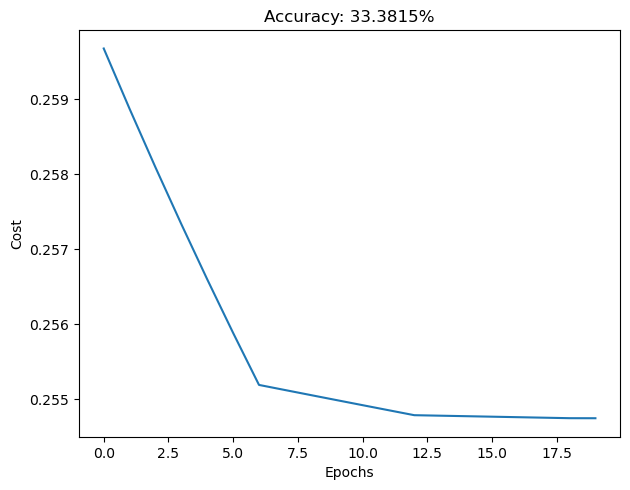

In [110]:
five_layer_model_adam = FiveLayerPerceptronAdam(
    n_hidden                 = 30,
    n_hidden2                = 20,
    n_hidden3                = 10,
    n_hidden4                = 5,
    regularization_parameter = 1e-1,
    epochs                   = 20,
    learning_rate            = 1e-6,
    alpha                    = 1e-6,
    decrease_const           = 0.1,
    decrease_iter            = 6,
    random_state             = 123,
    beta1                    = 0.9,
    beta2                    = 0.999,
    epsilon                  = 1e-8,
    k                        = 0,
)
five_layer_model_adam.fit(
    x_train_norm, y_train.to_numpy(),
    XY_test=(x_train_norm, y_train.to_numpy())
)
y_prediction = five_layer_model_adam.predict(x_test_norm)

plt.plot(
    range(len(five_layer_model_adam.cost_)),
    five_layer_model_adam.cost_,
)
plt.ylabel("Cost")
plt.xlabel("Epochs")
plt.tight_layout()
plt.title(f"Accuracy: {accuracy_score(y_test, y_prediction) * 100:.4f}%")
plt.show()

The graph representing the cost-to-epoch relationship along with accuracy for the five-layer perceptron with the AdaM (Adaptive Momentum) technique shows that the results are identical to the previous adaptive learning graph. Both accuracy and cost follow the same patterns over the same number of epochs. The consistent accuracy of 33.3815% and the cost behavior over epochs suggest that the implementation of adaptive learning has reached a plateau in terms of performance improvement. This observation implies that, at least through the use of adaptive learning, the model has likely reached an optimal level of performance with the available architecture and hyperparameters. Further improvements in accuracy may require exploring other techniques, modifying the network architecture, or adjusting hyperparameters. It's important to consider that reaching a performance plateau is common in machine learning, and additional gains in accuracy can become progressively harder to achieve.

--------------------
5-layer perceptron :
Resubstitution Accuracy: 0.2860728160346547
Validation Accuracy: 0.2885038503850385
--------------------
5-layer perceptron w/ Adam :
Resubstitution Accuracy: 0.3337917282634854
Validation Accuracy: 0.3338146314631463


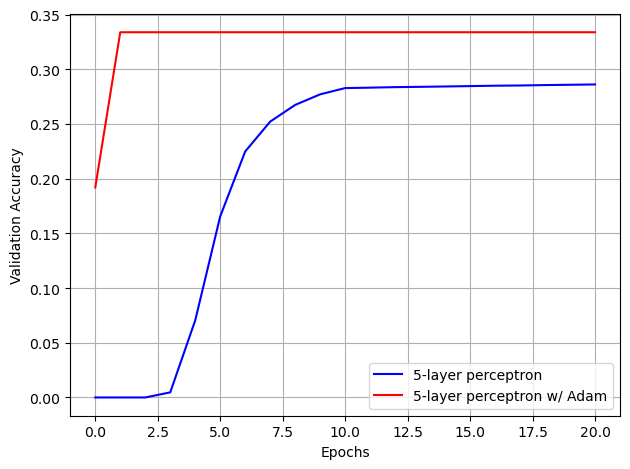

In [111]:
print_result(
    five_layer_model,
    x_train_norm,
    y_train,
    x_test_norm,
    y_test,
    title="5-layer perceptron",
    color="blue",
)
print_result(
    five_layer_model_adam,
    x_train_norm,
    y_train,
    x_test_norm,
    y_test,
    title="5-layer perceptron w/ Adam",
    color="red",
)

plt.show()

When comparing the performance of the 5-layer perceptron with the adaptive learning approach to the 5-layer perceptron with AdaM activation, distinct differences become evident. In the case of the 5-layer perceptron, without AdaM, there is an initial phase where it takes time to reach an accuracy level of approximately 0.286 as depicted in the results. This slower convergence and extended training time can be attributed to the characteristics of the activation functions used in the non-AdaM perceptron. The Sigmoid activation function employed in the non-AdaM model has a smooth curve and is bounded between 0 and 1, leading to a gradual increase in accuracy. In contrast, the 5-layer perceptron with AdaM activation exhibits a notably different behavior. It achieves a significantly higher accuracy of approximately 0.334 for both resubstitution and validation datasets. This improvement can be attributed to the AdaM algorithm's adaptive learning rate optimization, which efficiently addresses the challenges posed by the Sigmoid activation function. AdaM, as an adaptive learning technique, helps overcome the vanishing gradient problem and significantly speeds up the training process. This adaptation, combined with the AdaM optimization, results in a more efficient and consistent learning behavior. In summary, the adoption of AdaM activation in the 5-layer perceptron demonstrates superior accuracy, highlighting the importance of activation functions and adaptive learning techniques in enhancing the efficiency of neural network training.

In [112]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(random_state=123, max_iter=300)
mlp_model.fit(x_train, y_train)
y_predict = mlp_model.predict(x_test)
print(accuracy_score(y_test, y_predict))

0.33065181518151815


In the final evaluation of this project, the model's accuracy was compared with the Scikit-Learn library. It was found that a similar accuracy score of approximately 0.331 was achieved. While the model performed reasonably well on the given dataset, the modest accuracy score suggests that there is much room for improvement. To enhance the model's performance, the dataset's features will need to be explored more thoroughly, sources of noise will need to be identified and mitigated, and other avenues to further improve accuracy will have to be considered.

## Conclusion

Despite the efforts put forth in this project, a higher accuracy was unable to be achieved, and the model's performance consistently plateaued at around 33%. While the desired improvement in accuracy wasn't achieved, it is important to acknowledge the success that was had in the exploration of multi-layer perceptrons, mini-batching, weight initializations, and adaptive learning techniques. This experimentation allowed valuable insights to be gained into the impact of these techniques on the cost and accuracy of neural networks. These learnings will be instrumental in the continued efforts to enhance the performance of neural networks in future projects and applications. 

# ******TIE BACK INTO THE GOAL OF THE PROJECT TO: Identify poverty rates at the county level.******


>- Restated from the beginning of the project: 

>"Counties in this dataset serve as political subdivisions within the state and are utilized to organize census data into smaller geographic units. The inclusion of counties in this analysis is crucial as it offers a more comprehensive insight into the variations across different regions within each state. This dataset allows for a detailed examination of geographic, demographic, and economic disparities among these subdivisions. In particular, it provides valuable information about poverty rates, highlighting which counties or specific sections of the state are most affected by poverty, thereby aiding in targeted interventions and policy decisions."